<a href="https://colab.research.google.com/github/pmalves/coach-report-lv1/blob/main/Dossier_de_Est%C3%A1gio_Pedro_Alves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Initialização

# from pickle import FALSE
# Install the required libraries
# !pip install google-auth-oauthlib==1.2.0 google-auth-httplib2==0.1.1 google-api-python-client==2.116.0

# Import necessary libraries
import pandas as pd
from google.oauth2 import service_account
from googleapiclient.discovery import build
from IPython.display import Markdown, display
import re
import google
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# (If you want to use your personal account instead of a service account, use this method. The first time you will be asked to authenticate via Google)
from google.colab import auth
auth.authenticate_user()
creds = google.auth.default()[0]

# Step 2: Get the Google Sheet ID
# Replace with your Google Sheet ID
SPREADSHEET_ID = '1OMSrvA2ZWcH05i2w9FoFw2axjeIf0-3ME5btbbctn0U'

# Step 3: Build Google Sheet Service
service = build('sheets', 'v4', credentials=creds)

# Step 4: Get data from Google Sheet
# Replace 'Sheet1' with the name of the sheet you want to access. You can also specify a range of data
sheet = service.spreadsheets()
result = sheet.values().get(spreadsheetId=SPREADSHEET_ID,range="'Atletas'!B5:F25").execute()
values = result.get('values')

# Step 5: Create Pandas DataFrame
athletes_data = pd.DataFrame(values[1:], columns=values[0])

# Dossiê de Estágio

## Contextualização


### Treinador

* Nome: Pedro Alves
* Idade: 47 anos

Pratico voleibol há 30 anos, podendo dizer-se que tenho uma folha de resultados exímia! Isto, claro, se por exímia quisermos dizer que essa folha está em branco, sendo que a "carreira" foi inteiramente passada na 3a divisão e no campeonato Inatel. Recentemente, troquei o pavilhão pela praia, já que a carrocaria não apresenta as condições necessárias para jogar em pavilhão. Infelizmente, o talento na areia faz antever que a folha de resultados desportivos ser manterá, como está, imaculada.

A experiência como treinador é praticamente nula; a ideia inicial de _"vem dar um apoio aos treinos das tuas filhas"_ no intervalo da função inevitável de _Uber-daddy_ transformou-se em _"ah, espera, afinal vais ser treinador das iniciadas"_.

Um mês depois, tinha concluído a fase inicial do curso de Treinadores de Grau I e estava responsável por 14 miúdas que jogavam há menos de seis meses, queriam ser federadas, mas nem servir sabiam.

Como elemento francamente positivo, denoto o aspecto motivacional de que muito dificilmente serei pior treinador do que fui jogador.


### Clube

![GDUE](https://github.com/pmalves/coach-report-lv1/blob/main/images/gdue-logo.png?raw=true)


O **Grupo Desportivo União Ericeirense (GDUE)** é uma associação desportiva com sede na vila da Ericeira, Portugal. Fundado com o objetivo de promover o desporto e a integração comunitária, o clube oferece uma estrutura organizada para diversas modalidades desportivas, incluindo voleibol. Com forte ligação à comunidade local, o GDUE é reconhecido pelo desenvolvimento de atletas e pela participação em competições regionais e nacionais.

O “sonho” dos promotores desta iniciativa é fazer desta modalidade, o voleibol, a mais praticada no concelho de Mafra e contribuir para o engrandecimento do GDUE e desenvolvimento do desporto e para promoção de hábitos de vida saudáveis.

Nesse sentido, são objetivos estratégicos o lançamento faseado do voleibol federado, do voleibol não federado e do voleibol “social” em pavilhão e lançar as bases para o “beach volley”. Serão ainda lançadas iniciativas com o objetivo de divulgar a existência da modalidade e atrair novos praticantes.


Em 2024, foram inscritas as seguintes equipas na AVL:

* Júniores (Fem)
* Cadetes (Fem)
* Iniciadas (Fem)
* Minis (Fem)

### Estrutura Logística

![Escola da Carvoeira](https://github.com/pmalves/coach-report-lv1/blob/main/images/carvoeira.jpg?raw=true)


Os treinos e jogos são feitos no pavilhão da Escola EB1/JI da Freguesia da Carvoeira.

Como é apanágio em Portugal para todos os clubes que estão a iniciar, foram-nos dadas todas as condições ideais para a prática e... estava a brincar. O pavilhão da escola é pequeno, apenas com espaço para uma rede, e foi-nos atribuído um número reduzidíssimo de horários para distribuir pelas quatro equipas.

Na maior parte dos dias, um treino de 90 minutos inclui apenas 60 minutos de rede, pois nos últimos 30 minutos já está outra equipa em aquecimento.

Toda a estrutura dos treinos teve de ser adaptada a essas condições.

### Campeonato

O Ericeirense encontra-se a disputar o [Campeonato Regional de Iniciados Femininos, Divisão B, 1a Fase](https://www.avlisboa.pt/competi%C3%A7%C3%B5es/campeonatos-regionais/campeonatos-regionais-2024-20245/table/250-1a-fase-camp-nacional-camp-regionais-2024-2025-iniciados-femininos-divisao-b-1a-fase.html). Poderia estender-me na descrição dos enormíssimos benefícios pessoais, profissionais e sócioeconómicos que advêm da participação naquele que é provavelmente o evento desportivo mais bem organizado do planeta mas, como muito possivelmente isto vai ser lido por pessoas da AVL, tenho receio que a minha capacidade linguística não esteja à altura, pelo que não vou nem tentar.


### Atletas

Segue-se uma descrição sobre o perfil e da distribuição das atletas. Algumas destas entraram mais para o meio da época, enquanto outras saíram da equipa ou transitaram para a oferta do voleibol social.


In [ ]:
# @title Listagem
test_name = ""

# Some cleaning - Convert 'Nr' and 'Data Nascimento' column to numeric, handling errors by coercing to NaN and filling with 0
athletes_data['Nr'] = pd.to_numeric(athletes_data['Nr'], errors='coerce').fillna(0).astype(int)
athletes_data['Data Nascimento'] = pd.to_numeric(athletes_data['Data Nascimento'], errors='coerce').fillna(0).astype(int)

athletes_table = athletes_data[['Nr', 'Atleta', 'Posição','Data Nascimento']].sort_values(by='Nr')

athletes_table_md = athletes_table.to_markdown(index=False)

total_athletes = len(athletes_data)

# Calculate number of athletes per 'Data Nascimento'
athletes_per_birthdate = athletes_data.groupby('Data Nascimento',).size()

# Step 5: Calculate number of athletes per 'Posição'
athletes_per_position = athletes_data.groupby('Posição').size()

# Step 6: Create formatted Markdown string
athletes_description_md = f"""

### Tabela de Atletas ({len(athletes_data)} atletas)

{athletes_table_md}


"""

display(Markdown(athletes_description_md))




### Tabela de Atletas (20 atletas)

|   Nr | Atleta            | Posição   |   Data Nascimento |
|-----:|:------------------|:----------|------------------:|
|    3 | Inês              | Passadora |              2010 |
|   10 | Leonor Ferreira   | Entrada   |              2010 |
|   11 | Sofia             | Central   |              2011 |
|   12 | Pietra            | Entrada   |              2012 |
|   13 | Matilde           | Entrada   |              2010 |
|   14 | Carolina Antunes  | Passadora |              2011 |
|   17 | Salomé            | Saída     |              2010 |
|   18 | Maria N           | Central   |              2010 |
|   19 | Lia               | Central   |              2011 |
|   20 | Beatriz           | Entrada   |              2010 |
|   24 | Alice Alves       | Saída     |              2010 |
|   25 | Emília            | Central   |              2011 |
|   26 | Alice Simões      | Saída     |              2010 |
|   28 | Leonor Anjos      | Entrada   |              2010 |
|   32 | Ema               | Entrada   |              2010 |
|   38 | Mafalda           | Saída     |              2011 |
|   86 | Carolina Ferreira | Central   |              2010 |
|   88 | Joana Domingues   | Saída     |              2010 |
|   98 | Eva               | Entrada   |              2012 |
|   99 | Margarida Santos  | Central   |              2011 |




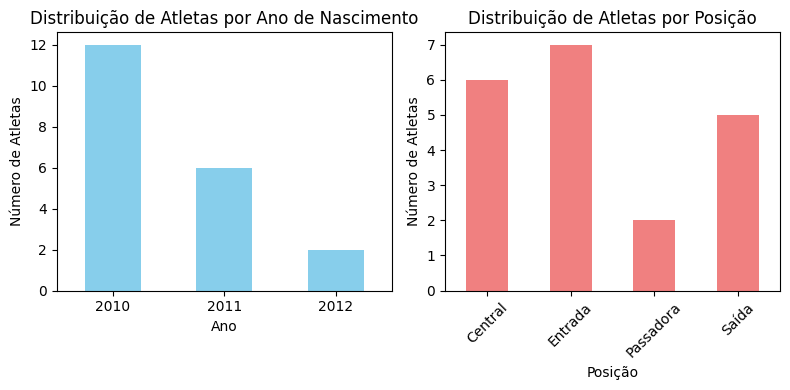

In [ ]:
#@title Distribuição por Ano de Nascimento e Posição

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

athletes_per_birthdate.plot(kind='bar', color='skyblue', ax=ax[0]); # Generate the chart
ax[0].set_title('Distribuição de Atletas por Ano de Nascimento') # Set the title
ax[0].set_xlabel('Ano') # Set x-axis label
ax[0].set_ylabel('Número de Atletas') # Set y-axis label
ax[0].tick_params(axis='x', rotation=0, labelrotation=0) # Rotates labels on the x axis

# Overlaying the normal distribution curve
birth_years = athletes_per_birthdate.index.to_numpy()

mean_birth_year = np.mean(birth_years)
std_birth_year = np.std(birth_years)

# Generate x values for the normal distribution curve, with some padding for better visualization
x = np.linspace(birth_years.min() - 1, birth_years.max() + 1, 50)
y = norm.pdf(x, mean_birth_year, std_birth_year)

# Scale the normal distribution curve to the bar chart's y-axis values, with some padding
y_scaled = y * athletes_per_birthdate.max() * 2


ax[0].plot(x, y_scaled, color='red', label='Normal Distribution', linestyle='--')
# ax[0].legend()

# # Step 6: Create position chart
athletes_per_position.plot(kind='bar', color='lightcoral', ax=ax[1]); # Generate the chart
ax[1].set_title('Distribuição de Atletas por Posição') # Set the title
ax[1].set_xlabel('Posição') # Set x-axis label
ax[1].set_ylabel('Número de Atletas') # Set y-axis label
ax[1].tick_params(axis='x', rotation=45, labelrotation=45 ) # Rotates labels on the x axis

plt.tight_layout(); # Adjust the layout to fit everything in the chart
plt.show()


De notar que a indicação sobre posições não é de todo vinculativa, e tem mudado com o tempo. Essa indicação é apenas útil para fazer o planemento dos jogos e das formações.

## Treinos: Filosofia e Abordagem


### Contexto

O Ericeirense contou com a inscrição de um elevado número de atletas dos anos 2009 a 2011 - aproximadamente 35 atletas. Foi tomada a decisão de criar duas equipas:

* Uma equipa de cadetes, composta pelas atletas de 2009 e pelas mais experientes de 2010;

* Uma equipa de iniciadas, formada pelas menos experientes de 2010 e pelas atletas de 2011.

Neste contexto, com atletas que nunca tiveram qualquer contacto com a competição e com menos de 6 meses de voleibol, o foco está claramente na formação e não nos resultados.


### Filosofia de Treino e Jogo

Aqui estão alguns dos principais fundamentos que regem a filosofia dos treinos. Sou o primeiro a admitir que com mais experiência alguns destes possam mudar, mas este é o ponto de partida que utilizei.


* Apostar nos fundamentos;

* Desenvolvimento individual acima do resultado desportivo;

* Maior aposta na componente técnica do que na componente tática;

* Implementar modelos de jogo avançados;

* Generalização nos treinos, especialização nos jogos;

* A todos os atletas é dada igual oportunidade... em treino.



### Tempos e Estrutura de Treinos

As iniciadas do Ericeirense têm, neste momento, disponíveis três blocos de treino semanais:

* Segundas-feiras, das 19:00 às 21:00, sendo que não temos acesso à rede nos primeiros 30 minutos de treino
* Quartas-feiras, das 19:00 às 21:00
* Sextas-feiras, das 19:00 às 21:00, sendo que não temos acesso à rede nos primeiros 30 minutos de treino

Às 20:30 inicia o treino das Cadetes, que às 21:00 têm acesso à rede.

## Resultados

Seguem-se os jogos e resultados ao longo da época, bem como um link para o vídeo do jogo. Esta lista será actualizada à medida que a época decorre.



### Resultados dos Jogos

Aqui estão os resultados dos jogos até agora:


| Date                | Opponent       | Location   | Match Score   | Result   | Sets                                | Video Link                           |
|:--------------------|:---------------|:-----------|:--------------|:---------|:------------------------------------|:-------------------------------------|
| 2024-11-03 | Sporting       | Away       | 0 - 3         | Loss     | (3-25, 6-25, 13-25)                 |                                      |
| 2024-11-10 | Sesimbra       | Home       | 0 - 3         | Loss     | (15-25, 13-25, 16-25)               | [Link](https://youtu.be/kIO4kf_FOAo) |
| 2024-11-17 | MTBA           | Home       | 0 - 3         | Loss     | (12-25, 17-25, 7-25)                | [Link](https://youtu.be/q7v3x_S3nNo) |
| 2024-11-24 | Alverca        | Away       | 1 - 3         | Loss     | (15-25, 25-18, 15-25, 16-25)        | [Link](https://youtu.be/kIO4kf_FOAo) |
| 2024-12-01 | Famões         | Home       | 0 - 3         | Loss     | (11-25, 12-25, 11-25)               | [Link](https://youtu.be/1owqKSwnqMI) |
| 2024-12-07 | Sporting       | Home       | 0 - 3         | Loss     | (6-25, 14-25, 13-25)                | [Link](https://youtu.be/N_xVWuPt_9A) |
| 2024-12-08 | Sesimbra       | Away       | 0 - 3         | Loss     | (10-25, 14-25, 21-25)               | [Link](https://youtu.be/mu4TWg6qSXI) |
| 2024-12-15 | MTBA           | Away       | 0 - 3         | Loss     | (18-25, 15-25, 18-25)               | [Link](https://youtu.be/8NMf0PD-Vms) |
| 2025-01-05 | Alverca        | Home       | 3 - 0         | Win      | (25-21, 25-15, 26-24)               | [Link](https://youtu.be/JiAHgfUyZVU) |
| 2025-01-12 | Famões         | Away       | 0 - 3         | Loss     | (17-25, 18-25, 24-26)               | [Link](https://youtu.be/yZoem7PeX8Q) |
| 2025-01-26 | Pelamora       | Home       | 0 - 3         | Loss     | (12-25, 11-25, 11-25)               | [Link](https://youtu.be/Ir5fMAGkXbo) |
| 2025-02-01 | CNG B          | Away       | 0 - 3         | Loss     | (12-25, 12-25, 14-25)               | [Link](https://youtu.be/TIesuACMn24) |
| 2025-02-02 | Vale Cavala    | Home       | 0 - 3         | Loss     | (19-25, 10-25, 21-25)               | [Link](https://youtu.be/uUwNdPmSk64) |
| 2025-02-09 | AMSAC          | Away       | 3 - 2         | Win      | (13-25, 20-25, 25-21, 25-17, 15-12) | [Link](https://youtu.be/Pr71JX_baT0) |
| 2025-03-09 | Belenenses B   | Home       | 0 - 3         | Loss     | (11-25, 24-26, 14-25)               | [Link](https://youtu.be/m8meMzxzTzs) |
| 2025-03-23 | Sintra Volei B | Home       | 0 - 3         | Loss     | (7-25, 21-25, 20-25)                | [Link](https://youtu.be/CKffUTN40Wg) |
| 2025-03-31 | MTBA B         | Away       | 3 - 1         | Win      | (14-25, 25-22, 25-21, 25-19)        | [Link](https://youtu.be/NLthq2c1j7o) |
| 2025-04-04 | CSJ Brito      | Home       | 0 - 3         | Loss     | (12-25, 19-25, 8-25)                | [Link](https://youtu.be/ZDTL7fSDzw0) |
| 2025-05-05 | CNG            | Away       | 0 - 3         | Loss     | (17-25, 11-25, 18-25)               | [Link](https://youtu.be/Fr-XbtpbMbs) |
| 2025-05-11 | TC Alcochete   | Home       | 0 - 3         | Loss     | (10-25, 15-25, 9-25)                | [Link](https://youtu.be/elym7lfeuSw) |
| 2025-05-18 | VC Setúbal     | Home       | 2 - 3         | Loss     | (25-23, 23-25, 16-25, 25-20, 12-15) | [Link](https://youtu.be/mcQm_ObxYmw) |
| 2025-05-24 | AMSAC          | Away       | 1 - 3         | Loss     | (23-25, 21-25, 25-21, 23-25)        | [Link](https://youtu.be/Al99u456XfA) |

### Evolução da pontuação

Segue a relação entre
pontos marcados e sofridos por jogo. Isto é apenas representativo, uma vez que o
grau de dificuldade do adversário fará toda a diferença.



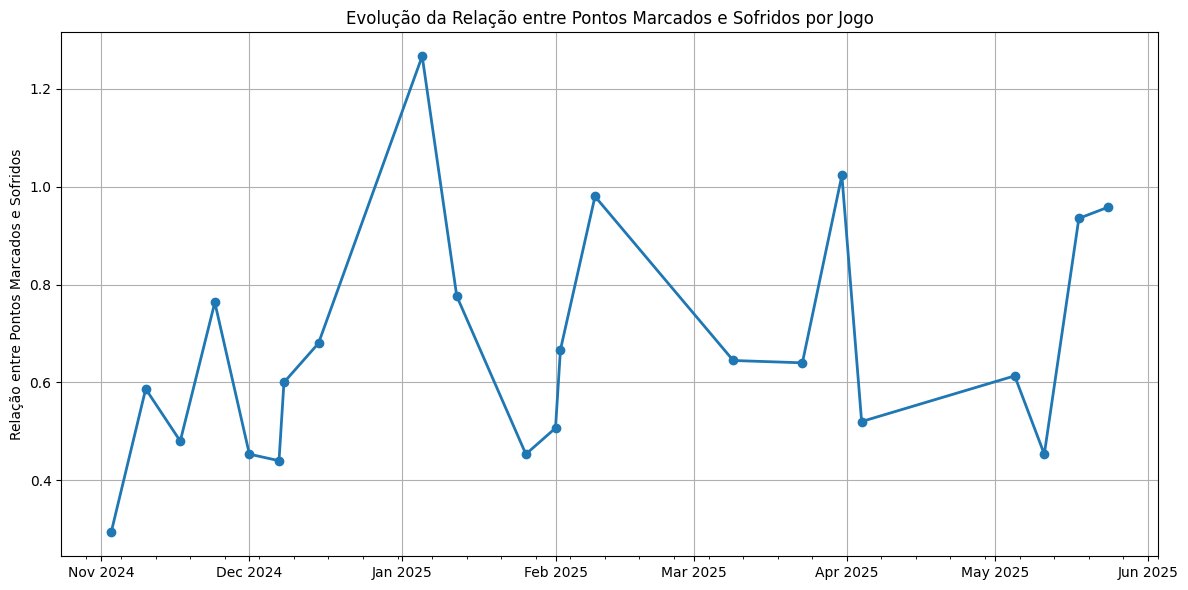

In [ ]:
#@title Jogos e Resultados

import pandas as pd
import re
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import Markdown, display

# URL of the CSV file
file_url = 'https://raw.githubusercontent.com/pmalves/coach-report-lv1/refs/heads/main/data/WebReports-Export.csv'

# Manually input missing match data
missing_match_data = [
    {"Location": "Lisbon", "Opponent": "Sporting", "Date": "2024-Nov-03", "Match Score": "0 - 3", "Sets": "(3-25, 6-25, 13-25)" , "Result": "Loss"}
]

# Youtube Video Links
video_links = [
    {"Date": "2024-11-10", "Video Link": "https://youtu.be/kIO4kf_FOAo"},
    {"Date": "2024-11-17", "Video Link": "https://youtu.be/q7v3x_S3nNo"},
    {"Date": "2024-11-24", "Video Link": "https://youtu.be/kIO4kf_FOAo"},
    {"Date": "2024-12-01", "Video Link": "https://youtu.be/1owqKSwnqMI"},
    {"Date": "2024-12-07", "Video Link": "https://youtu.be/N_xVWuPt_9A"},
    {"Date": "2024-12-08", "Video Link": "https://youtu.be/mu4TWg6qSXI"},
    {"Date": "2024-12-15", "Video Link": "https://youtu.be/8NMf0PD-Vms"},
    {"Date": "2025-01-05", "Video Link": "https://youtu.be/JiAHgfUyZVU"},
    {"Date": "2025-01-12", "Video Link": "https://youtu.be/yZoem7PeX8Q"},
    {"Date": "2025-01-26", "Video Link": "https://youtu.be/Ir5fMAGkXbo"},
    {"Date": "2025-02-01", "Video Link": "https://youtu.be/TIesuACMn24"},
    {"Date": "2025-02-02", "Video Link": "https://youtu.be/uUwNdPmSk64"},
    {"Date": "2025-02-09", "Video Link": "https://youtu.be/Pr71JX_baT0"},
    {"Date": "2025-03-09", "Video Link": "https://youtu.be/m8meMzxzTzs"},
    {"Date": "2025-03-23", "Video Link": "https://youtu.be/CKffUTN40Wg"},
    {"Date": "2025-03-31", "Video Link": "https://youtu.be/NLthq2c1j7o"},
    {"Date": "2025-04-04", "Video Link": "https://youtu.be/ZDTL7fSDzw0"},
    {"Date": "2025-05-05", "Video Link": "https://youtu.be/Fr-XbtpbMbs"},
    {"Date": "2025-05-11", "Video Link": "https://youtu.be/elym7lfeuSw"},
    {"Date": "2025-05-18", "Video Link": "https://youtu.be/mcQm_ObxYmw"},
    {"Date": "2025-05-24", "Video Link": "https://youtu.be/Al99u456XfA"}
]


# Fetch the file content from the URL
response = requests.get(file_url)
raw_data = response.text.splitlines()

# Initialize lists for parsed data
matches = []  # To store match-level data
games = []    # To store game-level data
player_stats_game = []  # Player statistics per game
player_stats_match = []  # Player statistics per match

current_match_id = 0  # To track match ID
current_game_number = 0  # To track game number within a match
inside_game_block = False  # To track if we are inside a game block

# Regular expression patterns for identifying blocks
game_pattern = re.compile(r"GAME(\d+): (.+)-(.+)-(\d{4}-\w{3}-\d{2}) \((\d+ - \d+)\)")
match_pattern = re.compile(r"MATCH: (.+)-(.+)-(\d{4}-\w{3}-\d{2})")
aggregate_pattern = re.compile(r"AGGREGATE")

# Friendly names mapping
friendly_names = {
"PLAYER_NUM": "Player Number",
"PLAYER_NAME": "Player Name",
"GAMES_PLAYED": "Games Played",
"POINTS_SCORED_ON_SERVE": "Points Scored on Serve",
"PT_SCORE_PERCENT": "Serve Score Percentage",
"ACES": "Aces",
"SERVE_ATTEMPTS": "Serve Attempts",
"SERVE_ERRORS": "Serve Errors",
"SERVE_ERROR_PERCENT": "Serve Error Percentage",
"SERVE_NET_POINTS": "Serve Net Points",
"PASS_RATING": "Pass Rating",
"PASS_ATTEMPTS": "Pass Attempts",
"SERVE_RCV_ERRORS": "Serve-Receive Errors",
"COMBINED_KILLS": "Combined Kills",
"COMBINED_KILL_ERRORS": "Combined Kill Errors",
"ATTACK_NET_POINTS": "Attack Net Points",
"HITTING_EFFICIENCY": "Hitting Efficiency",
"COMBINED_KILL_PERCENT": "Combined Kill Percentage",
"HITS_STILL_IN_PLAY": "Hits Still in Play",
"COMBINED_KILL_ATTEMPTS": "Combined Kill Attempts",
"ASSISTS": "Assists",
"BALL_HANDLING": "Ball Handling",
"SETTING_ERRORS": "Setting Errors",
"BLOCKS": "Blocks",
"BLOCK_ERRORS": "Block Errors",
"NET_BLOCKS": "Net Blocks",
"DIG_ERRORS": "Dig Errors",
"DIGS": "Digs",
"DIG_ERROR_PERCENT": "Dig Error Percentage",
"FAULTS": "Faults",
"SERVE_ATTEMPTS_PER_GAME": "Serve Attempts per Game",
"SERVE_ERRORS_PER_GAME": "Serve Errors per Game",
"ACES_PER_GAME": "Aces per Game",
"POINTS_SCORED_ON_SERVE_PER_GAME": "Points Scored on Serve per Game",
"PASS_ATTEMPTS_PER_GAME": "Pass Attempts per Game",
"SERVE_RCV_ERRORS_PER_GAME": "Serve-Receive Errors per Game",
"COMBINED_KILLS_PER_GAME": "Combined Kills per Game",
"COMBINED_KILL_ERRORS_PER_GAME": "Combined Kill Errors per Game",
"ATTACK_NET_POINTS_PER_GAME": "Attack Net Points per Game",
"HITTING_EFFICIENCY_PER_GAME": "Hitting Efficiency per Game",
"HITS_STILL_IN_PLAY_PER_GAME": "Hits Still in Play per Game",
"COMBINED_KILL_ATTEMPTS_PER_GAME": "Combined Kill Attempts per Game",
"BLOCKS_PER_GAME": "Blocks per Game",
"BLOCK_ERRORS_PER_GAME": "Block Errors per Game",
"NET_BLOCKS_PER_GAME": "Net Blocks per Game",
"DIG_ERRORS_PER_GAME": "Dig Errors per Game",
"DIGS_PER_GAME": "Digs per Game",
"FAULTS_PER_GAME": "Faults per Game"
}


# Parse the file
for line in raw_data:
    line = line.strip()

    # Check for the start of a new game block
    game_match = game_pattern.match(line)
    if game_match:
        if game_match.group(1) == '1':  # If it's GAME1, start a new match
            current_match_id += 1
        game_number = int(game_match.group(1))
        location = game_match.group(2)
        opponent = game_match.group(3)
        date = game_match.group(4)
        set_score = game_match.group(5).replace(' ', '')

        current_game = {
            'Match_ID': current_match_id,
            'Game_Number': game_number,
            'Location': location,
            'Opponent': opponent,
            'Date': date,
            'Set_Score': set_score
        }
        games.append(current_game)
        current_game_number = game_number
        inside_game_block = True  # We are now inside a game block
        continue

    # Check for the start of a match block
    match_match = match_pattern.match(line)
    if match_match:
        location = match_match.group(1)
        opponent = match_match.group(2)
        date = match_match.group(3)

        current_match = {
            'Match_ID': current_match_id,
            'Location': location,
            'Opponent': opponent,
            'Date': date
        }
        matches.append(current_match)
        inside_game_block = False  # We are now inside a match block
        continue

    # Check for the start of the aggregate block
    if aggregate_pattern.match(line):
        break  # Stop parsing at the aggregate block

    # Check for player statistics (header or data lines)
    if line.startswith("PLAYER_NUM"):
        player_stats_header = line.split(",")
        continue  # Skip header line

    if re.match(r"\d{1,2},", line):  # Player statistics data line
        player_data = line.split(",")
        if inside_game_block:
            player_data_dict = dict(zip(player_stats_header, player_data))
            player_data_dict['Match_ID'] = current_match_id
            player_data_dict['Game_Number'] = current_game_number
            player_stats_game.append(player_data_dict)
        else:
            player_data_dict = dict(zip(player_stats_header, player_data))
            player_data_dict['Match_ID'] = current_match_id
            player_stats_match.append(player_data_dict)
        continue

    # Check for team statistics (special player "(team)")
    if line.startswith(",(team)"):
        team_data = line.split(",")
        team_data_dict = dict(zip(player_stats_header, team_data))
        team_data_dict['Player Name'] = "(team)"
        if inside_game_block:
            team_data_dict['Match_ID'] = current_match_id
            team_data_dict['Game_Number'] = current_game_number
            player_stats_game.append(team_data_dict)
        else:
            team_data_dict['Match_ID'] = current_match_id
            player_stats_match.append(team_data_dict)
        continue

# Convert parsed data into DataFrames
games_df = pd.DataFrame(games)
matches_df = pd.DataFrame(matches)
player_stats_game_df = pd.DataFrame(player_stats_game)
player_stats_match_df = pd.DataFrame(player_stats_match)

# Function to calculate match score and result based on game scores
def calculate_match_score_and_result(match_id, games_df):
    # Filter games belonging to the current match
    match_games = games_df[games_df['Match_ID'] == match_id]

    # Count the number of games won by each team
    team_wins = sum([1 for score in match_games['Set_Score'] if int(score.split('-')[0]) > int(score.split('-')[1])])
    opponent_wins = len(match_games) - team_wins  # Total games minus team wins

    match_score = f"{team_wins} - {opponent_wins}"
    result = "Win" if team_wins > opponent_wins else "Loss"

    return match_score, result

# Apply the function to each match to calculate the Match Score and Result
matches_df['Match Score'], matches_df['Result'] = zip(*matches_df['Match_ID'].apply(lambda x: calculate_match_score_and_result(x, games_df)))

# Function to get the set results for each match
def get_sets_for_match(match_id, games_df):
    # Filter games belonging to the current match
    match_games = games_df[games_df['Match_ID'] == match_id]
    # Extract the set scores and join them with commas
    sets = ", ".join(match_games['Set_Score'].tolist())
    return f'({sets})'

# Apply the function to generate the "Sets" column
matches_df['Sets'] = matches_df['Match_ID'].apply(lambda x: get_sets_for_match(x, games_df))


# Adding missing_match_data
# Step 1: Convert missing_match_data to a DataFrame
missing_match_df = pd.DataFrame(missing_match_data)


# Step 2: Append missing_match_df to matches_df
matches_df = pd.concat([matches_df, missing_match_df], ignore_index=True)

# Step 3: Convert the Date column to datetime type
matches_df['Date'] = pd.to_datetime(matches_df['Date'], format='%Y-%b-%d')

# Step 4: Sort matches_df by Date
matches_df = matches_df.sort_values(by='Date').reset_index(drop=True)

# Step 5: Classify games as "Home" or "Away" in both matches_df and games_df
home_locations = ['Ericeira', 'Carvoeira']  # Define home locations
matches_df['Location'] = matches_df['Location'].apply(lambda loc: 'Home' if loc in home_locations else 'Away')
games_df['Location'] = games_df['Location'].apply(lambda loc: 'Home' if loc in home_locations else 'Away')

# Step 5.5 - Get video link

# Convert the list to a DataFrame
video_links_df = pd.DataFrame(video_links)
video_links_df['Date'] = pd.to_datetime(video_links_df['Date'])  # Ensure date format matches

# Merge video links into matches_df
matches_df = matches_df.merge(video_links_df, on='Date', how='left')
# Replace full URLs with Markdown links
matches_df['Video Link'] = matches_df['Video Link'].apply(
    lambda url: f"[Link]({url})" if pd.notna(url) else ""
)


# Step 6: Formatting date format
#matches_df['Date'] = matches_df['Date'].dt.strftime('%Y-%m-%d')
# games_df['Date'] = games_df['Date'].dt.strftime('%Y-%b-%d')

# Let's not convert the data to the correct format:
# List of columns to convert to numeric (ignoring percentage columns for now)
numeric_columns = [
    "PLAYER_NUM", "GAMES_PLAYED", "POINTS_SCORED_ON_SERVE", "ACES", "SERVE_ERRORS",
    "SERVE_NET_POINTS", "PASS_RATING", "PASS_ATTEMPTS", "SERVE_RCV_ERRORS", "COMBINED_KILLS",
    "COMBINED_KILL_ERRORS", "ATTACK_NET_POINTS", "HITTING_EFFICIENCY", "HITS_STILL_IN_PLAY",
    "COMBINED_KILL_ATTEMPTS", "ASSISTS", "BALL_HANDLING", "SETTING_ERRORS", "BLOCKS",
    "BLOCK_ERRORS", "NET_BLOCKS", "DIG_ERRORS", "DIGS", "FAULTS"
]

# Convert columns in player_stats_game_df to numeric where applicable
player_stats_game_df[numeric_columns] = player_stats_game_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert columns in player_stats_match_df to numeric where applicable
player_stats_match_df[numeric_columns] = player_stats_match_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Skip percentage columns by converting them to float (proportions)
# percentage_columns = ["PT_SCORE_PERCENT", "SERVE_ERROR_PERCENT", "DIG_ERROR_PERCENT"]
# for col in percentage_columns:
#     player_stats_game_df[col] = player_stats_game_df[col].str.replace('%', '').astype(float) / 100
#     player_stats_match_df[col] = player_stats_match_df[col].str.replace('%', '').astype(float) / 100

# Calculate the SERVE_ATTEMPTS

# Step 1: Convert "SERVE_ERROR_PERCENT" to a numeric value (proportion)
# Replace empty strings with NaN before converting to float
player_stats_game_df['SERVE_ERROR_PERCENT'] = player_stats_game_df['SERVE_ERROR_PERCENT'].replace('', np.nan).str.replace('%', '').astype(float)

# Step 2: Calculate "SERVE_ATTEMPTS" using the formula
player_stats_game_df['SERVE_ATTEMPTS'] = player_stats_game_df.apply(
    lambda row: row['POINTS_SCORED_ON_SERVE'] if pd.isna(row['SERVE_ERROR_PERCENT']) or row['SERVE_ERROR_PERCENT'] == 0
    else row['SERVE_ERRORS'] / (row['SERVE_ERROR_PERCENT'] / 100),
    axis=1
).round().astype(int)

# Step 3: Handle the same calculation for player_stats_match_df
# Replace empty strings with NaN before converting to float
player_stats_match_df['SERVE_ERROR_PERCENT'] = player_stats_match_df['SERVE_ERROR_PERCENT'].replace('', np.nan).str.replace('%', '').astype(float)

player_stats_match_df['SERVE_ATTEMPTS'] = player_stats_match_df.apply(
    lambda row: row['POINTS_SCORED_ON_SERVE'] if pd.isna(row['SERVE_ERROR_PERCENT']) or row['SERVE_ERROR_PERCENT'] == 0
    else row['SERVE_ERRORS'] / (row['SERVE_ERROR_PERCENT'] / 100),
    axis=1
).round().astype(int)


# Create the stats_match object
# Step 1: Identify numeric columns to aggregate (exclude "PLAYER_NUM" and "GAMES_PLAYED")
columns_to_aggregate = player_stats_match_df.select_dtypes(include=['number']).columns.difference(['Player Number', 'Games Played', 'Match_ID'])

# Step 2: Group by "Match_ID" and sum the numeric columns
stats_match_df = player_stats_match_df.groupby('Match_ID')[columns_to_aggregate].sum().reset_index()

# Step 3: Calculate back the serve error percentage
stats_match_df['SERVE_ERROR_PERCENT'] = (stats_match_df['SERVE_ERRORS'] / stats_match_df['SERVE_ATTEMPTS'] * 100)

# Step 4: Merge stats_match_df with matches_df on 'Match_ID' to recover match data
stats_match_df = stats_match_df.merge(
    matches_df[['Match_ID', 'Date', 'Opponent', 'Location', 'Match Score', 'Result', 'Sets']],
    on='Match_ID',
    how='left'
)

# Now let's add a few _PER_GAME stats
# Step 1: Ensure 'Num_Sets' column exists in stats_match_df
if 'Num_Sets' not in stats_match_df.columns:
    matches_df['Num_Sets'] = matches_df['Sets'].apply(lambda x: len(x.split(',')))
    stats_match_df = stats_match_df.merge(matches_df[['Match_ID', 'Num_Sets']], on='Match_ID', how='left')

# Step 2: List of columns to normalize
per_game_columns = [
    "SERVE_ATTEMPTS", "ACES", "SERVE_ERRORS","POINTS_SCORED_ON_SERVE","PASS_ATTEMPTS", "SERVE_RCV_ERRORS", "COMBINED_KILLS", "COMBINED_KILL_ERRORS",
    "ATTACK_NET_POINTS", "HITTING_EFFICIENCY", "HITS_STILL_IN_PLAY", "COMBINED_KILL_ATTEMPTS",
    "BLOCKS", "BLOCK_ERRORS", "NET_BLOCKS", "DIG_ERRORS", "DIGS", "FAULTS"
]

# Step 3: Normalize columns by the number of sets and create new columns
for col in per_game_columns:
    stats_match_df[f"{col}_PER_GAME"] = stats_match_df[col] / stats_match_df['Num_Sets']




# Diplay the markdown result of the games
matches_table_md = matches_df[['Date','Opponent','Location', 'Match Score', 'Result', 'Sets', 'Video Link']].to_markdown(index=False).replace(" 00:00:00","")

# Sanitizing the table and translating it
# Rename columns using friendly names
player_stats_game_df.rename(columns=friendly_names, inplace=True)
player_stats_match_df.rename(columns=friendly_names, inplace=True)
stats_match_df.rename(columns=friendly_names, inplace=True)



# Step 6: Create formatted Markdown string
results_description_md = f"""

### Resultados dos Jogos

Aqui estão os resultados dos jogos até agora:


{matches_table_md}

### Evolução da pontuação

Segue a relação entre
pontos marcados e sofridos por jogo. Isto é apenas representativo, uma vez que o
grau de dificuldade do adversário fará toda a diferença.

"""

display(Markdown(results_description_md))



# Let's plot the ratio between poits scored and allowed
# Step 1: Function to calculate total points scored and allowed from "Sets"
def calculate_total_points(sets_str):
    sets = sets_str.replace("(","").replace(")","").split(', ')
    points_scored = sum(int(score.split('-')[0]) for score in sets)
    points_allowed = sum(int(score.split('-')[1]) for score in sets)
    return points_scored, points_allowed

# Step 2: Apply the function to the "Sets" column to get total points
matches_df[['Total Points Scored', 'Total Points Allowed']] = matches_df['Sets'].apply(lambda x: pd.Series(calculate_total_points(x)))

# Step 3: Calculate the ratio of total points scored to total points allowed
matches_df['Points Scored / Allowed Ratio'] = matches_df['Total Points Scored'] / matches_df['Total Points Allowed']

# Step 4: Plot the line-dot chart
plt.figure(figsize=(12, 6))
plt.plot(matches_df['Date'], matches_df['Points Scored / Allowed Ratio'], marker='o', linestyle='-', linewidth=2)

# Step 5: Customize the chart
plt.title('Evolução da Relação entre Pontos Marcados e Sofridos por Jogo')
plt.ylabel('Relação entre Pontos Marcados e Sofridos')
# plt.xticks(rotation=45)
plt.grid(True)

# Use consistent date formatting for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., "Oct 2024"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks for months
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())  # Minor ticks for weeks

plt.tight_layout()

# Show the chart
plt.show()

# stats_match_df.columns


# Relatório de Estágio

Esta secção constitui uma reflexão, à posteriori, sobre todos os elementos-base descritos nas secções anteriores. Apresenta considerações sobre fundamentos que foram, entretanto, colocados em causa, notas acerca da relação entre atletas e pais e, em suma, uma interpretação pessoal da primeira época enquanto treinador.

## Clube

Como referido, todo este processo aconteceu de forma muito inesperada e repentina, algo que provavelmente só seria proporcionado por um clube como o Ericeirense (GDUE), que está no mesmo estágio de maturidade, enquanto clube, que eu como treinador. Isso tem os seus prós e contras, sendo o equivalente, na vida empresarial, a estar envolvido numa _start-up_.

Alguns dos prós:

* Ter a oportunidade de ser treinador principal de uma equipa de formação.
* Liberdade para implementar ideias.
* Estar envolvido em todas as áreas da equipa.
* Poder acompanhar e participar na própria evolução do clube.

Algumas das desvantagens:

* Ter de descobrir tudo do zero.
* Falta de recursos e infraestrutura.
* Total ausência de processos.
* Ausência de redundância nas tarefas (_one-man-show_).
* Insegurança a longo prazo.

É claro para mim que, se é necessária uma evolução enquanto treinador, é também fundamental uma rápida maturação da estrutura do clube; se esses passos não forem dados, se não forem implementados processos escaláveis com funções bem definidas e elementos de redundância que evitem pontos únicos de falha, o futuro a longo prazo do clube estará em risco.

Dito isto, sou o primeiro a reconhecer que, se o clube não estivesse neste estágio, nunca me teria sido dada a oportunidade de treinar uma equipa.


### Estrutura Logística

Esta é uma das maiores dificuldades do clube. Não temos espaço e, consequentemente, tempos de treino adequados. A ginástica atual, com tempos de treino sobrepostos, traz imensas consequências negativas — falta de espaço, excesso de barulho, bolas a voar em todas as direções. É impossível pedir às miúdas que mantenham um nível de concentração dentro das condições atuais.

Mesmo algumas modificações que estão a ser implementadas (como a colocação de duas redes no mesmo espaço) são francamente insuficientes e impedem a criação de mais escalões. O facto de ser uma modalidade no seu início de vida (apesar de estar num clube com história) impede que tenha a prioridade adequada aos olhos da câmara no que diz respeito à atribuição de novos espaços.


## Campeonato

Não foi para mim uma surpresa encontrar a estrutura dos campeonatos bem organizada e com uma mecânica "bem oleada". Surpreenderam-me dois pontos: a quantidade de equipas femininas (mas os rapazes já não praticam voleibol?!) e a sua qualidade — não esperava ver _tanta_ miúda de 13 e 14 anos com vários anos de voleibol nas costas.

Suponho que seja o número de equipas e jogadoras que justifique o enorme número de escalões: minis, infantis, iniciadas, cadetes, juvenis, etc., tudo agrupado por um único ano de nascimento. Esse é um ponto onde não estou totalmente convencido... _"Sou do tempo"_ em que os escalões abrangiam 2 anos e, por muito difícil que fosse aturar consecutivamente o Barroso velho e o Barroso novo, ver e jogar com equipas de configurações tão diferentes era uma oportunidade que me parece que se perdeu entretanto. Admito que possa mudar de ideias no futuro.

## Filosofia e Abordagem

Estes foram os fundamentos adotados desde o início da época:

* Apostar nos fundamentos  
* Desenvolvimento individual acima do resultado desportivo  
* Maior aposta na componente técnica do que na componente tática  
* Implementar modelos de jogo avançados  
* Generalização em treinos, especialização em jogos  
* A todos os atletas é dada igual oportunidade... em treino  

Olhando para estes axiomas passados 6 meses, tenho a dizer que todos foram integralmente respeitados ao longo da época, apesar de a forma como alguns foram implementados ter sofrido naturalmente adaptações.

Alguns comentários em cada um deles:

> _Apostar nos fundamentos_

Senti algumas dificuldades em manter este ponto. Confesso que dei muitas vezes por mim a tentar acompanhar o ritmo das atletas mais avançadas, mas, dada a dinâmica da equipa (novos elementos, dificuldades naturais de cada uma), é muitas vezes necessário voltar um pouco (ou mesmo muito) atrás. Começo muitos treinos com o básico de uma manchete ou passe, ou volto a reforçar como se faz a chamada.

Ao acompanhar as atletas ao longo da época, torna-se notório que a aprendizagem motora é algo que demora tempo. É necessário treinar um movimento durante muito tempo para que ele se torne automático. E muito mais difícil do que ensinar algo novo, é corrigir um movimento errado; tenho atletas que sabem exatamente o que estão a fazer mal, mas depois demonstram incapacidade em corrigir esses erros. Mesmo com recurso a gravação de vídeo, partilha de recursos com elas (idealmente _YouTube Shorts_ ou _Instagram Reels_, porque me recuso a instalar o _TikTok_) e trabalho específico durante o tempo complementar de treino, o grau de sucesso não é brilhante...

Mas, muito ocasionalmente, acontecem algumas coisas que nos fazem sorrir... Recentemente, uma jogadora de outro clube juntou-se à equipa e ficou visivelmente desorientada quando, nos normais exercícios de aquecimento, viu toda a equipa a fazer enrolamentos — algo que nunca tinha aprendido a fazer. O ar de orgulho das outras atletas foi, parafraseando a Mastercard... _priceless_!

> _Desenvolvimento individual acima do resultado desportivo_  

O meu objetivo sempre foi que as miúdas aprendam a jogar voleibol. Um exemplo que lhes dou, e que me parece representativo: prefiro que elas falhem um remate do que acertem um passe para o outro lado da rede ao terceiro toque. No longo prazo, podemos perder muitos pontos, mas ganhamos jogadoras.

Apesar de sempre ter mantido este fundamento, a forma de o implementar foi mudando ao longo do tempo. Nos primeiros jogos, dava sempre igual tempo de jogo a cada jogadora, sabendo o peso que a real situação de jogo tem no desenvolvimento individual.

Contudo, e com ritmos de desenvolvimento diferentes por parte das jogadoras, rapidamente me deparei com um enorme problema: resultados que, em condições normais, já eram desnivelados, tornavam-se autênticas tareias quando composições mais fracas estavam em jogo, e os efeitos na moral da equipa eram elevadíssimos. Ao tentar dar oportunidade a algumas, estava a prejudicar todas, com prejuízo a nível de motivação e, por consequência direta, de evolução.

Em resumo, cheguei à conclusão de que o desenvolvimento individual está também ligado aos resultados desportivos.

> _Maior aposta na componente técnica do que na componente tática_  

Não considerei a componente tática nesta fase uma prioridade, quando comparada com a componente técnica. A principal razão é a seguinte: quando treinamos a componente tática, pela natureza do trabalho, normalmente temos apenas uma bola no ar para 12-14 jogadoras.

Ora, o que elas precisam nesta fase é contacto com a bola. O meu objetivo é, em cada exercício, ter o maior número possível de bolas no ar, com o campo dividido em 2, 3 ou em formatos mais dinâmicos como _King of the Court_.

O ponto principal para praticar a componente tática... são os próprios jogos. Nesta fase, encaro claramente os jogos como um quarto treino semanal.

> _Implementar modelos de jogo avançados_  

Este fundamento pode parecer um contra-senso em relação ao anterior, mas passo a explicar: com tempo limitado para a parte tática, a minha opção foi a de "curto-circuitar" modelos táticos intermédios. Passei todos os modelos de jogo "temporários" (6-0, 4-2, outras variantes), e em 5 semanas coloquei a equipa a jogar no modelo 5-1.

Durante o curso de treinadores de nível I, o Professor Jorge Infante referiu algo que fez sentido para mim na altura: _"Não faz sentido evoluir do sistema 6-0 enquanto a equipa não conseguir colocar a receção no sítio certo"_. No entanto, optei por uma abordagem diferente: coloquei as miúdas a aprender as trocas, penetrações e movimentos para jogar em 5-1. Elas podem não conseguir colocar uma receção no sítio... mas quando conseguirem, as peças vão encaixar e já saberão o que fazer.

Esta opção é também resultado de experiência pessoal. Quando jogava nos iniciados/juvenis do Benfica, no distante ano de 1783, tínhamos uma equipa tecnicamente avançada e jogávamos várias vezes contra uma equipa do Sporting que metia medo no ataque à rede, mas como não davam uma para a caixa na receção e na defesa, levavam consistentemente 3-0. O problema foi que eles eventualmente aprenderam a receber e a defender; toda a nossa vantagem se desvaneceu, deixamos de lhes conseguir ganhar e eventualmente essa equipa conseguiu um título nacional.

Daí a opção de avançar rapidamente pelos diferentes modelos:

* Primeiro jogo foi em 6-0  
* Segundo jogo foi em 4-2 simples apenas com transição do distribuidor para a zona 3  
* Terceiro jogo em 4-2 simples com transição dos defesas para as posições deles (entradas na 6, centrais na 5, passador na 1). De notar que, nesta altura, as jogadoras ainda não sabiam que já estavam a preparar-se para fazer posições fixas  
* Quarto jogo em 4-2 simples com posições fixas  
* Quinto e seguintes em 5-1 com passador na 3 e na 1  
* Segunda fase do campeonato em 5-1 com passador na 2 e na 1  

Dois pontos que se tornaram claros para mim durante este período:

* Quem faz isto de olhos fechados há 30 anos já se esqueceu o quão complexo isto é para quem nunca fez isto.  
* Depois de uns períodos absolutamente caóticos com as miúdas a fazer reboot no meio dos pontos, foi impressionante ver que, quando as coisas "encaixaram", a facilidade com que elas agora fazem as coisas. Hoje, sabem exatamente o que fazer quando jogam nas diferentes posições, à exceção daquela jogadora que me pergunta _em todos os jogos_ "onde é a zona 4?" 🤬  

> _Generalização em treinos, especialização em jogos_  

Este axioma surgiu no decorrer de algumas semanas de treinos e jogos. Inicialmente estava contra qualquer tipo de especialização precoce, e apesar de ainda ser um princípio que sigo, a minha abordagem é agora um pouco menos restritiva.

**Em treino**, e como referido, há uma aposta maior na componente técnica. Aí, todas as atletas passam por todas as fases de jogo: serviço, receção, passe, ataque, defesa e bloco (mesmo quem tem $1,20m$ e não chega à rede... afinal, pode ser que cresçam).

**Em jogo**, tiro partido das mais-valias que cada atleta oferece no seu percurso de desenvolvimento. Como exemplo, a receção é assegurada principalmente pelas jogadoras de entrada, apoiadas pelo oposto, e os centrais recebem principalmente bolas curtas em passe; o ataque é conduzido principalmente por quem ataca melhor (trabalhando a leitura de jogo da distribuidora); a atual distribuidora principal, que tem umas mãozinhas que parece a reencarnação do Miguel Maia num corpo de meio metro, joga na zona 3, não bloca em jogo e protege os _amorties_ atrás das blocadoras em 2 e 4.

Tenho chegado à conclusão que esta abordagem híbrida é a mais adequada: não só não limita o desenvolvimento geral das atletas (apoiado no trabalho feito na componente técnica do jogo), como tira partido do melhor que cada atleta tem para oferecer na altura, permitindo melhores resultados desportivos.

> _A todos os atletas é dada igual oportunidade... em treino_  

Nos primeiros jogos tinha como abordagem dar sempre tempo a todas as atletas em campo durante um jogo. Tentava sempre que todas jogassem pelo menos um set (dada a restrição de haver apenas uma substituição, algo que, e permitam-me uma análise de comentador desportivo, não lembra nem ao diabo). Contudo, e dado que algumas das atletas não asseguravam os básicos, isto tinha como resultado que em algumas formações os resultados se apresentassem ainda mais desnivelados que o habitual, o que tinha um elevado custo a nível da moral do grupo e até da própria integração das atletas mais fracas no grupo de trabalho. Em resumo, esta abordagem fazia mais "mal que bem".

Passei a adotar um discurso diferente com as atletas; gosto muito dos exercícios em _sobe e desce_, onde após um certo tempo, quem executa melhor os desafios propostos "sobe" para o campo mais competitivo, e quem tem menos sucesso "desce". Sou sempre muito claro com elas ao referir que quem passa mais tempo nos campos "altos" vai ter mais tempo de jogo, e que é ali que elas têm de se desafiar. Era um exercício um pouco controverso no início, mas entretanto "entranhou-se" e agora é um dos preferidos das atletas.

Algo que também aprendi foi que algumas das técnicas de adaptação que usava estavam a revelar-se negativas. Um exemplo: como as atletas revelavam muitas dificuldades na colocação do serviço na metade do campo em que jogavam, o exercício era muito parado. Comecei por adotar rampas, como começar com "serviço em passe" dos 3 metros, depois dos 6, etc. Mas se por um lado isso tornava o exercício bem mais dinâmico, as estatísticas mostravam que não estava a haver melhoria no número de serviços falhados em jogo; passei a mudar um pouco a estratégia, colocando 5-10 minutos de treino de serviço antes do "Sobe e Desce" mas sempre impondo serviços da linha final, fosse por cima ou por baixo, consoante a capacidade das atletas. Com essa dificuldade adicional, e passadas algumas semanas, as atletas conseguiram colocar o serviço de forma a conseguir segurar o exercício, e o número de serviços falhados em jogo também diminuiu visivelmente.

Manter um nível de empenho e competitividade alto em todos os treinos é provavelmente o aspeto mais desgastante de quem tem um grupo de adolescentes à frente. Gostaria inclusive de deixar a sugestão à AVL/FPV para a [re]introdução de violência física para com as atletas!


## Tempos e Estrutura de Treinos

Com as limitações de horários acima apresentadas, a estrutura escolhida para os treinos foi a seguinte:

* 90 minutos para toda a equipa
* 30 minutos extra para trabalho específico


### Treino Geral

O treino geral foi sempre dividido nos seguintes blocos:

* Aquecimento  
* Componente Técnica  
* Componente Tática  
* _Cool down_

#### Aquecimento

O aquecimento teve sempre uma componente de força e uma componente cardiovascular com elementos técnicos incluídos, fundamentalmente sprints, deslocamentos laterais, mergulhos e agachamentos.

Este aquecimento é o mais conciso possível, dadas as restrições temporais. Para a componente física escolho habitualmente a metodologia _Tabata_, com 4 exercícios feitos duas vezes cada um, seguido de uma série de push-ups até à falha.

A componente cardiovascular consiste num conjunto de sprints e deslocamentos laterais que incluem mergulhos e enrolamentos. É algo que não varia muito, e tem como objetivo tornar as atletas muito confortáveis e habituadas a "ir ao chão”. O que muda é a forma, tentando acrescentar alguns jogos ou desafios para adicionar variedade.

Aqui está um exemplo da componente de aquecimento:


```
Warm-Up (15 min)
* Tabata Exercises: Burpee Broad Jumps, Mountain Climbers, Side Plank with Arm Reach, High-Knees + Push-Ups to failure
* Block, Attack, Dive, and Roll Circuit with Fun Elements

```

### Treino Geral

O treino geral foi sempre dividido nos seguintes blocos:

* Aquecimento  
* Componente Técnica  
* Componente Tática  
* _Cool down_

#### Aquecimento

O aquecimento teve sempre uma componente de força e uma componente cardiovascular com elementos técnicos incluídos, fundamentalmente sprints, deslocamentos laterais, mergulhos e agachamentos.

Este aquecimento é o mais conciso possível, dadas as restrições temporais. Para a componente física escolho habitualmente a metodologia _Tabata_, com 4 exercícios feitos duas vezes cada um, seguido de uma série de push-ups até à falha.

A componente cardiovascular consiste num conjunto de sprints e deslocamentos laterais que incluem mergulhos e enrolamentos. É algo que não varia muito, e tem como objetivo tornar as atletas muito confortáveis e habituadas a "ir ao chão”. O que muda é a forma, tentando acrescentar alguns jogos ou desafios para adicionar variedade.

Aqui está um exemplo da componente de aquecimento:



```
Technical Component (55 min)
1. Up and Down Game: Individual (10 min)
    * Players rotate through serving, receiving, setting, and attacking roles.
    * Scoring: 1 point for successful passes from the setter, 2 points for jump attacks.
2. Service Challenge (10 min)
    * Serve to specific zones in sequence: 2, 3, 4, 5, 6, 1.
3. Net Attack Drill with Predefined Zones (15 min)
    * Attackers must call out their attack type and target specific zones.
4. 2x2 Up and Down Games (20 min)
    * Normal games requiring 3 touches per side.
    * Scoring: Jump attacks and blocks score 2 points; rally wins score 1 point.
    * Winning pairs move up, losing pairs move down.
```

#### Componente Tática

Após as componentes de aquisição e aplicação, a parte tática incide na consolidação da aprendizagem em situações de jogo. O foco está na interação em equipa entre atletas e em todos os sistemas táticos necessários para os jogos.

Aqui está um exemplo desta componente:


```
Tactical Component (30 minutes)
Side-Out Drill:
* Teams alternate receiving 6 serves per rotation.
* Objective: Perform successful side-outs to score points.
* Rotate positions after each round.
* Teams switch after completing a full rotation.
* Added Requirement: Setters must loudly call the type of play they intend to execute and name the intended target before passing.
```

#### _Cool Down_

Simples: manchetão e grito. Sou da opinião de que alongamentos não servem para absolutamente nada e não perco tempo precioso de treino com essas fantochadas!

Todos os resumos, conversas e balanços de treino são feitos à posteriori por _WhatsApp_ (mais sobre isto mais à frente).


### Treino Específico

Para complementar as sessões gerais, habitualmente são selecionadas um número reduzido de atletas (2 a 4) que ficam mais 30 minutos a fazer trabalho específico. Desde o aperfeiçoamento até à correção de gestos técnicos, tenho observado bons resultados desse investimento, sendo muitas vezes as próprias atletas a pedir para ficar.


## A Componente de Praia

![Beach Volley](https://github.com/pmalves/coach-report-lv1/blob/main/images/beach-volley.jpg?raw=true)

Para complementar a falta de recursos logísticos, decidimos aproveitar os recursos naturais, e várias vezes temos treinado na praia. Na realidade, considero a época de _indoor_ como aquela actividade que utilizamos para preencher aquele tempo em que não conseguimos praticar Voleibol de Praia de forma consistente.

Dito isto, durante as férias escolares foram organizadas diversas sessões na praia, onde os resultados foram, francamente, melhores do que esperava, com alguns bons jogos mesmo na modalidade 2x2. Não há forma melhor de entenderem que têm de se mexer em campo.

Estando também em curso uma boa dinamização do Voleibol de Praia na Ericeira, houve a oportunidade de fazer um torneio Sub-17 durante uma paragem no campeonato.

A adesão foi francamente positiva, com a participação de 20 atletas, das quais um número elevado eram atletas do clube, incluindo a dupla vencedora!

![GDUE](https://github.com/pmalves/coach-report-lv1/blob/main/images/sub17-group.jpg?raw=true)
![GDUE](https://github.com/pmalves/coach-report-lv1/blob/main/images/sub17-winners.jpg?raw=true)

## Gestão e Motivação de Atletas

### Comunicação

#### Atletas

Este é um ponto fulcral na equipa. A equipa utiliza o _WhatsApp_ como veículo principal de comunicação, tanto com as atletas como com os pais.

Tenta-se que não seja apenas um canal informativo, mas um canal muito informal, inclusivamente com "picanços" às atletas. O objetivo é garantir que o voleibol está sempre presente na mente das atletas, aumentando o empenho, o interesse e a assiduidade.

Foi aliás desse canal que saiu a mascote do grupo, que reflete, basicamente, a seriedade das diversas e frequentes conversas.

![Mascote](https://github.com/pmalves/coach-report-lv1/blob/main/images/mascot.png?raw=true)

#### Pais

Os pais desempenham um papel fundamental no desenvolvimento da equipa e das atletas; são quem as leva ao treino, e um ambiente mais tóxico entre pais e atletas invariavelmente resulta numa menor assiduidade e, nos casos mais extremos, desistências. Queremos pais que motivem as atletas para a sua participação e não que lhes causem problemas.

Como pai de uma carrada de miúdos e _uber-dady_ a tempo parcial, sei quanto esse papel pode ser frustrante. Apesar de fazer questão que a grande maioria da comunicação seja feita através das atletas, houve sempre cuidado particular em garantir que não se antagoniza esse grupo.

Alguns dos cuidados tidos em particular atenção:

* Respeitar a hora de término dos treinos
* Dar sempre a convocatória com mais de 24 horas de antecedência para que haja o menor impacto possível na rotina das famílias
* Aquando da seleção das atletas para os 30 minutos extra, reforça-se sempre que esse bloco é opcional e que devem pedir autorização aos pais
* Partilha-se sempre o calendário de jogos com a maior antecedência possível
* Evita-se a todo o custo a alteração à rotina das atletas
* Todas as alterações são feitas com a maior antecedência possível

Tenho contado ainda com os pais para trabalhar alguns temas que considero sensíveis abordar, como a monitorização do peso, um tema extremamente delicado em adolescentes.


### Presenças

Uma das métricas mais importantes para medir a moral das atletas e o seu progresso é a assiduidade.

O gráfico seguinte mostra o mapa de presenças ao longo da época, assim como a indicação da média de presenças mensais.

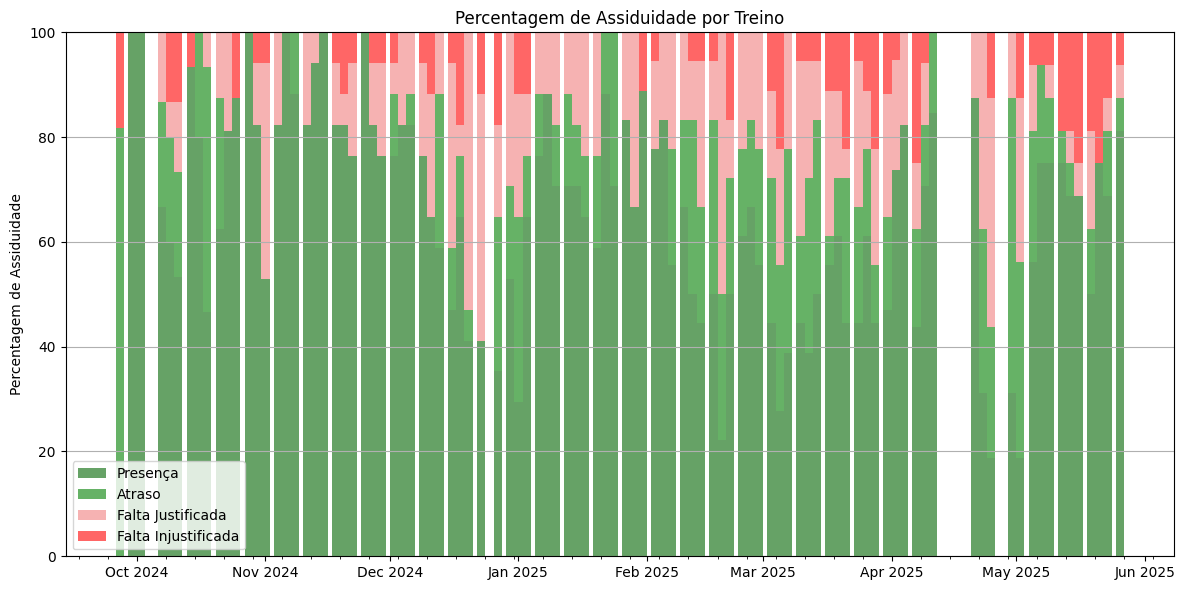

## Assiduidade média mensal:

| Mês     | Assiduidade   |
|:--------|:--------------|
| 2024-09 | 90%           |
| 2024-10 | 88%           |
| 2024-11 | 85%           |
| 2024-12 | 70%           |
| 2025-01 | 83%           |
| 2025-02 | 76%           |
| 2025-03 | 68%           |
| 2025-04 | 75%           |
| 2025-05 | 77%           |

In [ ]:
#@title Análise da Assiduidade das Atletas

import pandas as pd
import matplotlib.pyplot as plt
# Install the required libraries
# !pip install google-auth-oauthlib==1.2.0 google-auth-httplib2==0.1.1 google-api-python-client==2.116.0

# Import necessary libraries
import pandas as pd
from google.oauth2 import service_account
from googleapiclient.discovery import build
from IPython.display import Markdown, display
import re
import google
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# (If you want to use your personal account instead of a service account, use this method. The first time you will be asked to authenticate via Google)
from google.colab import auth
auth.authenticate_user()
creds = google.auth.default()[0]

# Step 2: Get the Google Sheet ID
# Replace with your Google Sheet ID
SPREADSHEET_ID = '1OMSrvA2ZWcH05i2w9FoFw2axjeIf0-3ME5btbbctn0U'

# Step 3: Build Google Sheet Service
service = build('sheets', 'v4', credentials=creds)

# Step 4: Get data from Google Sheet
# Replace 'Sheet1' with the name of the sheet you want to access. You can also specify a range of data
sheet = service.spreadsheets()
result = sheet.values().get(spreadsheetId=SPREADSHEET_ID,range="'Presenças'!A2:DR22").execute()
values = result.get('values')

# Step 5: Create Pandas DataFrame
df = pd.DataFrame(values[1:], columns=values[0])


# Example: Load data from a Google Sheets DataFrame (already cleaned and loaded into `df`)
# Skip columns 3-7 and rows with empty player names
df = df.dropna(subset=['Athlete']).iloc[:, [0, 1] + list(range(7, df.shape[1]))]


# Extract dates from the first row and attendance data from subsequent rows
dates = pd.to_datetime(df.columns[2:].str.strip(), format='%d/%m/%y')  # Use the provided date format
attendance_data = df.iloc[1:, 2:]

attendance_data.columns = dates.tolist()

session_data = []

# Step 1: Calculate percentages for each session
for col in attendance_data.columns:

    total_attendance = attendance_data[col][attendance_data[col] != ''].count()  # Count non-empty cells for the session
    # print(f'{col}: Attendance: {total_attendance}')
    if total_attendance == 0:
        continue;

    counts = attendance_data[col].value_counts()

    p_percent = (counts.get('P', 0) / total_attendance) * 100
    l_percent = (counts.get('L', 0) / total_attendance) * 100
    e_percent = (counts.get('E', 0) / total_attendance) * 100
    u_percent = (counts.get('U', 0) / total_attendance) * 100


    # Append session data to the list
    session_data.append({
        'Date': col,
        'P': p_percent,
        'L': l_percent,
        'E': e_percent,
        'U': u_percent
    })


# Create the session_summary DataFrame from the collected data
session_summary = pd.DataFrame(session_data)

# Step 2: Plot the stacked bar chart
plt.figure(figsize=(12, 6))

# Adjust the 'width' parameter here
bar_width = 2  # Adjust this value to control bar width
alpha = 0.6

# Plot each attendance type as a stacked bar with specified width
plt.bar(session_summary['Date'], session_summary['P'], color='darkgreen', alpha=alpha, label='Presença', width=bar_width)
plt.bar(session_summary['Date'], session_summary['L'], bottom=session_summary['P'], color='green', alpha=alpha, label='Atraso', width=bar_width)
plt.bar(session_summary['Date'], session_summary['E'], bottom=session_summary['P'] + session_summary['L'], alpha=alpha, color='lightcoral', label='Falta Justificada', width=bar_width)
plt.bar(session_summary['Date'], session_summary['U'], bottom=session_summary['P'] + session_summary['L'] + session_summary['E'], color='red', alpha=alpha, label='Falta Injustificada', width=bar_width)

# Customize the chart
plt.title('Percentagem de Assiduidade por Treino')
# plt.xlabel('Dat')
plt.ylabel('Percentagem de Assiduidade')
# plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())
plt.grid(axis='y')
plt.legend()
plt.tight_layout()



# Show the chart
plt.show()


# 1. Convert 'Date' column to datetime objects
session_summary['Date'] = pd.to_datetime(session_summary['Date'])

# 2. Calculate Total Attendance (P + L) for each session
session_summary['Total Attendance'] = session_summary['P'] + session_summary['L']

# 3. Group by month and calculate the average of 'Total Attendance'
monthly_attendance = session_summary.groupby(session_summary['Date'].dt.to_period('M'))['Total Attendance'].mean()

# 4. Reset index to make 'Date' a regular column
monthly_attendance = monthly_attendance.reset_index()

# 5. Rename columns for better readability
monthly_attendance.columns = ['Mês', 'Assiduidade']

# --- Updated part ---
# 6. Round 'Average Attendance' to the nearest integer and add '%'
monthly_attendance['Assiduidade'] = monthly_attendance['Assiduidade'].astype(int).astype(str) + '%'
# --- End of updated part ---

# 7. Display the Markdown table
monthly_attendance_md = monthly_attendance.to_markdown(index=False)
display(Markdown(f"## Assiduidade média mensal:\n\n{monthly_attendance_md}"))

Apesar de não ter grandes referências diretas para comparação, estou satisfeito com estes números. Inicialmente, tinha algum receio de que a falta de resultados desportivos, especialmente nos jogos mais competitivos, pudesse provocar um decréscimo na motivação das atletas e, por consequência, na sua assiduidade aos treinos. É comum que, quando as equipas passam por fases difíceis, o entusiasmo diminua e isso afete a frequência e o compromisso das jogadoras.

No entanto, as percentagens consistentemente acima dos 80% de presença mostram que, apesar das dificuldades naturais do percurso, temos uma equipa motivada, empenhada e com verdadeiro desejo de aprender e evoluir. Isto demonstra que a abordagem adotada — centrada no desenvolvimento individual e na criação de um ambiente positivo — está a resultar não só no aspecto técnico, mas também no envolvimento emocional das atletas com a modalidade e com a equipa.

Esta elevada taxa de assiduidade é, para mim, um indicador claro de que as jogadoras sentem que o seu esforço é valorizado, que fazem parte de um grupo coeso e que encontram no voleibol um espaço de crescimento pessoal e social. É também um sinal positivo para o futuro, pois é a regularidade e a dedicação ao treino que, a longo prazo, constroem bases sólidas para a melhoria técnica e para a consolidação do espírito de equipa.


### Inquéritos de Satisfação

Apesar de incentivar constantemente as atletas a comunicarem de forma aberta e honesta, é fundamental criar espaços estruturados para que isso aconteça.

Assim, mensalmente é lançado um inquérito de satisfação dirigido às atletas, e trimestralmente um inquérito para os pais.

A secção seguinte apresenta os resultados obtidos.

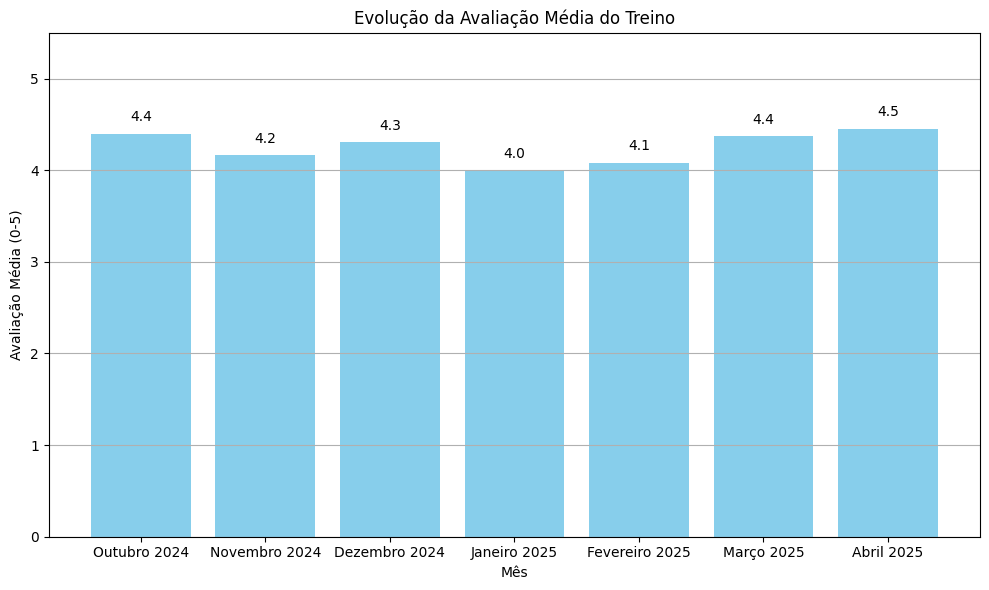

In [ ]:
#@title Evolução do rating atribuído pelas atletas

import pandas as pd
import matplotlib.pyplot as plt
import google
import gspread

from google.colab import auth
from google.auth.transport.requests import Request

# Step 1: Authenticate and authorize access to Google Sheets
auth.authenticate_user()
creds, _ = google.auth.default()

# Refresh the credentials if they are expired
if not creds.valid:
    creds.refresh(Request())

gc = gspread.authorize(creds)

# Step 2: Define the list of (month, Google Sheet ID) pairs
sheets_info = [
    {'month': 'Outubro 2024', 'sheet_id': '15mBtkhxqyfFRMkJfxp8XCqQAylUY3xpckwmCPgBcCQw'},
    {'month': 'Novembro 2024', 'sheet_id': '1cq9gxMnseV1AQGVv6u8-atLJYOlp-YIal3nx_fBxtiU'},
    {'month': 'Dezembro 2024', 'sheet_id': '1cS7Qe_38uxLVz3DDDOLmiRlHoEeEyf5Pq_0nHVsl5Ag'},
    {'month': 'Janeiro 2025', 'sheet_id': '10EtUMrocukt-ebNWtC1APtByCK93uk9E51zRTb9jXzM'},
    {'month': 'Fevereiro 2025', 'sheet_id': '1i3NJ92TrnZCzEm0Wb20rt07FnSZBxlGGk2LyhfCLrJk'},
    {'month': 'Março 2025', 'sheet_id': '1lCSS_wXcss_jBrnMRbgb5AhUsNMPxTYFqEls1DyYxyc'},
    {'month': 'Abril 2025', 'sheet_id': '1Qs_quoIlMyasETrJSzefkbs1G61CelYrzV8BrS5reOE'}
]

# Initialize a list to store the average rating per month
monthly_avg_ratings = []

# Step 3: Iterate over the sheets and calculate the average rating
for info in sheets_info:
    month = info['month']
    sheet_id = info['sheet_id']

    # Open the Google Sheet and load data
    worksheet = gc.open_by_key(sheet_id).sheet1
    data = worksheet.get_all_records()
    df = pd.DataFrame(data)

    # Calculate the average rating for the month
    avg_rating = df.iloc[:, 1].mean()
    monthly_avg_ratings.append({'Month': month, 'Average Rating': avg_rating})

# Step 4: Convert the list to a DataFrame
ratings_df = pd.DataFrame(monthly_avg_ratings)

# Step 5: Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(ratings_df['Month'], ratings_df['Average Rating'], color='skyblue')

# Step 6: Add labels on top of the bars (in Portuguese)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{round(yval, 1)}', ha='center', va='bottom')

plt.title('Evolução da Avaliação Média do Treino')  # Title in Portuguese
plt.xlabel('Mês')  # X-axis label in Portuguese
plt.ylabel('Avaliação Média (0-5)')  # Y-axis label in Portuguese
plt.ylim(0, 5.5)
plt.grid(axis='y')
plt.tight_layout()


Estes inquéritos, que são totalmente anónimos, tinham como objetivo principal recolher um feedback direto e espontâneo das atletas, sem qualquer constrangimento. Eram compostos por apenas duas perguntas simples: uma avaliação numérica dos treinos, numa escala de 0 a 5, e um campo livre onde as atletas podiam expressar livremente sugestões, críticas ou ideias sobre o que gostariam de mudar ou melhorar.

Os resultados obtidos foram, de forma objectiva, bastante positivos, evidenciando um bom nível de satisfação geral com os treinos e a dinâmica da equipa. Para além da avaliação quantitativa, as respostas abertas revelaram pontos de melhoria específicos e valiosos, que foram sendo integrados no planeamento e ajustamentos subsequentes.

Esta prática regular de recolha e análise de feedback permitiu criar um ambiente mais participativo e inclusivo, onde as atletas se sentem ouvidas e valorizadas, contribuindo diretamente para a manutenção de um elevado grau de motivação e empenho.


### Inquéritos aos Pais

Trimestralmente, também são realizados inquéritos aos pais, com o objetivo de compreender o seu grau de satisfação relativamente à oferta do clube, assim como a sua visão sobre o desenvolvimento e bem-estar das atletas. Este inquérito, apesar de ser menos frequente que o direcionado às atletas, é mais abrangente e complexo, pois inclui aspetos que vão para além do desporto, como a integração social, impacto escolar, e o equilíbrio emocional das jovens.

Seguem-se os resultados do último inquérito realizado:

![Inquerito de Pais, 1](https://github.com/pmalves/coach-report-lv1/blob/main/images/inquerito-pais-1.png?raw=true)
![Inquerito de Pais, 2](https://github.com/pmalves/coach-report-lv1/blob/main/images/inquerito-pais-2.png?raw=true)
![Inquerito de Pais, 3](https://github.com/pmalves/coach-report-lv1/blob/main/images/inquerito-pais-3.png?raw=true)
![Inquerito de Pais, 4](https://github.com/pmalves/coach-report-lv1/blob/main/images/inquerito-pais-4.png?raw=true)
![Inquerito de Pais, 5](https://github.com/pmalves/coach-report-lv1/blob/main/images/inquerito-pais-5.png?raw=true)

Mais uma vez, confesso que os resultados superaram as minhas expectativas.

Um dos aspetos que mais me surpreendeu foi o facto de nenhum dos pais ter apontado efeitos negativos no percurso escolar das atletas. Pelo contrário, 75% referiram que a prática do voleibol teve um impacto positivo no desempenho escolar das suas filhas.

Este dado é particularmente relevante, pois antes de iniciar o projeto havia uma preocupação legítima sobre o equilíbrio entre a exigência dos treinos e o sucesso académico, sobretudo tendo em conta a carga horária considerável que o desporto federado implica.

A conclusão que retiro destes resultados é que o voleibol, para além de ser uma atividade física e socialmente enriquecedora, pode também funcionar como um elemento de suporte ao desenvolvimento pessoal e académico das jovens, promovendo a disciplina, a organização do tempo e a capacidade de lidar com desafios, o que se reflete positivamente na escola.

Além disso, o inquérito permitiu identificar áreas onde podemos continuar a melhorar, nomeadamente na comunicação e gestão das expectativas, o que nos ajuda a manter um canal aberto com as famílias e a garantir um ambiente saudável para o crescimento das atletas.


## Mesociclos, Estatísticas e Evolução

### Mesociclos

A abordagem ao trabalho foi organizada por mesociclos de 3 semanas, que focaram no trabalho prioritário que tinha de ser realizado em cada fase. Esta periodização foi escolhida por oferecer um equilíbrio adequado entre a introdução e prática de novos exercícios e a necessidade constante de reforçar e complementar as áreas já trabalhadas.

Nesta fase de desenvolvimento em que as atletas se encontram, optei por concentrar o trabalho em 3 mesociclos principais:

* Serviço - receção  
* KI  
* KII  

Como referido anteriormente, existe uma clara opção pela repetição sistemática para promover a assimilação psico-motora dos diferentes movimentos. Por isso, embora haja uma estrutura base comum que se mantém ao longo de todos os mesociclos, cada um tem uma ênfase maior na especificidade do tema que aborda.

Por exemplo, apesar de todos os treinos incluírem alguma componente de treino de serviço, no mesociclo de _Serviço-Receção_ o foco principal está na receção a serviços mais difíceis e variados, enquanto que no mesociclo KI a atenção é maior no trabalho de _side-out_, com colocação de bolas um pouco mais facilitadas, permitindo às atletas consolidar técnicas específicas dentro do contexto de jogo.

Esta organização permite, assim, um progresso contínuo e estruturado, garantindo que as atletas desenvolvem competências essenciais de forma progressiva e integrada.


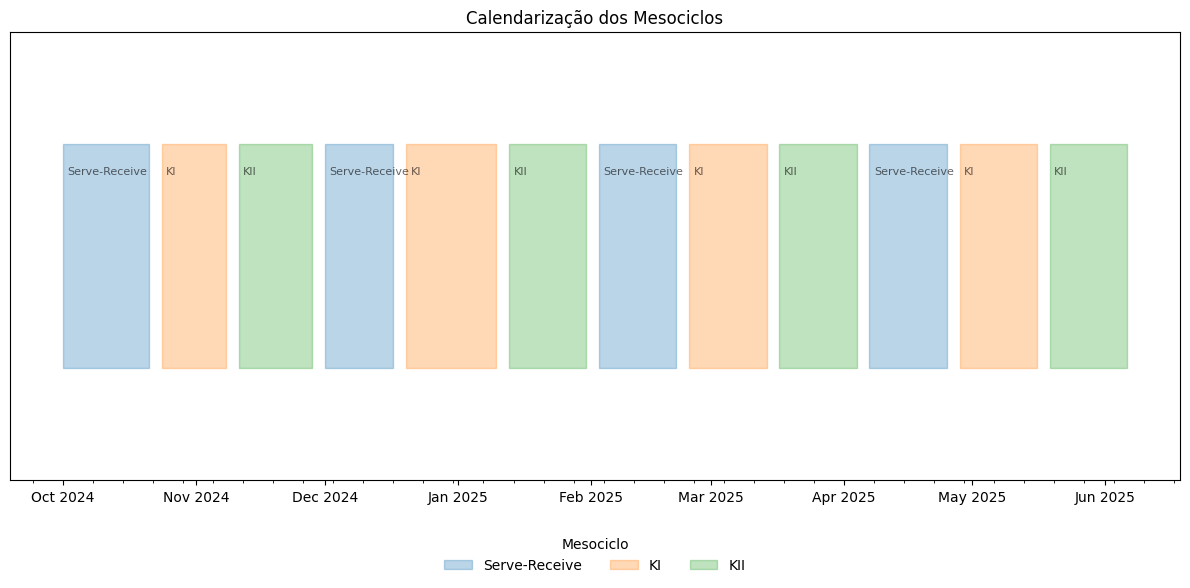

In [ ]:
#@title Calendarização dos Mesociclos

# Import necessary libraries
import pandas as pd
from IPython.display import Markdown, display
import re
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Define the updated mesocycles data
mesocycles = [
    ["Serve-Receive", "2024-10-01", "2024-10-21"],
    ["KI", "2024-10-24", "2024-11-08"],
    ["KII", "2024-11-11", "2024-11-28"],
    ["Serve-Receive", "2024-12-01", "2024-12-17"],
    ["KI", "2024-12-20", "2025-01-10"],
    ["KII", "2025-01-13", "2025-01-31"],
    ["Serve-Receive", "2025-02-03", "2025-02-21"],
    ["KI", "2025-02-24", "2025-03-14"],
    ["KII", "2025-03-17", "2025-04-04"],
    ["Serve-Receive", "2025-04-07", "2025-04-25"],
    ["KI", "2025-04-28", "2025-05-16"],
    ["KII", "2025-05-19", "2025-06-06"]
]

# Convert the mesocycles list into a DataFrame
mesocycle_df = pd.DataFrame(mesocycles, columns=["Mesocycle", "Start Date", "End Date"])
mesocycle_df["Start Date"] = pd.to_datetime(mesocycle_df["Start Date"])
mesocycle_df["End Date"] = pd.to_datetime(mesocycle_df["End Date"])

# Assign a unique category index to each mesocycle for consistent coloring
categories = {name: idx for idx, name in enumerate(mesocycle_df["Mesocycle"].unique())}
mesocycle_df["Category"] = mesocycle_df["Mesocycle"].map(categories)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))  # Increased width for better visualization

# Draw areas for each mesocycle
for idx, row in mesocycle_df.iterrows():
    ax.fill_betweenx(
        y=[-0.5, 0.5],  # Define the vertical position of the area
        x1=row["Start Date"],
        x2=row["End Date"],
        color=f"C{row['Category']}",  # Use consistent color per category
        alpha=0.3,  # Transparency for areas
        label=row["Mesocycle"] if row["Mesocycle"] not in ax.get_legend_handles_labels()[1] else None
    )
    # Add a label for the mesocycle in the top-left of the area with left padding
    ax.text(
        row["Start Date"] + pd.Timedelta(days=1),  # Add a small left padding to the start date
        0.4,                # Slightly below the top edge of the area
        row["Mesocycle"],
        ha='left', va='top', fontsize=8, alpha=0.6  # No background, just plain text
    )

# Formatting the chart
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Show month and year (e.g., Oct 2024)
ax.xaxis.set_major_locator(mdates.MonthLocator())            # Major ticks for months
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())          # Minor ticks for weeks

ax.set_ylim([-1, 1])  # Adjust vertical limits for visibility
ax.set_yticks([])     # Remove y-axis labels for clarity
plt.xticks(rotation=0)  # Keep dates horizontal
plt.title("Calendarização dos Mesociclos")
plt.legend(title="Mesociclo", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)
plt.tight_layout()

# Show the chart
plt.show()


### Estatísticas e Evolução

Vamos agora tentar entender a evolução de métricas específicas do jogo, principalmente em relação aos mesociclos de trabalho efetuado.

Iremos estudar os seguintes elementos, que me parecem os mais relevantes para a fase onde a equipa está:

* Serviço
  * Percentagem de erros de serviço
  * Ases por set
* Receção
  * Erros de receção por set
* Ataque
  * Kills por Set
  * Tentativas de Kill por Set
* Defesa
  * Defesas por set
  * Erros na defesa por set
* Bloco
  * Blocos por set
  * Erros de bloco por set

_Nota: Para permitir uma melhor comparação sobre os números, a maior parte das métricas está normalizada no número de sets. Quando se lê "Kills per Game", o "game" é um set. É a terminologia do software SoloStats, utilizado para a recolha de estatísticas, onde "game" é um set e "match" é um jogo_




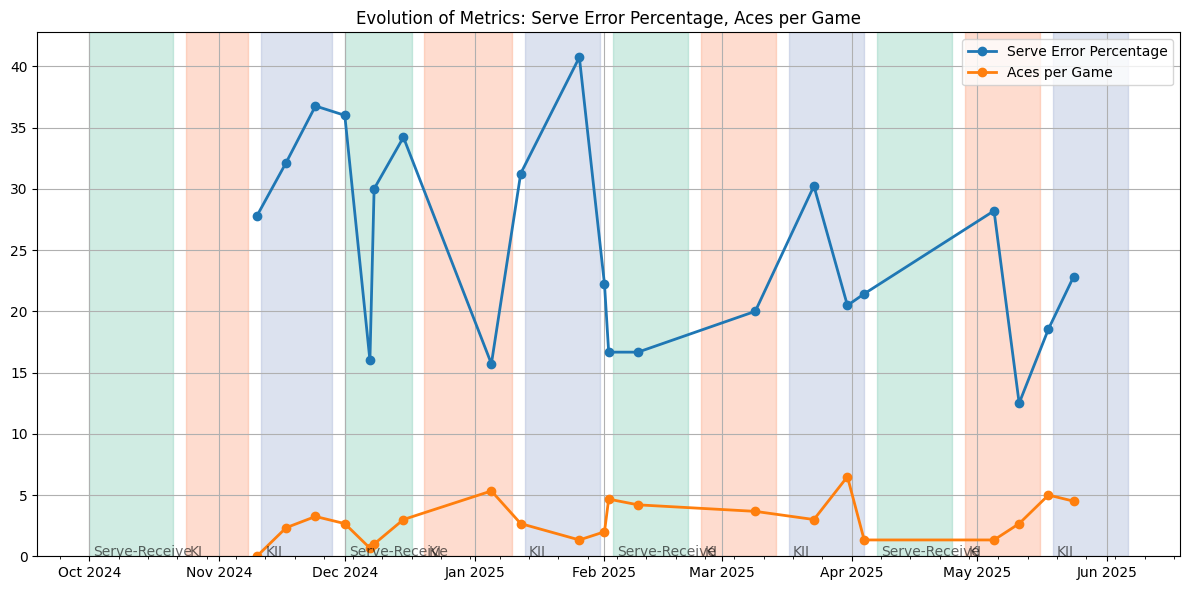

In [ ]:
#@title Serviço


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pdimport
import seaborn as sns

# Mesocycle data is above


# Generate a dynamic color palette for unique phases
unique_phases = mesocycle_df['Mesocycle'].unique()
color_palette = sns.color_palette('Set2', len(unique_phases))  # Choose a palette with enough distinct colors
phase_colors = dict(zip(unique_phases, color_palette))  # Map each phase to a color

# Function to plot metrics with mesocycle areas and labels
def plot_metrics_with_mesocycles(stats_df, metrics, mesocycle_df):
    plt.figure(figsize=(12, 6))

    # Plot mesocycle areas with dynamic colors and labels inside the areas
    for _, row in mesocycle_df.iterrows():
        color = phase_colors[row['Mesocycle']]  # Get the color for the current phase
        plt.axvspan(row['Start Date'], row['End Date'], color=color, alpha=0.3)

        # Add the mesocycle label inside the area (top-left)
        plt.text(row['Start Date'] + pd.Timedelta(days=1), plt.gca().get_ylim()[1] * 0.9,
                 row['Mesocycle'], fontsize=10, color='black', alpha=0.6, ha='left', va='top')

    # Plot each metric as a dot-line chart
    for metric in metrics:
        plt.plot(stats_df['Date'], stats_df[metric], marker='o', linestyle='-', linewidth=2, label=metric)

    # Customize the chart
    plt.title(f"Evolution of Metrics: {', '.join(metrics)}")
    plt.ylim(bottom=0)
    # plt.xlabel('Date')
    # plt.ylabel('Value')
    # plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Show the chart
    plt.show()

# Usage:
metrics = ["Serve Error Percentage","Aces per Game"]
plot_metrics_with_mesocycles(stats_match_df, metrics, mesocycle_df)


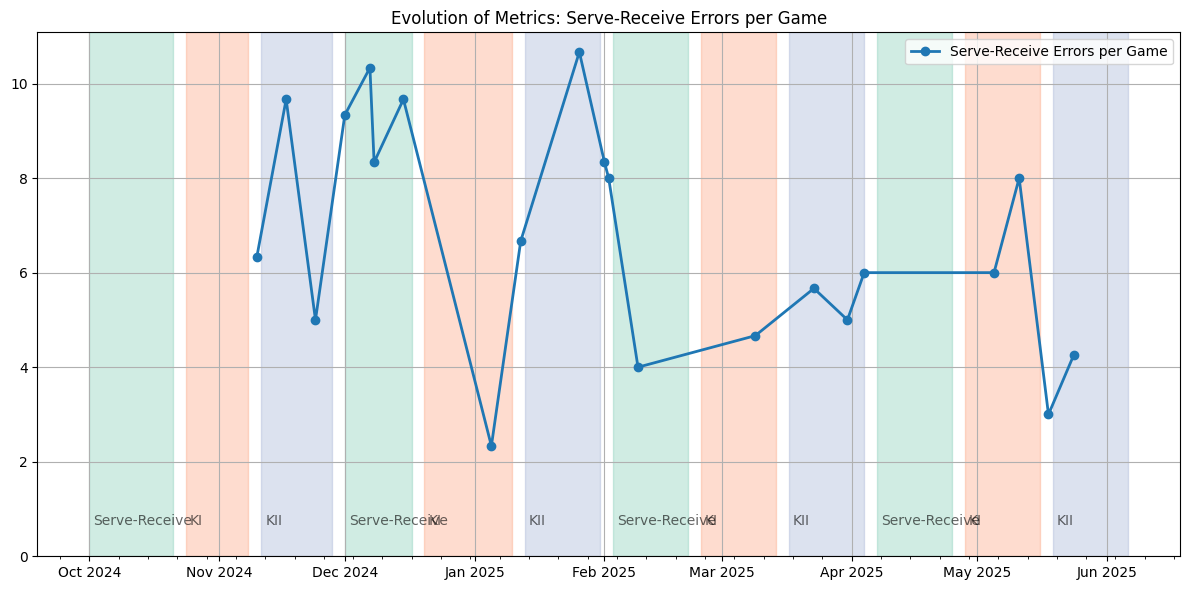

In [ ]:
#@title Receção

metrics = [
    # "Pass Attempts per Game",
    "Serve-Receive Errors per Game"]
plot_metrics_with_mesocycles(stats_match_df, metrics, mesocycle_df)



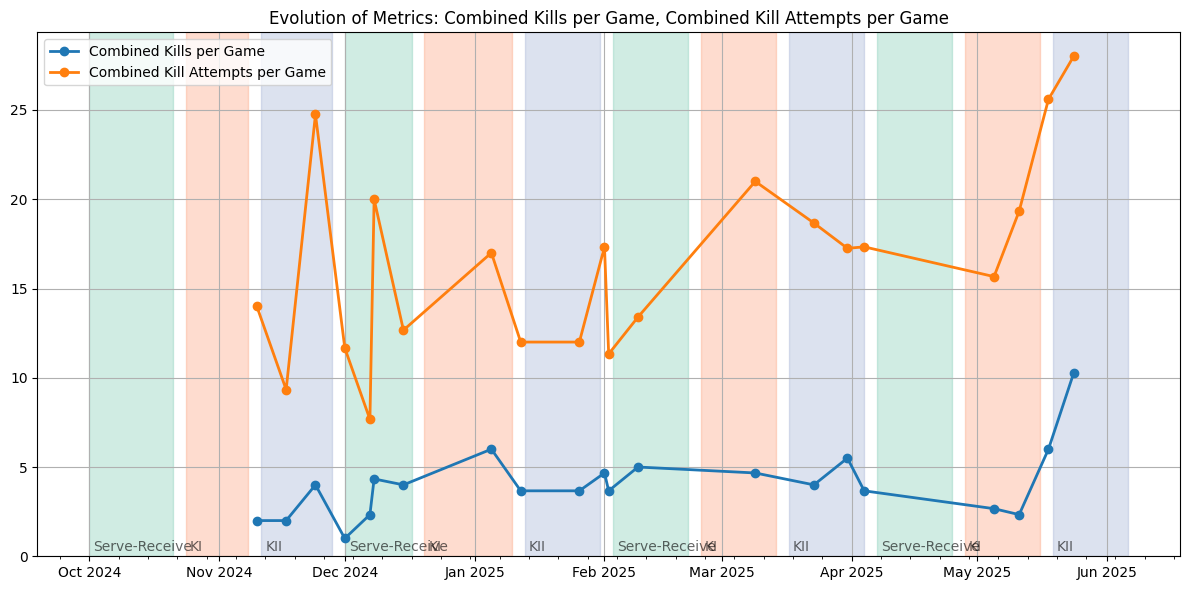

In [ ]:
#@title Ataque

# Usage:
metrics = ["Combined Kills per Game", "Combined Kill Attempts per Game"]
plot_metrics_with_mesocycles(stats_match_df, metrics, mesocycle_df)


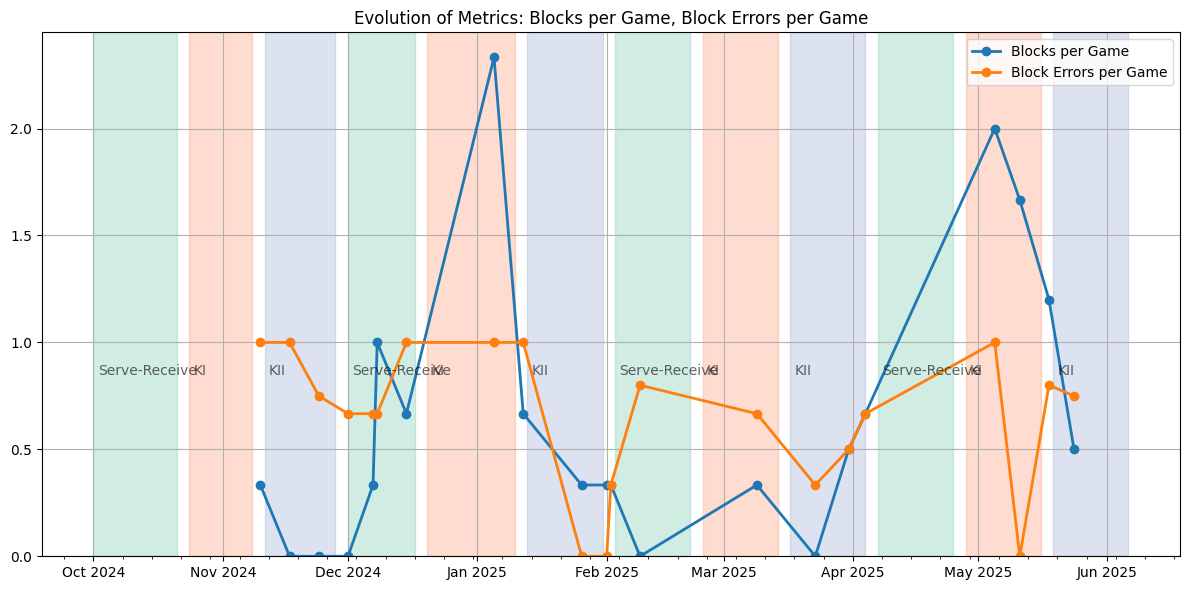

In [ ]:
#@title Bloco

# Usage:
metrics = ["Blocks per Game", "Block Errors per Game"]
plot_metrics_with_mesocycles(stats_match_df, metrics, mesocycle_df)


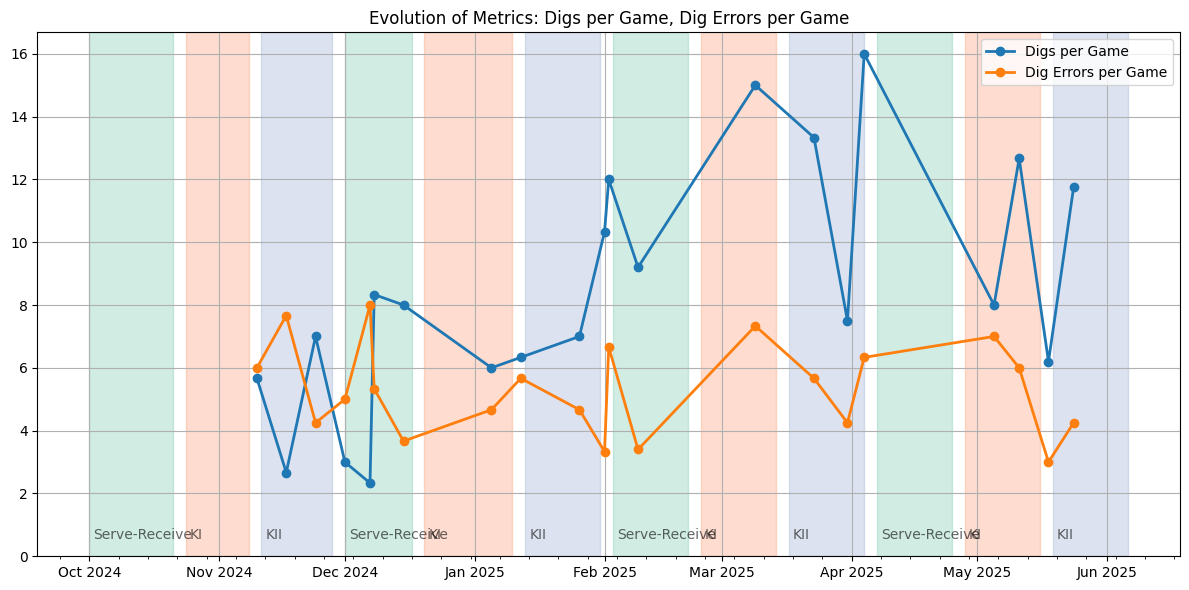

In [ ]:
#@title Defesa

# Usage:
metrics = ["Digs per Game", "Dig Errors per Game"]
plot_metrics_with_mesocycles(stats_match_df, metrics, mesocycle_df)


### Interpretação das Estatísticas

Apesar de estas análises não considerarem o grau de dificuldade dos adversários — um fator que pode influenciar significativamente os resultados — é inegável observar uma trajetória positiva em todos os elementos do jogo ao longo do tempo.

Não consegui identificar uma relação direta e imediata entre o mesociclo de trabalho realizado e os resultados obtidos no período imediatamente seguinte ao seu término. Julgo que isso se deve à grande quantidade de variáveis envolvidas, incluindo fatores externos ao treino, características dos adversários e o próprio processo de assimilação das aprendizagens pelas atletas. Ainda assim, continuo a considerar benéfico manter este método de trabalho, pois proporciona uma estrutura clara e um foco definido para o desenvolvimento técnico e tático.

Independentemente destas limitações, a gravação, o processamento dos vídeos e a recolha sistemática de estatísticas forneceram dados essenciais que permitiram identificar pontos fortes e áreas de melhoria. Estes dados foram fundamentais para orientar a definição do trabalho específico de cada jogadora, tornando o treino mais personalizado e eficaz.


## Conclusão

Esta experiência foi, no mínimo, estranhamente recompensadora. Começou com uma expectativa realista: tentar ganhar um set durante a época toda, dado que estávamos a trabalhar com atletas que, em muitos casos, ainda estavam a tentar perceber que o voleibol não se joga com os pés. Ainda assim, a evolução foi evidente — e não apenas nos toques de bola, mas no empenho, na atitude e na forma como o grupo começou a funcionar como equipa.

Ao longo da época, fui aprendendo (a maior parte das vezes à força) que a parte técnica do treino é, afinal, só uma fatia do bolo. Uma fatia pequena. O resto? Dinâmicas de grupo, gestão de egos, dramas adolescentes, oscilações hormonais e a sempre complexa arte de lidar com pais. Ser treinador é uma espécie de mistura entre técnico de voleibol, psicólogo, animador de colónias de férias e, ocasionalmente, bombeiro.

Do ponto de vista metodológico, optei por estruturar o trabalho em mesociclos de três semanas, equilibrando a necessidade de repetição técnica com a variedade suficiente para não adormecer ninguém — nem a mim. A aposta na repetição com propósito foi clara, tal como a preocupação em garantir que todos os treinos tinham uma lógica e um foco definido. Mesmo quando o foco era não perder o controlo do pavilhão.

Usei estatísticas, vídeos e inquéritos — ferramentas que se revelaram fundamentais para ajustar o rumo e perceber, com mais clareza, o que estava a resultar e o que precisava de ser repensado. Os dados recolhidos, aliados ao feedback anónimo (umas vezes sempre certeiro, outras vezes absolutamente alucinado), ajudaram-me a afinar treinos, a ajustar expectativas e a não perder a cabeça.

Houve ainda espaço para complementar o trabalho de pavilhão com sessões na praia — não como plano B, mas como parte oficial da estratégia (e excelente desculpa para fugir ao cheiro a bolas suadas). Entre areia nos olhos e factor solar a escorrer para a cara, os treinos trouxeram desafio físico extra e um espírito mais leve. E mesmo com pouca experiência no areal, já exibem mais química e talento em duplas do que o Tom Cruise e o Val Kilmer — e sem precisarem de óculos de aviador.

Os inquéritos aos pais mostraram uma surpresa agradável: não só o voleibol não prejudicou o rendimento escolar das atletas, como 75% consideraram que teve um impacto positivo. Confesso que estava preparado para uma chuva de críticas (e talvez algumas notas escolares em queda), mas fiquei feliz por estar enganado.

No fim do dia, o maior sinal de sucesso está mesmo nas pequenas coisas: atletas que querem ficar para o treino extra, que chegam ao pavilhão a sorrir, e pais que dizem que o voleibol se tornou um ponto alto nas rotinas das filhas. Isso vale mais do que qualquer estatística.

Este estágio não foi só sobre ensinar voleibol — foi sobre ensinar responsabilidade, construir confiança, e encontrar formas criativas de manter o caos sob controlo. Com sorte, ensinei alguma coisa útil às atletas, mas posso garantir que aprendi ainda mais com elas. E, vá, também aprendi a sobreviver a grupos de adolescentes em plena puberdade sem perder (totalmente) a sanidade.

# Apêndice

## Arquivo de Planos de Treino

Seguem os planos de treino seguidos ao longo da época, até à data de entrega do relatório

### [2024-10-28] KI, Week 2

* **Objective**: Reinforce side-out fundamentals, improve attack and block techniques, practice real-game scenarios

**Warm-Up (15 minutes)**
* **Tabata**: Squats; Push-Ups; High Knees; Burpees (8 minutes)
* **Dive, Roll, Attack, and Block Fundamentals** (7 minutes)

**Technical Component (30 minutes)**
1. **Up and Down Game** (15 minutes)
2. **5 Wall 1 Net Attack Drill** (15 minutes)
	* Players perform 5 controlled attacks against the wall, then finish with one attack over the net.

**Tactical Component (35 minutes)**
1. **Side-Out Challenge with Swaps** (15 minutes)
	* Groups of 3 (or 4) focus on side-out: one group receives with an assigned setter, while others serve, block, or defend. Rotate groups after 3 successful side-outs.
2. **6x6 Game Simulation** (20 minutes)
	* Full-court 6v6 with a fixed setter, focusing on live game situations and movement within rotations.

**Cool Down (5 minutes)**


### [2024-10-30] KI, Week 2

* **Objective**: Reinforce side-out fundamentals, develop precision in serve and attack movements, practice structured court positioning in game scenarios

**Warm-Up (15 minutes)**
* **Tabata**: Jumping Jacks; Mountain Climbers; Plank; Lunges; Push-ups to failure (8 minutes)
* **Dive, Roll, Attack, and Block Fundamentals** (7 minutes)

**Technical Component (25 minutes)**
1. **Serve and Attack Challenge** (10 minutes) - Players complete 6 successful serves over the net, followed by attack practice against the wall.
2. **Net Attack Drill with Fixed Setters** (8 minutes)
	* Drill with assigned setters for consistent attack approach and timing.
3. **Up and Down Game** (7 minutes)

**Tactical Component (35 minutes)**
1. **4x4 Half Court Games** (25 minutes) - Fixed rotations; side-out worth 2 points to emphasize scoring under side-out pressure.
2. **Best of 3 King of the Court Game** (10 minutes)
	* Full-court play, competitive format with quick rotation.

**Cool Down (5 minutes)**


### [2024-11-08] KI, Week 3

* **Objective**: Refine side-out fundamentals, focus on attack accuracy in key zones, and reinforce blocking and defensive movements.

**Warm-Up (15 minutes)**
* **Tabata**: Bodyweight Squats; Plank Hold; Jumping Jacks; Mountain Climbers
	* Final Set: Push-ups to Failure
* **Relay Challenge: Lateral Shuffle, Roll, and Dive** (7 minutes)
* **Block and Attack Fundamentals** (8 minutes)
	* Focus on body positioning, timing, and quick transitions.

**Technical Component (25 minutes)**
1. **Serve and Attack Challenge** (10 minutes) - Athletes serve to hit 6 successful serves, then practice attack form on the wall.
2. **Net Attack Drill with Fixed Setters** (10 minutes)
	* Extra scoring for attacks to highlighted zones, promoting accuracy.
3. **Up and Down Game** (5 minutes)
	1. Fast-paced, skill-focused individual game.

**Tactical Component (35 minutes)**
1. **4x4 Half-Court Games** (25 minutes) - Side-out worth double points to emphasize strong reception and quick attacks.
2. **Best of 3 King of the Court Game** (10 minutes)
		* Full-court 6v6, focusing on rotations and competitive play.

**Cool-Down (5 minutes)**
	* Controlled passing to wind down with focus on technique.


### [2024-11-11] KII, Week 1

* **Objective**: Enhance ball control, defense-to-offense transitions, and KII strategies.

**Warm-Up (15 minutes)**
* **Tabata**: Mountain Climbers; Jumping Jacks; Squats; High Knees; Push-Ups to failure
* **Relay Challenge: Lateral Shuffle, Roll, and Dive**

**Technical Component (30 minutes)**
1. **Ball Control Drill: Groups of 3** (10 minutes)
	* **Progressions**:
		* Handset only
		* Handset with middle player doing a back handset
		* Pass + Handset
		* Pass + Handset + Attack
2. **Up and Down Game** (10 minutes)
3. **Serve and Attack Challenge** (10 minutes)

**Tactical Component (35 minutes)**
1. **KII Drill**
	* **Setup**: 6 players on **Team A** (main side) in fixed defensive and blocking positions; the remaining players on **Team B** (opposite side).
	* **Instructions**:
		* **Team A** serves, sets up defense and blocks.
		* **Team B** organizes with 3 players receiving, 1 passing, and 3 attackers positioned in lanes.
		* **Sequence**: Team B receives and attacks. Coach follows with 3 free balls to Team B.
		* **Rotation**: After each series, Team A rotates positions, and Team B swaps attackers.

**Cool Down (5 minutes)**


### [2024-11-13] KII, Week 1

** [2024-11-1****## 3****## ] KII, Week 1**
* **Objective**: Develop fundamentals for KII, focusing on attack and defense positioning in live scenarios

**Warm-Up (15 minutes)**
* **Tabata**: Mountain Climbers, Bodyweight Squats, High Knees, Burpees + Push-Ups to failure (8 minutes)
* **Attack and Block Fundamentals** (7 minutes)

**Technical Component (30 minutes)**
1. **1 vs 1 Wall-Attack Challenge** (8 minutes)
	* Players alternate attacking the wall in a competitive 1 vs 1 format, focusing on ball control, precision, and attacking under pressure.
2. **Net Attack Drill** (8 minutes)
	* Players focus on attacking specific zones over the net, with additional points for targeted attacks.
3. **Up and Down Game: Individual** (7 minutes)
	* Players perform individual ball control and movement drills across the net.
4. **Serve Drill** (7 minutes)
	* Focused repetitions for accuracy and consistency, aiming for specific zones on the opposite side.

**Tactical Component (35 minutes)**
1. **KII Drill** (35 minutes)
	* **Setup**: Team A (6 players) focuses on defensive positioning and blocking, with fixed positions.
	* **Team B**: Three players receive, one player sets, and three attack from different lanes.
	* **Drill**: Team A serves, assumes defensive positioning, and prepares for attack from Team B. Coach sends 3 free balls after each serve, rotating Team A and swapping attackers on Team B.

**Cool-Down (5 minutes)**

### [2024-11-15] KII Mesocycle, Week 1

** [2024-11-15] KII Mesocycle, Week 1**
* **Objective**: Build foundational skills for KII focus, emphasizing defensive positioning, ball control, and serve consistency.

**Warm-Up (15 minutes)**
* **Tabata**: Push-Ups; Squats; Jumping Jacks; High Knees; (followed by one set of push-ups to failure)

* **D****ive and R****oll ****Relay**

* **Attack and Block Fundamentals** (7 minutes)

**Technical Component (30 minutes)**
1. **Net Attack Drill with Fixed Setters** (10 minutes)
	* Practice targeted attacks with fixed setters, extra points for highlighted attack zones.
2. **Serve Drill** (10 minutes)
	* Players focus on completing 6 successful serves over the net.
3. **Up and Down Game** (10 minutes)
	* Quick, competitive rounds to develop ball control, agility, and reaction time.

**Tactical Component (35 minutes)**
1. **4x4 Half-Court Games** (25 minutes)
	* Rotational play focused on side-out strategy, with 2 points awarded for successful side-outs.
2. **Best of 3 King of the Court Game** (10 minutes)
	* Competitive, full-court play emphasizing rapid rotation, defense, and transition.

	* Coach puts 3 balls over the net

**Cool Down (5 minutes)**
	* Light passing drill to cool down and reinforce controlled movement.

### [2024-11-18] KII, Week 2

* **Objective**: Improve defensive and blocking fundamentals, enhance attack consistency, and practice game-like KII scenarios.

**Warm-Up (15 minutes)**
* **Tabata**: New set of exercises (e.g., Jumping Jacks, Push-Ups, High Knees, Burpees) + one set of Push-Ups to failure (8 minutes).
* **Block, Attack, Dive, and Roll Circuit** (7 minutes).

**Technical Component (35 minutes)**
1. **Wall Attack Drills** (10 minutes)
	* Focus on body alignment, ball placement, and backsetting movements.
2. **Net Attack Drill with Fixed Setters** (12 minutes)
	* Execute attacks with bonus points for highlighted zones.
3. **Serve Drill with Reception and Attack** (13 minutes)
	* Players serve, receive, and transition into attacking plays.

**Tactical Component (35 minutes)**
1. **Rotation**** Expl****anat****ion: ****One shoe**** off****
2. **KII Block & Defense Drill with Attack Lines** (25 minutes)
	* Team A (6 players) focuses on blocking and defensive positioning, while Team B practices side-out plays with 3 attack lines and rotations.
3. **Best of 5 King of the Court Game** (10 minutes)
	* Full-court 6v6 matches, mini-games played until 5 points. Winning teams rotate.

**Cool Down (5 minutes)**


### [2024-11-20] KII, Week 2

** [2024-11-20] KII, Week 2**
* **Objective**: Develop individual attack consistency, refine blocking and defensive positioning, and improve tactical execution in KII situations.

**Warm-Up (15 minutes)**
* **Tabata**: New set of exercises (e.g., Air Squats, Abs, Mountain Climbers, Burpees) + one set of Push-Ups to failure (8 minutes).
* **Block, Attack, Dive, and Roll Circuit** (7 minutes).

**Technical Component (35 minutes)**

1. **Up and Down Game: Individual** (10 minutes)
	* Players work on ball control and dynamic transitions.
2. **Net Attack Drill with Fixed Setters** (13 minutes)
	* Attacks executed with bonus points for highlighted zones.

**Tactical Component (35 minutes)**
1. **KII Block & Defense Drill with Attack Lines** (25 minutes)
	* Team A focuses on defense and blocking, while Team B practices attacking with rotations.
2. **Game S****ituation**** - ****5****x1** (10 minutes)

	* Others will do the wall-attack drill

3. **Wall Attack Drills** (12 minutes)
	* Focus on body alignment, ball placement, and backsetting movements.

**Cool Down (5 minutes)**


### [2024-11-22] KII, Week 2

* **Objective**: Enhance individual ball control, improve serve-receive dynamics, refine attack placement, and strengthen KII defensive coordination.

**Warm-Up (15 minutes)**
* **Tabata**: New set of exercises (e.g., Jumping Jacks, Lunges, High Knees, Burpees) + one set of Push-Ups to failure (8 minutes).
* **Block, Attack, Dive, and Roll Circuit** (7 minutes).

**Technical Component (35 minutes)**
1. **Up and Down Game: Individual** (12 minutes)
	* Outside the 3 meter line
2. **Serve Drill with Reception and Attack** (12 minutes)
	* Emphasize accurate serves, consistent reception, and a coordinated attack.
3. **Net Attack Drill with Fixed Setters** (11 minutes)
	* Players attack with focus on targeted zones, guided by assigned setters.

**Tactical Component (35 minutes)**
1. **KII Block and Defense Drill with Free Ball and 5 Attack Lines** (25 minutes)
	* Team A works on blocking and defensive positioning; Team B rotates through 5 attacking lanes, with coach initiating free balls.
2. **Best of 5 King of the Court Game** (10 minutes)
	* Full-court 6v6 mini-games played to 5 points, focusing on rotations and tactical awareness.

**Cool Down (5 minutes)**


### [2024-11-25] KII, Week 3

* **Objective**: Focus on serve accuracy, individual ball control, KII defense dynamics, and game application against younger opponents.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes): Jumping Jacks, Bodyweight Squats, High Knees, Burpees.
	* End with one set of **Push-Ups to Failure**.
* **Block, Attack, Dive, and Roll Circuit** (7 minutes).

**Technical Component (30 minutes)**
1. **Service Distance Challenge** (15 minutes)
	* In pairs, one player serves to the wall, and the other catches it before it hits the ground. Increase the serving distance upon success.
2. **Net Attack Drill with Fixed Setters** (11 minutes)
	* Players attack with focus on targeted zones, guided by assigned setters.
3. **Up and Down Game: Individual** (15 minutes)
	* Emphasis on quick reactions and ball control.

**Tactical Component (40 minutes)**
1. **KI 5-1 with Free Ball + KII Block and Defense** (20 minutes)
	* Team A practices serve-receive (KI) in 5-1 rotations. Team B executes KII defense and blocking strategies, transitioning from coach-initiated free balls.
2. **Game Against Sub-16** (15 minutes)
	* Full-court 6v6 game focusing on implementing tactical objectives in real-game situations.
3. **Pairs' Wall Technical Challenge** (5 minutes)
	* Players in pairs perform fast-paced wall drills to improve reaction time and precision under pressure.

**Cool Down (5 minutes)**


### [2024-11-27] KII, Week 3

** [2024-11-27] KII, Week 3**
* **Objective**: Develop individual and team ball control, focus on serve-receive dynamics, and enhance defensive and blocking strategies in game situations.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes):
	* Side Lunges, Mountain Climbers, Skater Jumps, Burpees.
	* End with one set of **Push-Ups to Failure**.
* **Block, Attack, Dive, and Roll Circuit** (7 minutes).

**Technical Component (35 minutes)**
1. **Up and Down Game** (10 minutes)
	* Emphasis on consistent ball control and adaptability.
2. **Serve Drill with Reception and Attack** (10 minutes)
	* Players practice serving accuracy, reception quality, and effective attack transitions.
3. **Net Attack Drill with and without Fixed Setters** (15 minutes)
	* Players alternate between attacking with fixed setter assignments and adapting to dynamic scenarios.

**Tactical Component (35 minutes)**
1. **KII Block and Defense Drill with Free Ball and 5 Attack Lines** (20 minutes)
	* Focus on KII defensive formations, precision blocking, and quick recovery.
2. **Best of 5 King of the Court Game** (15 minutes)
	* Full-court competition emphasizing side-out efficiency and tactical execution.

**Cool Down (5 minutes)**


### [2024-11-29] KII, Week 3

** [2024-11-29] KII, Week 3**
* **Objective**: Enhance technical precision in serves and attacks, improve back-line ball control, and strengthen KII defensive strategies.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes):
	* Jumping Jacks, Forward Lunges, Plank to Shoulder Taps, High Knees.
	* End with one set of **Push-Ups to Failure**.
* **Block, Attack, Dive, and Roll Circuit** (7 minutes).

**Technical Component (35 minutes)**
1. **Pairs' Wall Technical Challenge** (10 minutes)
	* Players work in pairs to improve ball control and placement against the wall.
2. **Serve Accuracy Challenge** (10 minutes)
	* Emphasis on targeted serves with point-based scoring for accuracy.
3. **Net Attack Drill** (15 minutes)
	* Focus on attacking techniques with setter assignments and variable defensive setups.

**Tactical Component (35 minutes)**
1. **4x4 King of the Court Back Line Attack** (20 minutes)
	* Rotational mini-games focusing on sustained ball control and back-line attacks.
2. **KII Block and Defense Drill with Free Ball and 3 Attack Lines** (15 minutes)
	* Begins with serve-reception, transitions to 6 consecutive attacks with defensive and blocking adjustments.

**Cool Down (5 minutes)**


### [2024-12-02] Serve Receive, Week 1

* **Objective**: Develop and refine serve-receive mechanics, improve consistency under pressure, and integrate technical progression into tactical scenarios.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes):
	* Jumping Jacks, Forward Lunges, Plank Walkouts, Squat Jumps.
	* End with one set of **Push-Ups to Failure**.
* **Block, Attack, Dive, and Roll Circuit** (7 minutes).

**Technical Component (40 minutes)**
1. **Pairs' Wall Technical Challenge** (15 minutes)
	* Progression: Basics → Serve into wall → Receive → Serve-Receive-Set-Attack complex.
2. **Net Attack Drill** (10 minutes)
	* Emphasis on attacking technique and situational precision.
3. **Receive Progression Challenge** (15 minutes)
	* **Level 1**: Receive a free ball and deliver a flawless pass to the setter.
	* **Level 2**: Receive a set from within the field and execute a flawless pass.
	* **Level 3**: Receive a set from the back of the court and deliver a flawless pass.
	* Players must serve successfully before receiving and advance only after 5 flawless passes.

**Tactical Component (35 minutes)**
1. **Team Serve-Receive Drill with Coach Serving** (35 minutes)
	* Players rotate after 5 successful receives.
	* Teams consist of players who reached advanced levels in the Receive Progression Challenge.
	* Players who did not advance to the highest level will continue working on their progression.

**Cool Down (5 minutes)**


### [2024-12-04] Serve Receive, Week 1

* **Objective**: Improve serve-receive fundamentals, refine team coordination during serve-receive scenarios.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes): Squats; Jumping Jacks; Plank Holds; High Knees; **+ Push-ups to failure**.
* **Dive, Roll, Attack, and Block Fundamentals** (7 minutes).

**Technical Component (40 minutes)**
1. **Serve Receive Up and Down Game: One Receiver** (15 minutes)
	* **Setup**:
		* Divide the court into 3 smaller fields. Each field has one server, one setter, and one receiver.
		* Additional players form lines behind the server.
	* **Scoring Rules**:
		* Successful pass to setter = **2 points** if the setter hand-sets.
		* Less successful pass = **1 point** if the setter bump-sets.
		* A successful attack after a pass = **+1 point**.
		* If the receiver scores, they stay and continue receiving.
	* **Rotation**:
		* If the receiver fails to score, they rotate: server becomes the setter, setter becomes the receiver, and the server goes to the back of the line.
	* **Progression**:
		* Start all serves as handsets from the 4-5m line.
		* Gradually increase serve difficulty:
			* Field 2 serves from the 6m line.
			* Field 3 serves from the 9m line.
		* After time is up, the top 2 scorers in each field move up to a higher field, while the bottom 2 move down.
2. **Serve Receive Up and Down Game: Two Receivers** (15 minutes)
	* **Setup**:
		* Larger courts with 2 receivers and one setter. Same player rotations and lines as the one-receiver version.
	* **Scoring Rules**:
		* Same as the one-receiver variant, with both receivers sharing points for successful passes and attacks.
	* **Rotation**:
		* After each rally, players rotate positions: server → setter → receiver. Rotate based on scoring or time.
	* **Progression**:
		* Fields progress as in the one-receiver game, with serving difficulty increasing from 4-5m to 6m to 9m lines.
3. **Net Attack Drill with Fixed Setters** (10 minutes)
	* Focus on effective attacks from accurate setups after receiving.

**Tactical Component (35 minutes)**
1. **Team Serve-Receive Game**
	* Two teams of 6 players take turns serving and receiving.
	* Full rotations: Team A serves to Team B, then roles reverse. Coach included in serving rotation.
	* Scoring:
		* 2 points for a set completed by the setter.
		* 1 point for a set by another player.
		* Bonus: 1 point for a successful attack.
	* If more than 6 players per team, substitutions occur when a player misses a receive.

**Cool-Down (5 minutes)**


### [2024-12-06] Serve Receive, Week 1

* **Objective**: Build serve-receive fundamentals, improve individual and team performance under real-game scenarios.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes):
	* Air Squats; Lateral Jumps; Russian Twists; Mountain Climbers; **+ Push-ups to failure**.
* **Dive, Roll, Attack, and Block Fundamentals** (7 minutes).

**Technical Component (40 minutes)**
1. **Pairs' Wall Technical Challenge** (10 minutes)
	* **Focus**: Serving, receiving, setting, and attacking combinations against the wall.
	* **Progression**: Start with basic handset passes, then transition to serve, receive, set, and attack sequences.
2. **Serve Receive Up and Down Game: One Receiver** (15 minutes)
	* **Setup**: Court divided into 3 smaller fields with one server, one setter, and one receiver. Remaining players line up behind the server.
	* **Scoring Rules**:
		* Successful pass to setter = **2 points** (handset) or **1 point** (bump set).
		* Successful attack = **+1 point**.
	* **Rotation**: Rotate positions (server → setter → receiver) based on scoring or missed attempts.
	* **Progression**: Serve starts from 4-5m line and advances to 6m and 9m lines as difficulty increases.
3. **Serve Receive Up and Down Game: Two Receivers** (15 minutes)
	* **Setup**: Larger fields with two receivers and one setter per group. Same rotation and scoring rules as the one-receiver game.
	* **Progression**: Serve difficulty progresses as in the one-receiver variant.

**Tactical Component (30 minutes)**
1. **6x6 Game Simulation with Free Balls from Coach**
	* **Setup**: Standard full-court 6v6 game format.
	* **Focus**:
		* Emphasis on serve-receive coordination and transitioning into offensive plays.
		* Coach introduces free balls to simulate real-game scenarios.
	* **Scoring**: Regular volleyball scoring.

Teams:

|  11<br/> | Sofia<br/> | Central<br/> |
|-----|-----|-----|
|  3<br/> | Inês<br/> | Passadora<br/> |
|  10<br/> | Leonor Ferreira<br/> | Entrada<br/> |
|  25<br/> | Emilia<br/> | Central<br/> |
|  24<br/> | Alice Alves<br/> | Saída<br/> |
|  17<br/> | Salomé<br/> | Entrada<br/> |
|   |  |  |
|  19<br/> | Lia<br/> | Central<br/> |
|  31<br/> | Mafalda<br/> | Saída<br/> |
|  13<br/> | Matilde<br/> | Entrada<br/> |
|  18<br/> | Maria N<br/> | Central<br/> |
|  14<br/> | Carolina Antunes<br/> | Passadora<br/> |
|  20<br/> | Beatriz<br/> | Entrada<br/> |

**Cool-Down (5 minutes)**


### [2024-12-09] Serve Receive, Week 2

** [2024-12-09] Serve Receive, Week 2**
* **Objective**: Focus on improving serve-receive fundamentals and serve precision.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes):
	* Jumping Jacks; Plank Shoulder Taps; Step-Back Lunges; High Knees; **+ Push-ups to failure**.
* **Dive, Roll, Attack, and Block Fundamentals** (7 minutes).

**Technical Component (60 minutes)**
1. **Pairs' Wall Technical Challenge** (10 minutes)
	* **Focus**: Develop ball control and execution of volleyball fundamentals.
	* **Progression**: Drill evolves from basic passing to serve, receive, set, and attack against the wall.
2. **5-Minute Serve Score Challenge** (5 minutes)
	* **Setup**: Players serve continuously for 5 minutes.
	* **Scoring Rules**:
		* **1 point**: Serve lands in smaller yellow field.
		* **2 points**: Serve lands closer to the lines.
3. **Net Attack Drill** (10 minutes)
	* **Focus**: Controlled attacking with emphasis on highlighted attack zones.
	* **Setup**: Sequential attacks with fixed setters, aiming for precision.
4. **Serve Receive Up and Down Game: One Receiver** (15 minutes)
	* **Setup**: Court divided into 3 smaller fields with one server, one setter, and one receiver. Remaining players line up behind the server.
	* **Scoring Rules**:
		* Successful pass to setter = **2 points** (handset) or **1 point** (bump set).
		* Successful attack = **+1 point**.
	* **Rotation**: Rotate positions (server → setter → receiver) based on scoring or missed attempts.
	* **Progression**: Serve starts from 4-5m line and advances to 6m and 9m lines as difficulty increases.
5. **Serve Receive Up and Down Game: Two Receivers** (20 minutes)
	* **Setup**: Larger fields with two receivers and one setter per group.
	* **Scoring Rules**:
		* Same as the one-receiver variant, but adjusted for two receivers working together.
	* **Rotation**: Rotate through server → setter → receivers.
	* **Progression**: Serve distance increases gradually to challenge players.

**Cool-Down (5 minutes)**


### [2024-12-11] Serve Receive, Week 2

** [2024-12-11] Serve Receive, Week 2**##

* **Objective**: Reinforce serve-receive mechanics, serving precision, and team attacking with full-court scenarios.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes):
	* Side Lunges; Plank to Shoulder Taps; Jump Squats; Fast Feet; **+ Push-ups to failure**.
* **Dive, Roll, Attack, and Block Fundamentals** (7 minutes).

**Technical Component (60 minutes)**
1. **Net Attack Drill** (10 minutes)
	* **Focus**: Controlled attacking with and without fixed setters, emphasizing key attack zones.
2. **5-Minute Serve Score Challenge** (5 minutes)
	* **Setup**: Players serve continuously for 5 minutes.
	* **Scoring Rules**:
		* **1 point**: Serve lands in the smaller yellow field.
		* **2 points**: Serve lands closer to the lines.
3. **Serve Receive Up and Down Game: One Receiver** (15 minutes)
	* **Setup**: Divide the court into 3 smaller fields with one server, one setter, and one receiver per group. Rotate positions based on scoring or missed attempts.
	* **Scoring Rules**:
		* **2 points**: Handset **from** setter to attack zone after a precise receive.
		* **1 point**: Bump set **from** setter to attack zone after a less precise receive.
		* **+1 point**: Successful attack.
		* **+2 points**: Block.
	* **Progression**: Serve distances increase over time (4-5m, 6m, and 9m).
4. **Serve Receive Up and Down Game: Two Receivers** (20 minutes)
	* **Setup**: Larger fields with two receivers and one setter per group. Focus on collaboration and accuracy.
	* **Scoring Rules**:
		* **2 points**: Handset **from** setter to attack zone after a precise receive.
		* **1 point**: Bump set **from** setter to attack zone after a less precise receive.
		* **+1 point**: Successful attack.
		* **+2 points**: Block.
	* **Progression**: Similar serve distance adjustments.

**Tactical Component (35 minutes)**
1. **4x4 King of the Court Attack Game** (35 minutes)
	* **Setup**:
		* Teams of 4; divide into 3-4 groups.
		* Play begins with a serve to the opposing side. Attack can come from anywhere but must land **outside the 3-meter line**.
		* Use standard "King of the Court" rotation rules: losing team rotates out, new challengers take their place.
2. **Scoring Rules**: - **+1 point**: Jump spike lands successfully outside the 3-meter line. - **+1 point**: Winning team transitions to the **King Field** with a proper serve.

**Cool-Down (5 minutes)**


### [2024-12-13] Serve Receive, Week 2

** [2024-12-13] Serve Receive, Week 2**
* **Objective**: Enhance serve-receive precision, serve scoring, and teamwork in live-game scenarios.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes):
	* Side-to-Side Hops; Plank Walkouts; High Knees; Jumping Lunges; **+ Push-ups to failure**.
* **Dive, Roll, Attack, and Block Fundamentals** (7 minutes).

**Technical Component (55 minutes)**
1. **Pairs' Wall Technical Challenge** (10 minutes)
	* **Focus**: Serve and receive fundamentals, progressing to serve-receive-set-attack sequences against the wall.
2. **5-Minute Serve Score Challenge** (5 minutes)
	* **Setup**: Continuous serving for 5 minutes.
	* **Scoring Rules**:
		* **1 point**: Serve lands in the smaller yellow field.
		* **2 points**: Serve lands closer to the lines.
3. **Net Attack Drill** (10 minutes)
	* **Focus**: Targeted attack zones with both fixed and non-fixed setters.
4. **Serve Receive Up and Down Game: One Receiver** (30 minutes)
	* **Setup**: Divide court into 3 smaller fields; one server, one setter, one receiver per group. Rotate positions based on scoring or missed attempts.
	* **Scoring Rules**:
		* **2 points**: Handset **from** setter to attack zone after precise receive.
		* **1 point**: Bump set **from** setter to attack zone after less precise receive.
		* **+1 point**: Successful attack.
		* **+2 points**: Block.
	* **Progression**: Serve distances increase (4-5m, 6m, 9m).

**Tactical Component (35 minutes)**
1. **Game Team KI Drill with Coach Serving** (35 minutes)
	* **Setup**:
		* Divide players into Game Team (Team A) and Substitute Team (Team B).
		* If more than 6 players on the Substitute Team, excess players serve.
2. **Rotation**: - Team A (receivers) stays on one side, Team B serves 6 consecutive balls (rotating servers if needed). - After the 6 serves, Team A rotates positions, Team B switches roles, and substitute players move between serving and playing. - After a full rotation of Team A, teams swap roles entirely.
	* **Objective**: Focus on quality reception and transitions into attack under match-like pressure.

**Cool-Down (5 minutes)**


### [2024-12-16] Serve Receive, Week 3

* **Objective**: Refine serve-receive accuracy and transitions into attack, with emphasis on gameplay dynamics and teamwork.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes):
	* Jumping Jacks; Step-Back Lunges; Mountain Climbers; Squat Jumps; **+ Push-ups to failure**.
* **Dive, Roll, Attack, and Block Fundamentals** (7 minutes).

**Technical Component (55 minutes)**
1. **Pairs' Wall Technical Challenge with Self Receive** (15 minutes)
	* **Setup**: Pairs working against the wall.
	* **Progression**: All drills include a self-receive phase (e.g., player tosses or serves to self before executing the drill sequence).
	* **Focus**: Controlled execution of serve-receive-set-attack cycles.
2. **5-Minute Serve Score Challenge** (5 minutes)
	* **Setup**: Continuous serving for 5 minutes.
	* **Scoring Rules**:
		* **1 point**: Serve lands in the smaller yellow field.
		* **2 points**: Serve lands closer to the lines.
3. **Net Attack Drill** (10 minutes)
	* **Focus**: Targeted attack zones with both fixed and non-fixed setters.
4. **Serve Receive Up and Down Game: Two Receivers** (25 minutes)
	* **Setup**:
		* Divide court into 3 larger fields.
		* 2 receivers, 1 setter, 1 server per group.
		* Challengers rotate positions based on performance.
5. **Scoring Rules**: - **2 points**: Handset **from** setter to attack zone after precise receive. - **1 point**: Bump set **from** setter to attack zone after less precise receive. - **+1 point**: Successful attack. - **+2 points**: Block. - **+1 point**: If challengers score after extended play.
	* **Progression**: Serve distances increase (4-5m, 6m, 9m).

**Tactical Component (35 minutes)**
1. **4x4 King of the Court Game** (35 minutes)
	* **Setup**:
		* Court divided into 3 zones: Challenger Field, Transition Field, King Field.
		* Teams rotate through fields based on scoring performance.
2. **Scoring Rules**: - Points only count from successful jump spikes. - **+1 point**: Transition to King Field with a proper serve.
	* **Focus**: Attack versatility and court positioning.

**Cool-Down (5 minutes)**


### [2024-12-18] Serve Receive, Week 3

** [2024-12-18] Serve Receive, Week 3**
* **Objective**: Reinforce serve-receive accuracy with extended play rules, improve attack dynamics, and enhance teamwork in competitive gameplay.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes):
	* High Knees; Forward Lunges; Plank Shoulder Taps; Broad Jumps; **+ Push-ups to failure**.
* **Dive, Roll, Attack, and Block Fundamentals** (7 minutes).

**Technical Component (65 minutes)**
1. **Pairs' Wall Technical Challenge with Self Receive** (15 minutes)
	* **Setup**: Pairs work against the wall.
	* **Progression**: Every drill includes a self-receive phase, transitioning to serve-receive-set-attack sequences.
	* **Focus**: Controlled body movements, precision, and fluid execution.
2. **5-Minute Serve Score Challenge** (5 minutes)
	* **Setup**: Continuous serving for 5 minutes.
	* **Scoring Rules**:
		* **1 point**: Serve lands in smaller yellow field.
		* **2 points**: Serve lands closer to the lines.
3. **Net Attack Drill** (10 minutes)
	* **Focus**: Refining targeted attacks with both fixed and rotating setters.
4. **Serve Receive Up and Down Game: One Receiver** (15 minutes)
	* **Setup**:
		* Court divided into 3 smaller fields.
		* Groups of 1 receiver, 1 setter, and 1 server per field.
		* Challengers rotate based on performance.
5. **Scoring Rules**: - **2 points**: Handset **from** setter to attack zone after precise receive. - **1 point**: Bump set **from** setter to attack zone after less precise receive. - **+1 point**: Successful attack. - **+2 points**: Block.
	* **Progression**: Serve distances increase by group (4-5m, 6m, 9m).
6. **Serve Receive Up and Down Game: Two Receivers** (20 minutes)
	* **Setup**:
		* Court divided into 3 larger fields.
		* Groups of 2 receivers, 1 setter, and 1 server per field.
		* Challengers rotate based on performance.
7. **Scoring Rules**: - **2 points**: Handset **from** setter to attack zone after precise receive. - **1 point**: Bump set **from** setter to attack zone after less precise receive. - **+1 point**: Successful attack. - **+2 points**: Block. - **+1 point**: If challengers score after extended play.
	* **Progression**: Serve distances increase by group (4-5m, 6m, 9m).

**Tactical Component (35 minutes)**
1. **4x4 King of the Court Attack Game** (35 minutes)
	* **Setup**:
		* Attacks allowed from anywhere, but the ball must fall beyond the 3-meter line.
		* Teams rotate through Challenger Field, Transition Field, and King Field.
2. **Scoring Rules**: - Points only count from jump spikes. - **+1 point**: Transition to King Field with a proper serve.
	* **Focus**: Attack versatility, positioning, and defense adaptations.

**Cool-Down (5 minutes)**


### [2024-12-20] Serve Receive, Week 3**
* **Objective**: Enhance ball control, precision, and teamwork through dynamic drills and competitive play.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes):
	* Squats; Jumping Jacks; Reverse Lunges; Mountain Climbers; **+ Push-ups to failure**.
* **Dive, Roll, Attack, and Block Fundamentals** (7 minutes).

**Technical Component (55 minutes)**
1. **Pairs' Wall Technical Challenge** (10 minutes)
	* **Focus**: Body control, accurate handling, and fluid execution through wall-based sequences.
2. **Basket Challenge: Groups of 4** (10 minutes)
	* **Setup**: Teams of 4 take turns attempting precision ball handling to land the ball on a basketball rim.
	* **Challenges**: Varying difficulty based on distance and delivery method (e.g., bump, set, or attack).
	* **Scoring Rules**:
		* **1 point**: Ball touches the rim.
		* **2 points**: Ball lands inside the rim.
3. **5-Minute Serve Score Challenge** (5 minutes)
	* **Setup**: Continuous serving for 5 minutes.
	* **Scoring Rules**:
		* **1 point**: Serve lands in smaller yellow field.
		* **2 points**: Serve lands closer to the lines.
4. **Net Attack Drill** (10 minutes)
	* **Focus**: Targeted attacks with both fixed and rotating setters.
5. **Serve Receive Up and Down Game: Two Receivers** (20 minutes)
	* **Setup**:
		* Court divided into 3 larger fields.
		* Groups of 2 receivers, 1 setter, and 1 server per field.
6. **Scoring Rules**: - **2 points**: Handset **from** setter to attack zone after precise receive. - **1 point**: Bump set **from** setter to attack zone after less precise receive. - **+1 point**: Successful attack. - **+2 points**: Block. - **+1 point**: If challengers score after extended play.
	* **Progression**: Serve distances increase by group (4-5m, 6m, 9m).

**Tactical Component (20 minutes)**
1. **4x4 King of the Court Game** (20 minutes)
	* **Setup**: Full court with rotation through Challenger, Transition, and King Fields.
	* **Focus**: Encouraging competitive play and attack strategies.
	* **Scoring Rules**:
		* Teams can only win points on the King Field.

**Cool-Down (5 minutes)**


### [2024-12-23] KI, Week 1


	•	**Objective**: Develop precision and consistency in KI (side-out) fundamentals with a focus on serve-receive, transition, and first-ball attack.

**Warm-Up (15 minutes)**

	•	**Tabata** (8 minutes):
	•	Jumping Jacks; Glute Bridges; Forward Lunges; High Knees; **+ Push-ups to failure**.
	•	**Dive, Roll, Attack, and Block Fundamentals** (7 minutes).

**Technical Component (60 minutes)**

	1.	**Pairs’ Wall Technical Challenge** (10 minutes)
	•	**Focus**: Ball control and precision; progress to self-receive and set sequences.
	2.	**Service Challenge** (5 minutes)
	•	**Setup**: Players serve into a marked area. Points awarded for precision:
	•	**1 point**: Inside the smaller yellow zone.
	•	**2 points**: Near the lines of the designated zone.
	3.	**Net Attack Drill** (10 minutes)
	•	**Focus**: Execute precise attacks with rotation and fixed setters.
	4.	**KI Up and Down Game: One Receiver** (10 minutes)
	•	**Setup**: Groups of 3. One player serves, one receives, and one sets. Rotate after each sequence.
	•	**Scoring Rules**:
	•	**+1 point**: Successful jump attack after receiving.
	•	**Rotation**: Receiver moves to setter, setter moves to server, server moves to receiver.
	5.	**KI Up and Down Game: Two Receivers** (25 minutes)
	•	**Setup**: Half-court format with 2 receivers, 1 setter, and 1 server. Players rotate roles after each rally.
	•	**Scoring Rules**:
	•	**+1 point**: Successful side-out on the first attempt.
	•	**+2 points**: Side-out with a successful jump attack.
	•	**Focus**: Precise reception, quick transition to setter, and an effective attack.

**Tactical Component (20 minutes)**

	1.	**Side Out Drill** (20 minutes)
	•	**Setup**: 4 groups of 3 players in designated roles:
	•	**Receiving group**: Handles the serve.
	•	**Attacking group**: Completes the side-out.
	•	**Blocking group**: Challenges the attack.
	•	**Serving/defending group**: Serves and transitions into defense.
	•	**Objective**:
	•	Attacking group must complete **3 successful side-outs**.
	•	**Rotation**: Groups swap roles after each set of 3 side-outs.

**Cool-Down (5 minutes)**


### [2024-12-27] KI, Week 1


	•	**Objective**: Reinforce KI fundamentals with a focus on serve-receive and transition, followed by game practice.

**Warm-Up (15 minutes)**

	•	**Tabata** (8 minutes):
	•	Jumping Jacks; Glute Bridges; Forward Lunges; High Knees; **+ Push-ups to failure**.
	•	**Dive, Roll, Attack, and Block Fundamentals** (7 minutes).

**Technical Component (25 minutes)**

	1.	**Pairs’ Wall Technical Challenge** (10 minutes)
	•	**Focus**: Ball control and precision; progress to self-receive and set sequences.
	2.	**Service Challenge** (5 minutes)
	•	**Setup**: Players serve into a marked area. Points awarded for precision:
	•	**1 point**: Inside the smaller yellow zone.
	•	**2 points**: Near the lines of the designated zone.
	3.	**Net Attack Drill** (10 minutes)
	•	**Focus**: Execute precise attacks with rotation and fixed setters.

**Tactical Component (45 minutes)**

	1.	**Game Against U-16**

	•	**Setup**: Full-court match against the U-16 team.
	•	**Focus**: Implementing serve-receive patterns, quick transitions, and scoring off first-ball side-outs.

**Cool-Down (5 minutes)**


### [2024-12-30] KI, Week 2**
* **Objective**: Reinforce side-out precision, improve individual skills under pressure, and practice transition and attack fundamentals.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes): Jumping jacks, Plank taps, Mountain climbers, Squat jumps
* **Block, Attack, Dive, and Roll Circuit** (7 minutes): Players cycle through stations focusing on volleyball-specific movement.

**Technical Component (50 minutes)**
1. **Pairs' Wall Technical Challenge + Game Sim** (12 minutes):
	* Two players alternate passes and sets against the wall. After a set number of repetitions, they simulate game scenarios by including a self-receive or a self-attack.
2. **Service Challenge** (5 minutes):
	* Players serve to specific zones on the court. 1 point for hitting the zone, 2 points for landing closer to the sideline or baseline.
3. **Net Attack Drill** (10 minutes):
	* Focus on precision and varying attack angles, with and without fixed setters.
4. **KI Up and Down Game: One Receiver** (12 minutes):
	* Half-court setup. Players score 1 point if they receive successfully and transition into a jump attack.
5. **KI Up and Down Game: Two Receivers** (11 minutes):
	* Half-court setup. Players must achieve a side-out on the first attempt. Scoring: 1 point for a successful side-out, 2 points for a jump attack.

**Tactical Component (25 minutes)**
1. **Side Out Drill** (15 minutes):
	* Four groups of three:
		* Group A: Receiving
		* Group B: Attacking
		* Group C: Blocking
		* Group D: Serving/Defending
	* Rotate roles after Group B achieves 3 successful side-outs.
2. **4x4 King of the Court Game** (10 minutes):
	* Full-court 4x4 matches, with teams rotating after each side-out. Points awarded only for successful attacks.


### [2025-01-01] KI, Week 2

* **Objective**: Develop individual skills, serve-receive consistency, and effective side-out strategies under competitive scenarios.

**Warm-Up (15 minutes)**
* **Tabata** (8 minutes): Jump squats, Side plank dips, Skater hops, High knees.
* **Block, Attack, Dive, and Roll Circuit** (7 minutes): Players cycle through volleyball-specific movements.

**Technical Component (50 minutes)**
1. **Up and Down Game: Individual** (12 minutes):
	* Players rotate through receiving, setting, and attacking. Points awarded for consistent execution of all phases.
2. **Service Challenge** (5 minutes):
	* Players aim serves at targeted zones. Scoring: 1 point for hitting the zone, 2 points for hitting the line.
3. **Net Attack Drill** (10 minutes):
	* Precision-focused attacks with setters both fixed and rotating.
4. **KI Up and Down Game: One Receiver** (12 minutes):
	* Half-court. Scoring:
		* 1 point for a successful jump attack after receiving.
5. **KI Up and Down Game: Two Receivers** (11 minutes):
	* Half-court. Scoring:
		* 1 point for side-out.
		* 2 points for jump attack side-out.

**Tactical Component (25 minutes)**
1. **Side Out Game** (15 minutes):
	* Fixed 6-player teams compete in a game format.
	* Coach serves.
	* Points only awarded for successful side-outs.
2. **4x4 King of the Court Game** (10 minutes):
	* Teams play full-court matches, rotating after each side-out. Scoring only for successful attacks.


### [2025-01-03] KI, Week 2

### [2025-01-03] KI, Week **# 2**
**## Warm-Up (15 minutes)**
* **Dynamic Stretching Routine** (5 minutes).
* **Tabata Exercises** (8 rounds, 20s work, 10s rest):
	1. Plank Shoulder Taps.
	2. High Knees.
	3. Jumping Jacks.
	4. Squat Hold Pulses.
* **Push-Ups to Failure** (2 minutes).

**## Technical Component (45 minutes)**
1. **Pairs' Technical Challenge** (10 minutes):
	* Pairs perform controlled passes: overhead, underhand, and transitions to an attack motion.
2. **Service Challenge** (10 minutes):
	* Serve to designated zones in sequence: 2, 3, 4, 5, 6, 1.
	* Progression: Must land 3 serves in a row within the target zone before moving to the next.
3. **Net Attack Drill** (10 minutes):
	* Focus on attacking from various positions (left, right, center) with setters rotating.
4. **KI Up and Down Game: One Receiver** (10 minutes):
	* Scoring:
		* Successful receive + jump attack = 1 point.

**## Tactical Component (30 minutes)**
**Side-Out Drill**:
* Teams alternate receiving 6 serves per rotation.
* Objective: Perform successful side-outs to score points.
* Rotate positions after each round.
* Teams switch after completing a full rotation.

**## Tags**




### [2025-01-06] KI, Week 3**
**## Warm-Up (15 minutes)**
* **Dynamic Stretching Routine** (5 minutes).
* **Tabata Exercises** (8 rounds, 20s work, 10s rest):
	1. Jump Squats.
	2. Mountain Climbers.
	3. Lateral Shuffles.
	4. Reverse Lunges.
* **Push-Ups to Failure** (2 minutes).

**## Technical Component (45 minutes)**
1. **Pairs' Technical Challenge** (10 minutes):
	* Pairs perform controlled passes: overhead, underhand, and transitions to an attack motion.
2. **Service Challenge** (10 minutes):
	* Serve to designated zones in sequence: 2, 3, 4, 5, 6, 1.
	* Progression: Must land 3 serves in a row within the target zone before moving to the next.
3. **Net Attack Drill** (10 minutes):
	* Focus on attacking from various positions (left, right, center).
	* **Added Requirement**: Attackers must call out the type of attack before hitting (e.g., line, cross, tip, etc.).
4. **KI Up and Down Game: One Receiver** (10 minutes):
	* Scoring:
		* Successful receive + jump attack = 1 point.

**## Tactical Component (30 minutes)**
**Side-Out Drill**:
* Teams alternate receiving 6 serves per rotation.
* Objective: Perform successful side-outs to score points.
* Rotate positions after each round.
* Teams switch after completing a full rotation.
* **Added Requirement**: Setters must loudly call the type of play they intend to execute and name the intended target before passing.

**## Tags**




### [2025-01-08] KI, Week 3

** [2025-01-08] KI, Week 3**

**## Warm-Up (15 min)**
* **Tabata Exercises**: Burpee Broad Jumps, Mountain Climbers, Side Plank with Arm Reach, High-Knee Sprint in Place.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**## Technical Component (55 min)**
1. **Up and Down Game: Individual** (10 min)
	* Players rotate through serving, receiving, setting, and attacking roles.
	* **Scoring**: 1 point for successful passes from the setter, 2 points for jump attacks.
2. **Service Challenge** (10 min)
	* Serve to specific zones in sequence: 2, 3, 4, 5, 6, 1.
3. **Net Attack Drill with Predefined Zones** (15 min)
	* Attackers must call out their attack type and target specific zones.
4. **2x2 Up and Down Games** (20 min)
	* Normal games requiring **3 touches per side**.
	* **Scoring**: Jump attacks and blocks score 2 points; rally wins score 1 point.
	* Winning pairs move up, losing pairs move down.

**## Tactical Component (20 min)**
1. **4x4 King of the Court Game** (20 min)
	* Setters must call out plays for middle attackers.
	* Winning team stays in the "King" court; challengers rotate in.

  
  

### [2025-01-10] KI, Week 3

** [2025-01-10] KI, Week 3**

**## Warm-Up (15 min)**
* **Tabata Exercises**: Jumping Jacks, Russian Twists, Forward Lunges, Burpees.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**## Technical Component (55 min)**
1. **Pairs' Technical Challenge** (10 min)
	* Pairs perform controlled passes: overhead, underhand, and transitions to an attack motion.
2. **Service Challenge** (10 min)
	* Serve to specific zones in sequence: 2 → 3 → 4 → 5 → 6 → 1.
	* Progression: Must land 3 serves in a row within the target zone before moving to the next.
3. **Net Attack Drill with Predefined Zones** (15 min)
	* Attackers must call out their attack type and target specific zones.
4. **2x2 Up and Down Game: 3 Fields** (10 min)
	* **Setup**: Divide the court into 3 smaller fields. Teams of 2 play against each other.
	* **Rules**: Must use 3 touches before sending the ball over.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Fixed teams for the session, but teams must change in future sessions.
5. **2x2 Up and Down Game: 2 Fields** (10 min)
	* **Setup**: Divide the court into 2 larger fields. Teams of 2 continue competing.
	* **Rules**: Same as the 3-field game, but with a larger area to cover.
	* Fixed teams for the session, but teams must change in future sessions.

**## Tactical Component (20 min)**
1. **Side-Out Drill** (20 min)
	* Two fixed teams alternate receiving 6 serves per rotation.
	* **Setters Requirement**: Must call out the play and target the intended hitter before setting.
	* Rotate after full team rotation.


### [2025-01-13] KII, Week 1


**Warm-Up (15 min)**
* **Tabata Exercises**: Jumping Jacks, Russian Twists, Forward Lunges, Burpees.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (55 min)**
1. **Pairs' Technical Challenge** (10 min)
	* Pairs perform controlled passes: overhead, underhand, and transitions to an attack motion.
2. **Service Challenge** (10 min)
	* Serve to specific zones in sequence: 2 → 3 → 4 → 5 → 6 → 1.
	* Progression: Must land 3 serves in a row within the target zone before moving to the next.
3. **Net Attack Drill with Predefined Zones** (15 min)
	* Attackers must call out their attack type and target specific zones.
4. **2x2 Up and Down Game: 3 Fields** (10 min)
	* **Setup**: Divide the court into 3 smaller fields. Teams of 2 play against each other.
	* **Rules**: Must use 3 touches before sending the ball over.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Fixed teams for the session, but teams must change in future sessions.
5. **2x2 Up and Down Game: 2 Fields** (10 min)
	* **Setup**: Divide the court into 2 larger fields. Teams of 2 continue competing.
	* **Rules**: Same as the 3-field game, but with a larger area to cover.
	* Fixed teams for the session, but teams must change in future sessions.

**Tactical Component (20 min)**
1. **KII Block and Defense Drill with Free Ball** (20 min)
	* **Setup**: Two teams. One team attacks while the other focuses on blocking and defensive positioning.
	* **Progression**:
		* Coach or a player sends 6 free balls to the attacking team.
		* Defending team must block or dig effectively and transition into counter-attacks.
		* Teams rotate after 6 free balls.

**Cool-Down (5 min)**


### [2025-01-15] KII, Week 1

** [2025-01-15] KII, Week 1**

**## Warm-Up (15 min)**
* **Tabata Exercises**: Squat Jumps, Plank Shoulder Taps, High Knees, Skater Hops.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**## Technical Component (55 min)**
1. **Service Challenge** (10 min)
	* Serve to specific zones in sequence: 2 → 3 → 4 → 5 → 6 → 1.
	* Progression: Must land 3 serves in a row within the target zone before moving to the next.
2. **Net Attack Drill with Predefined Zones** (15 min)
	* Attackers must call out their attack type and target specific zones.
3. **2x2 Up and Down Game: 3 Fields** (10 min)
	* **Setup**: Divide the court into 3 smaller fields. Teams of 2 compete in short games.
	* **Rules**: Must use 3 touches before sending the ball over.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Fixed teams for the session.
4. **3x3 Up and Down Game: 2 Fields** (20 min)
	* **Setup**: Divide the court into 2 larger fields. Teams of 3 compete in a larger area.
	* **Rules**:
		* Must use 3 touches.
		* Scoring: Jump attacks and blocks score 2 points; rally wins score 1 point.
	* Teams rotate up or down based on performance.

**## Tactical Component (20 min)**
1. **KII Block and Defense Drill with Free Ball (Rotating Groups)** (20 min)
	* **Setup**: Use the same groups from the 3x3 Up and Down Game.
	* **Progression**:
		* Groups rotate through positions: receive, attack, block, and defend.
		* Coach sends 6 free balls, alternating between sides.
		* After each sequence of 6 free balls, groups rotate roles.
	* **Focus**: Coordination between blockers and defenders, quick transitions, and communication.

**## Cool-Down (5 min)**


### [2025-01-17] KII, Week 1


**Warm-Up (15 min)**
* **Tabata Exercises**: Jumping Jacks, Reverse Lunges, Mountain Climbers, Broad Jumps.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (55 min)**
1. **Pairs' Technical Challenge** (10 min)
	* Pairs perform controlled passes: overhead, underhand, and transitions to an attack motion.
2. **Service Challenge** (10 min)
	* Serve to specific zones in sequence: 2 → 3 → 4 → 5 → 6 → 1.
	* Progression: Must land 3 serves in a row within the target zone before moving to the next.
3. **Net Attack Drill with Predefined Zones** (15 min)
	* Attackers must call out their attack type and target specific zones.
4. **2x2 Up and Down Game: 3 Fields** (10 min)
	* **Setup**: Divide the court into 3 smaller fields. Teams of 2 compete in short games.
	* **Rules**: Must use 3 touches before sending the ball over.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Fixed teams for the session.
5. **3x3 Up and Down Game: 2 Fields** (20 min)
	* **Setup**: Divide the court into 2 larger fields. Teams of 3 compete in a larger area.
	* **Rules**:
		* Must use 3 touches.
		* Scoring: Jump attacks and blocks score 2 points; rally wins score 1 point.
	* Teams rotate up or down based on performance.

**Tactical Component (20 min)**
1. **KII Block and Defense Drill with Free Ball (Rotating Groups)** (20 min)
	* **Setup**: Use the same groups from the 3x3 Up and Down Game.
	* **Progression**:
		* Groups rotate through positions: receive, attack, block, and defend.
		* Coach sends 6 free balls, alternating between sides.
		* After each sequence of 6 free balls, groups rotate roles.
	* **Focus**: Coordination between blockers and defenders, quick transitions, and communication.

**Cool-Down (5 min)**


### [2025-01-20] KII, Week 2


**Warm-Up (15 min)**
* **Tabata Exercises**: Plank Shoulder Taps, High Knees, Jump Squats, Skater Hops.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (45 min)**
1. **Pairs' Technical Challenge** (10 min)
	* Pairs perform controlled passes: overhead, underhand, and transitions to an attack motion.
2. **Service Challenge** (10 min)
	* Serve to specific zones in sequence: 2 → 3 → 4 → 5 → 6 → 1.
	* Progression: Must land 3 serves in a row within the target zone before moving to the next.
3. **Net Attack Drill with Predefined Zones** (15 min)
	* Attackers must call out their attack type and target specific zones.
4. **2x2 Up and Down Game: 2 Fields** (10 min)
	* **Setup**: Divide the court into 2 larger fields. Teams of 2 compete.
	* **Rules**:
		* No mandatory 3-touch rule.
		* Players serve from progressively further lines as the game progresses (e.g., 4m, 6m, 9m).
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.

**Tactical Component (20 min)**
1. **KII Block and Defense Drill with Free Ball (Rotating Groups)** (20 min)
	* **Setup**: Use the same groups from the 2x2 Up and Down Game.
	* **Progression**:
		* Groups rotate through positions: receive, attack, block, and defend.
		* Coach sends 6 free balls, alternating between sides.
		* After each sequence of 6 free balls, groups rotate roles.
	* **Focus**: Coordination between blockers and defenders, quick transitions, and communication.

**Cool-Down (5 min)**


### [2025-01-22] KII, Week 2

** [2025-01-22] KII, Week 2**

**Warm-Up (15 min)**
* **Tabata Exercises**: Mountain Climbers, Side Lunges, Jump Squats, Skater Hops.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (55 min)**
1. **Spike Movements 101** (10 min)
	* Focus on approach mechanics, arm swing technique, and controlled landing.
2. **Service Challenge** (10 min)
	* Serve to specific zones in sequence: 2 → 3 → 4 → 5 → 6 → 1.
	* Progression: Must land 3 serves in a row within the target zone before moving to the next.
3. **Net Attack Drill with Predefined Zones** (15 min)
	* Attackers must call out their attack type and target specific zones.
4. **2x2 Up and Down Game: 3 Fields** (10 min)
	* **Setup**: Divide the court into 3 smaller fields. Teams of 2 compete in short games.
	* **Rules**: Must use 3 touches before sending the ball over.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
5. **2x2 Up and Down Game: 2 Fields** (10 min)
	* **Setup**: Divide the court into 2 larger fields. Teams of 2 compete.
	* **Rules**:
		* No mandatory 3-touch rule.
		* Players serve from progressively further lines as the game progresses (e.g., 4m, 6m, 9m).
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.

**Tactical Component (25 min)**
1. **4x4 King of the Court Game** (15 min)
	* Teams play full-court matches, rotating after each side-out.
	* **Scoring**: Points awarded for successful jump attacks and effective blocks.
2. **KII Block and Defense Drill with Free Ball** (10 min)
	* **Setup**: Groups rotate through positions: receive, attack, block, and defend.
	* Coach sends 6 free balls, alternating between sides.
	* **Focus**: Coordination between blockers and defenders, quick transitions, and communication.

**Cool-Down (5 min)**


### [2025-01-24] KII, Week 2


**Warm-Up (15 min)**
* **Tabata Exercises**: Jumping Jacks, Russian Twists, High Knees, Plank Shoulder Taps.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (50 min)**
1. **Pairs' Technical Challenge** (10 min)
	* Pairs perform controlled passes: overhead, underhand, and transitions to an attack motion.
2. **Service Challenge** (10 min)
	* Serve to specific zones in sequence: 2 → 3 → 4 → 5 → 6 → 1.
	* Progression: Must land 3 serves in a row within the target zone before moving to the next.
3. **Net Attack Drill with Predefined Zones** (15 min)
	* Attackers must call out their attack type and target specific zones.
4. **2x2 Up and Down Game: 3 Fields** (15 min)
	* **Setup**: Divide the court into 3 smaller fields. Teams of 2 compete in short games.
	* **Rules**:
		* Must use 3 touches before sending the ball over.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.

**Tactical Component (25 min)**
1. **6x6 Game** (25 min)
	* **Setup**: Full-court game with two teams of 6 players.
	* **Focus**: Serve-receive and defensive transitions.
	* **Scoring**:
		* Standard game scoring with a focus on team communication and tactical execution.

**Cool-Down (5 min)**


### [2025-02-03] Serve Receive, Week 1**#

**Warm-Up (15 min)**
* **Tabata Exercises**: Jump Squats, Plank Jacks, Side Lunges, High Knees.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (55 min)**
1. **Pairs' Wall Technical Challenge** (10 min)
	* Focus on the basics, emphasizing serve and receive mechanics.
2. **5-Minute Serve Score Challenge** (5 min)
	* Players aim serves at designated zones.
	* **Scoring**:
		* 1 point for hitting inside the smaller yellow area.
		* 2 points for hitting near the boundary lines.
3. **Net Attack Drill** (15 min)
	* Attackers must call out attack type and aim for predefined zones.
4. **2x2 Up and Down Game: 3 Fields** (10 min)
	* **Setup**: Three smaller courts, teams of two.
	* **Rules**:
		* Introduce **serving** into the game.
		* Must use **3 touches** before sending the ball over.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
5. **2x2 Up and Down Game: 2 Fields** (10 min)
	* **Setup**: Two larger courts, teams of two.
	* **Rules**:
		* Serving now starts each rally.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.

**Tactical Component (20 min)**
1. **KI Drill with Coach Serving** (20 min)
	* **Setup**:
		* 6 players rotate through all positions.
		* 3 fixed blockers stay in place throughout.
		* Remaining players rotate through serving and defense.
	* **Progression**:
		* After a full rotation, swap the 6 rotating players with a new group.

**Cool-Down (5 min)**

### [2025-02-05] Serve Receive, Week 1


**Warm-Up (15 min)**
* **Strength and Sprint Circuit** (10 min)
	* **Strength Exercises**:
		1. Bodyweight Squats
		2. Push-Ups
		3. Bulgarian Split Squats
		4. Plank with Shoulder Taps
		5. Broad Jumps
	* **Sprint Sequence**:
		1. Sprint forward → Jump Attack → Block → Sprint back → Dive or Roll (optional).
* **Block, Attack, Dive, and Roll Circuit with Fun Elements** (5 min)

**Technical Component (55 min)**
1. **5-Minute Serve Score Challenge** (5 min)
	* Players aim serves at designated zones.
	* **Scoring**:
		* 1 point for hitting inside the smaller yellow area.
		* 2 points for hitting near the boundary lines.
2. **Net Attack Drill** (15 min)
	* Attackers must call out attack type and aim for predefined zones.
3. **2x2 Up and Down Game: 3 Fields** (10 min)
	* **Setup**: Three smaller courts, teams of two.
	* **Rules**:
		* Introduce **serving** into the game.
		* Must use **3 touches** before sending the ball over.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
4. **2x2 Up and Down Game: 2 Fields** (10 min)
	* **Setup**: Two larger courts, teams of two.
	* **Rules**:
		* Serving now starts each rally.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.

**Tactical Component (20 min)**
1. **KI Drill with Coach Serving** (20 min)
	* **Setup**:
		* 6 players rotate through all positions.
		* 3 fixed blockers stay in place throughout.
		* Remaining players rotate through serving and defense.
	* **Progression**:
		* After a full rotation, swap the 6 rotating players with a new group.

**Cool-Down (5 min)**


### [2025-02-07] Serve Receive, Week 1


**Warm-Up (15 min)**
* **Tabata Exercises**: Jump Squats, Plank Jacks, Side Lunges, High Knees.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (55 min)**
1. **Pairs' Wall Technical Challenge** (10 min)
	* Focus on the basics, emphasizing serve and receive mechanics.
2. **5-Minute Serve Score Challenge** (5 min)
	* Players aim serves at designated zones.
	* **Scoring**:
		* 1 point for hitting inside the smaller yellow area.
		* 2 points for hitting near the boundary lines.
3. **Net Attack Drill** (15 min)
	* Attackers must call out attack type and aim for predefined zones.
4. **2x2 Up and Down Game: 3 Fields** (10 min)
	* **Setup**: Three smaller courts, teams of two.
	* **Rules**:
		* Introduce **serving** into the game.
		* Must use **3 touches** before sending the ball over.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
5. **2x2 Up and Down Game: 2 Fields** (10 min)
	* **Setup**: Two larger courts, teams of two.
	* **Rules**:
		* Serving now starts each rally.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.

**Tactical Component (20 min)**
1. **KI Drill with Coach Serving** (20 min)
	* **Setup**:
		* 6 players rotate through all positions.
		* 3 fixed blockers stay in place throughout.
		* Remaining players rotate through serving and defense.
	* **Progression**:
		* After a full rotation, swap the 6 rotating players with a new group.

**Cool-Down (5 min)**


### [2025-02-10] Serve Receive, Week 2

** [2025-02-10] Serve Receive, Week 2**

**## Warm-Up (15 min)**
* **Tabata Exercises**: Lateral Lunges, Mountain Climbers, Broad Jumps, Plank Shoulder Taps.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**## Technical Component (55 min)**
1. **Pairs' Wall Technical Challenge** (10 min)
	* Focus on controlled passes, emphasizing serve and receive movements.
2. **Pair Serve Challenge** (10 min)
	* **Setup**: Players work in pairs, alternating between serving and receiving.
	* **Rules**:
		* The receiver defines a target zone for the serve.
		* The server must attempt to place the serve in that zone.
		* Receiver attempts to control the ball upon reception.
3. **Net Attack Drill** (15 min)
	* Attackers must call out attack type and aim for predefined zones.
4. **2x2 Up and Down Game: 2 Fields** (20 min)
	* **Setup**: Two larger courts, teams of two.
	* **Rules**:
		* Serving starts each rally.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.

**## Tactical Component (25 min)**
1. **Serve-Receive Full Team Drill** (25 min)
	* **Setup**: Players split into two teams, one on each side of the net.
	* **Progression**:
		* Every player serves to the opposite side.
		* Receiving team must receive, set, and attack.
		* Teams swap after a full round.
	* **Focus**: Improving serve placement, quality of first contact, and transition into attack.

**## Cool-Down (5 min)**


### [2025-02-12] Serve Receive, Week 2


**Warm-Up (15 min)**
* **Strength and Sprint Circuit** (10 min)
	* **Bodyweight Strength Exercises (from lower to higher intensity):**
		1. Bodyweight Squats
		2. Push-Ups
		3. Bulgarian Split Squats
		4. Plank Shoulder Taps
		5. Jump Squats
	* **Sprint Sequence:**
		1. Sprint forward → Jump Attack → Block → Sprint back → Dive or Roll (optional).
* **Block, Attack, Dive, and Roll Circuit with Fun Elements** (5 min)

**Technical Component (45 min)**
1. **Pair Serve Challenge** (10 min)
	* **Setup:** Players work in pairs, alternating between serving and receiving.
	* **Rules:**
		* The receiver defines a target zone for the serve.
		* The server must attempt to place the serve in that zone.
		* Receiver attempts to control the ball upon reception.
2. **Net Attack Drill with Block and Defense** (15 min)
	* **Setup:** Attackers face off against defenders and blockers.
	* **Progression:**
		* Attackers call out their intended shot.
		* Blockers and defenders adjust positioning accordingly.
3. **2x2 Up and Down Game: 2 Fields** (20 min)
	* **Setup:** Two larger courts, teams of two.
	* **Rules:**
		* Serving starts each rally.
	* **Scoring:**
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.

**Tactical Component (25 min)**
1. **Serve-Receive Drill (Groups of 3)** (25 min)
	* **Setup:** Groups of 3 rotate through different roles:
		* Receiving, attacking, blocking, defending, and serving (including Coach serving).
	* **Progression:**
		* Focus on executing side-outs.
		* Encourage active play once the ball is received.

**Cool-Down (5 min)**


### [2025-02-14] Serve Receive, Week 2


**Warm-Up (15 min)**
* **Tabata Exercises**: Reverse Lunges, Plank Shoulder Taps, Mountain Climbers, Broad Jumps.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (55 min)**
1. **Trio Skill Challenge** (10 min)
	* Groups of 3 perform various drills focusing on passing, setting, and attacking sequences.
2. **Net Attack Drill with Block and Defense** (15 min)
	* **Setup:** Attackers face off against defenders and blockers.
	* **Progression:**
		* Attackers call out their intended shot.
		* Blockers and defenders adjust positioning accordingly.
3. **Pair Serve Challenge** (10 min)
	* **Setup:** Players work in pairs, alternating between serving and receiving.
	* **Rules:**
		* The receiver defines a target zone for the serve.
		* The server must attempt to place the serve in that zone.
		* Receiver attempts to control the ball upon reception.
4. **2x2 Up and Down Game: 2 Fields** (20 min)
	* **Setup:** Two larger courts, teams of two.
	* **Rules:**
		* Serving starts each rally.
	* **Scoring:**
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.

**Tactical Component (25 min)**
1. **Serve-Receive Drill (Groups of 3)** (25 min)
	* **Setup:** Groups of 3 rotate through different roles:
		* Receiving, attacking, blocking, defending, and serving (including Coach serving).
	* **Progression:**
		* Focus on executing side-outs.
		* Encourage active play once the ball is received.

**Cool-Down (5 min)**


### [2025-02-17] Serve Receive, Week 3


**Warm-Up (15 min)**
* **Tabata Exercises**: Squats, Plank Jacks, Lateral Lunges, High Knees.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (55 min)**
1. **Pair Skill Challenge** (10 min)
	* Pairs perform various drills focusing on passing, setting, and attacking sequences.
2. **Net Attack Drill with Block and Defense** (15 min)
	* **Setup:** Attackers face off against defenders and blockers.
	* **Progression:**
		* Attackers call out their intended shot.
		* Blockers and defenders adjust positioning accordingly.
3. **Pair Serve Challenge** (10 min)
	* **Setup:** Players work in pairs, alternating between serving and receiving.
	* **Rules:**
		* The receiver defines a target zone for the serve.
		* The server must attempt to place the serve in that zone.
		* Receiver attempts to control the ball upon reception.
4. **2x2 Up and Down Game: 2 Fields** (20 min)
	* **Setup:** Two larger courts, teams of two.
	* **Rules:**
		* Serving starts each rally.
	* **Scoring:**
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.

**Tactical Component (25 min)**
1. **Serve-Receive Drill (Groups of 3)** (25 min)
	* **Setup:** Groups of 3 rotate through different roles:
		* Receiving, attacking, blocking, defending, and serving (including Coach serving).
	* **Progression:**
		* Focus on executing side-outs.
		* Encourage active play once the ball is received.

**Cool-Down (5 min)**


### [2025-02-19] Serve Receive, Week 3


**Warm-Up (15 min)**
* **Tabata Exercises**: Jump Squats, Plank Shoulder Taps, Lateral Lunges, Broad Jumps.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (55 min)**
1. **Net Attack Drill with Block and Defense** (15 min)
	* **Setup:** Attackers face off against defenders and blockers.
	* **Progression:**
		* Attackers call out their intended shot.
		* Blockers and defenders adjust positioning accordingly.
2. **Pair Serve Challenge** (10 min)
	* **Setup:** Players work in pairs, alternating between serving and receiving.
	* **Rules:**
		* The receiver defines a target zone for the serve.
		* The server must attempt to place the serve in that zone.
		* Receiver attempts to control the ball upon reception.
3. **2x2 Up and Down Game: 3 Fields** (10 min)
	* **Setup:** Court divided into 3 smaller fields, teams of two.
	* **Rules:**
		* Serving starts each rally.
	* **Scoring:**
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.
4. **2x2 Up and Down Game: 2 Fields** (20 min)
	* **Setup:** Two larger courts, teams of two.
	* **Rules:**
		* Serving starts each rally.
	* **Scoring:**
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.

**Tactical Component (25 min)**
1. **Serve-Receive Drill (Groups of 3)** (25 min)
	* **Setup:** Groups of 3 rotate through different roles:
		* Receiving, attacking, blocking, defending, and serving (including Coach serving).
	* **Progression:**
		* Focus on executing side-outs.
		* Encourage active play once the ball is received.

**Cool-Down (5 min)**


### [2025-02-21] Serve Receive, Week 3


**Warm-Up (15 min)**
* **Tabata Exercises**: Bodyweight Squats, Push-Ups, Mountain Climbers, Broad Jumps.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (55 min)**
1. **Pair's Skill Challenge** (10 min)
	* **Setup:** Players work in pairs, rotating through passing, setting, and controlled attack sequences.
	* **Progression:** Focus on ball control and precision.
2. **Net Attack Drill with Block and Defense** (15 min)
	* **Setup:** Attackers face off against defenders and blockers.
	* **Progression:**
		* Attackers call out their intended shot.
		* Blockers and defenders adjust positioning accordingly.
3. **Pair Serve Challenge** (10 min)
	* **Setup:** Players work in pairs, alternating between serving and receiving.
	* **Rules:**
		* The receiver defines a target zone for the serve.
		* The server must attempt to place the serve in that zone.
		* Receiver attempts to control the ball upon reception.
4. **2x2 Up and Down Game: 3 Fields** (10 min)
	* **Setup:** Court divided into 3 smaller fields, teams of two.
	* **Rules:**
		* Serving starts each rally.
	* **Scoring:**
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.
5. **2x2 Up and Down Game: 2 Fields** (20 min)
	* **Setup:** Two larger courts, teams of two.
	* **Rules:**
		* Serving starts each rally.
	* **Scoring:**
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.

**Tactical Component (25 min)**
1. **6x6 Serve-Receive Simulation** (25 min)
	* **Setup:** Full-court 6x6 game focusing on serve-receive patterns.
	* **Progression:**
		* Team A serves to Team B and must complete a full side-out sequence.
		* Rotate servers after every 6 serves.
	* **Scoring:**
		* Points only awarded for successful serve-receive transitions leading to an attack.

**Cool-Down (5 min)**


### [2025-02-24] KI, Week 1

** [2025-02-24] KI, Week 1**

**## Warm-Up (15 min)**
* **Tabata Exercises**: Squats, Plank Jacks, Lateral Lunges, High Knees.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**## Technical Component (55 min)**
1. **Pairs' Skill Challenge** (10 min)
	* **Focus**: Controlled passing, setting, and attack mechanics.
	* **Progression**: Emphasizing clean hand contact and proper movement before introducing power.
2. **Attack Topspin Control Drill (Pairs)** (10 min)
	* **Setup**: One player tosses, the other attacks using **wrist snap** to generate topspin.
	* **Goal**: Ball must **land inside a designated zone** with proper spin.
	* **Progression**: Increase distance, introduce controlled attack off a mini set.
3. **Net Attack Drill with Block and Defense** (15 min)
	* **Setup**: Attackers hit against a blocker and a defender.
	* **Progression**: Attackers must call their shot and adjust based on defensive positioning.
4. **Serve, Receive and Attack Challenge** (10 min)
	* **Setup**:
		* 2 players receiving, 1 setter, others serve.
		* The goal is for the receiver to **control the ball to the setter and execute a successful attack**.
	* **Scoring**:
		* 1 point for a successful pass to the setter.
		* 1 extra point for a clean attack.
	* **Rotation**: Switch roles after a full round of serves.
5. **2x2 Up and Down Game: 2 Fields** (10 min)
	* **Setup**: Two larger courts, teams of two.
	* **Progression**: Serving starts, but **players must call out their play** before attacking.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.

**## Tactical Component (20 min)**
1. **Side Out Drill** (20 min)
	* **Setup**: One team on serve receive, trying to execute a **full rotation side-out** in the **least amount of attempts possible**.
	* **Rotation**:
		* After a successful side-out in each rotation, the team moves to the next position.
	* **Focus**: Precision in first contact, quick transitions, and attack efficiency.

**## Cool-Down (5 min)**


### [2025-02-26] KI, Week 1

** [2025-02-26] KI, Week 1**

**## Warm-Up (15 min)**
* **Tabata Exercises**: Jump Squats, Plank Shoulder Taps, Lateral Lunges, Broad Jumps.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**## Technical Component (50 min)**
1. **Net Attack Drill with Block and Defense** (15 min)
	* **Setup**: Attackers face off against defenders and blockers.
	* **Progression**:
		* Attackers call out their intended shot.
		* Blockers and defenders adjust positioning accordingly.
2. **Serve, Receive and Attack Challenge** (10 min)
	* **Setup**:
		* 2 players receiving, 1 setter, others serve.
		* The goal is for the receiver to **control the ball to the setter and execute a successful attack**.
	* **Scoring**:
		* 1 point for a successful pass to the setter.
		* 1 extra point for a clean attack.
	* **Rotation**: Switch roles after a full round of serves.
3. **2x2 Up and Down Game: 3 Fields** (10 min)
	* **Setup**: Three smaller courts, teams of two.
	* **Rules**:
		* Serving starts each rally.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.
4. **2x2 Up and Down Game: 2 Fields** (15 min)
	* **Setup**: Two larger courts, teams of two.
	* **Progression**: Serving starts, but **players must call out their play** before attacking.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.

**## Tactical Component (25 min)**
1. **Side Out Drill** (25 min)
	* **Setup**: One team on serve receive, trying to execute a **full rotation side-out** in the **least amount of attempts possible**.
	* **Rotation**:
		* After a successful side-out in each rotation, the team moves to the next position.
	* **Focus**: Precision in first contact, quick transitions, and attack efficiency.

**## Cool-Down (5 min)**


### [2025-02-28] KI, Week 1


**Warm-Up (15 min)**
* **Tabata Exercises**:

	1.	**Glute Bridge** – Activate posterior chain and core stability.
	2.	**Push-Up to Shoulder Tap** – Core and upper-body engagement.
	3.	**Lateral Bounds** – Controlled lateral movement for agility.
* 	4.	**Jump Squats** – Explosive leg power and endurance.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (50 min)**
1. **Pairs' Skill Challenge** (10 min)
	* **Setup**: Players work in pairs focusing on ball control sequences (pass-set-attack patterns).
	* **Progression**: Increase speed and difficulty with controlled attacking.
2. **Net Attack Drill with Block and Defense** (15 min)
	* **Setup**: Attackers face off against defenders and blockers.
	* **Progression**:
		* Attackers call out their intended shot.
		* Blockers and defenders adjust positioning accordingly.
3. **Serve, Receive, and Attack Challenge** (10 min)
	* **Setup**:
		* 2 players receiving, 1 setter, others serve.
		* The goal is for the receiver to **control the ball to the setter and execute a successful attack**.
	* **Scoring**:
		* 1 point for a successful pass to the setter.
		* 1 extra point for a clean attack.
	* **Rotation**: Switch roles after a full round of serves.
4. **2x2 Up and Down Game: 2 Fields** (15 min)
	* **Setup**: Two larger courts, teams of two.
	* **Progression**: Serving starts, but **players must call out their play** before attacking.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.

**Tactical Component (25 min)**
1. **Side Out Challenge (Full Team)** (25 min)
	* **Setup**:
		* Teams play **6v6 rotations**, focusing on quick side-outs.
		* One side starts serving while the other executes **side-out plays**.
	* **Progression**:
		* **Goal:** Score the **fewest attempts per rotation** before switching servers.
	* **Scoring:**
		* 1 point for every **successful side-out** on the **first attack**.
		* Bonus point if a setter executes a pre-called play successfully.

**Cool-Down (5 min)**


### [2025-03-03] KI, Week 2


**Warm-Up (15 min)**
* **Tabata Exercises (Bodyweight Only, Low to High Intensity):**
	1. **Glute Bridge March** – Core and leg activation.
	2. **Plank to Shoulder Tap** – Core stability and upper body control.
	3. **Lateral Bounds** – Agility and lateral movement.
	4. **Tuck Jumps** – Lower body explosiveness.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (50 min)**
1. **Pairs' Skill Challenge** (10 min)
	* **Setup**: Players work in pairs focusing on controlled passes, sets, and attacks.
	* **Progression**: Emphasizing movement efficiency before adding power.
2. **Serve, Receive, and Attack Challenge** (10 min)
	* **Setup**:
		* 2 players receiving, 1 setter, others serve.
		* The goal is for the receiver to **control the ball to the setter and execute a successful attack**.
	* **Scoring**:
		* 1 point for a successful pass to the setter.
		* 1 extra point for a clean attack.
	* **Rotation**: Switch roles after a full round of serves.
3. **Net Attack Drill with Block and Defense** (15 min)
	* **Setup**: Attackers face off against defenders and blockers.
	* **Progression**:
		* Attackers call out their intended shot.
		* Blockers and defenders adjust positioning accordingly.
4. **2x2 Up and Down Game: 3 Fields** (15 min)
	* **Setup**: Three smaller courts, teams of two.
	* **Rules**:
		* Serving starts each rally.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.

**Tactical Component (25 min)**
1. **Side Out Challenge (Full Team)** (25 min)
	* **Setup**:
		* Teams play **6v6 rotations**, focusing on quick side-outs.
		* One side starts serving while the other executes **side-out plays**.
	* **Progression**:
		* **Goal:** Score the **fewest attempts per rotation** before switching servers.
	* **Scoring:**
		* 1 point for every **successful side-out** on the **first attack**.
		* Bonus point if a setter executes a pre-called play successfully.

**Cool-Down (5 min)**


### [2025-03-05] KI, Week 2

** [2025-03-05] KI, Week 2**

**## Warm-Up (15 min)**
* **Tabata Exercises (Bodyweight Only, Low to High Intensity):**
	1. **Wall Sit** – Lower body endurance and stability.
	2. **Plank to Forearm Reach** – Core and shoulder stability.
	3. **Lateral Skaters** – Agility and balance.
	4. **Broad Jumps** – Explosiveness and leg power.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**## Technical Component (50 min)**
1. **Net Attack Drill with Block and Defense** (15 min)
	* **Setup**: Attackers face off against defenders and blockers.
	* **Progression**:
		* Attackers call out their intended shot.
		* Blockers and defenders adjust positioning accordingly.
2. **Serve, Receive, and Attack Challenge** (10 min)
	* **Setup**:
		* 2 players receiving, 1 setter, others serve.
		* The goal is for the receiver to **control the ball to the setter and execute a successful attack**.
	* **Scoring**:
		* 1 point for a successful pass to the setter.
		* 1 extra point for a clean attack.
	* **Rotation**: Switch roles after a full round of serves.
3. **2x2 Up and Down Game: 3 Fields** (10 min)
	* **Setup**: Three smaller courts, teams of two.
	* **Rules**:
		* Serving starts each rally.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.
	* Teams rotate up or down based on performance.
4. **2x2 Up and Down Game: 2 Fields** (15 min)
	* **Setup**: Two larger courts, teams of two.
	* **Progression**: Serving starts, but **players must call out their play** before attacking.
	* **Scoring**:
		* 1 point for a rally win.
		* 2 points for a jump attack or block.

**## Tactical Component (25 min)**
1. **4x4 King of the Court** (25 min)
	* **Setup**:
		* Two teams play in a **half-court 4v4 format**.
		* The winning team stays on the court while challengers attempt to dethrone them.
	* **Rules:**
		* Points are awarded only if the attacking team wins the rally.
		* If the defending team wins, they take over the court.
	* **Progression:**
		* Introduce **bonus points** for jump attacks and blocks.
		* Force **specific plays** (e.g., only back-row attacks for the first few rounds).

**## Cool-Down (5 min)**


### [2025-03-07] KI, Week 2

** [2025-03-07] KI, Week 2**

**## Warm-Up (15 min)**
* **Tabata Exercises (Bodyweight Only, Low to High Intensity):**
	1. **Wall Sit to Calf Raise** – Lower body endurance.
	2. **Plank to Shoulder Tap** – Core stability and control.
	3. **Lateral Bounds** – Agility and balance.
	4. **Squat Jumps** – Explosiveness and power.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**## Technical Component (50 min)**
1. **Pairs' Skill Challenge** (10 min)
	* **Setup**: Pairs work on controlled passing, setting, and attacking sequences.
	* **Progression**: Add movement and more challenging ball control drills.
2. **Net Attack Drill with Block and Defense (3-Ball Sequence)** (15 min)
	* **Setup:**
		* **Fixed rotating groups**: Attackers, blockers, and defenders.
		* **Attacker receives three consecutive balls**, adjusting their attack based on previous plays.
	* **Progression:**
		* Attackers must **call their shot** before swinging.
		* Blockers and defenders adjust positioning accordingly.
		* **Scoring Challenge:** Attackers earn 1 point per clean attack past the blockers.
3. **Serve, Receive, and Attack Challenge (Rotating Groups)** (10 min)
	* **Setup:**
		* The team is split into **two groups** on either side of the net.
		* Each side has **1 setter, 2-3 receivers, and the rest serving** to the other side.
	* **Rotation:**
		* After every player serves, they **rotate one position** (Receiver 1 → Receiver 2 → Setter → Serve).
	* **Scoring:**
		* 1 point for a **successful pass to the setter**.
		* 1 extra point if the **attacker successfully executes a clean attack**.
4. **3x3 Up and Down Game Backfield Attack: 2 Fields** (15 min)
	* **Setup**: Two fields, teams of three.
	* **Rules:**
		* Only **back-row attacks are allowed**.
		* 3-touch rule in play.
		* **Winning team moves up, losing team moves down**.
	* **Scoring:**
		* 1 point for a successful rally.
		* 2 points for a **jump attack**.

**## Tactical Component (25 min)**
1. **Side Out Challenge (Full Team)** (25 min)
	* **Setup**:
		* Teams play **6v6 rotations**, focusing on quick side-outs.
		* One side starts serving while the other executes **side-out plays**.
	* **Progression**:
		* **Goal:** Score the **fewest attempts per rotation** before switching servers.
	* **Scoring:**
		* 1 point for every **successful side-out** on the **first attack**.
		* Bonus point if a setter executes a pre-called play successfully.

**## Cool-Down (5 min)**


### [2025-03-10] KI, Week 3

** [2025-03-10] KI, Week 3**

**Warm-Up (15 min)**
* **Tabata Exercises (Bodyweight Only, Low to High Intensity):**
	1. **Lunges to Knee Drive** – Balance, control, and power.
	2. **Push-Up to Shoulder Tap** – Core and upper body activation.
	3. **Skater Jumps** – Lateral explosiveness.
	4. **Broad Jumps with Soft Landing** – Lower body explosiveness.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (50 min)**
1. **Pairs' Skill Challenge** (10 min)
	* Focus on controlled passing, setting, and attacking movements.
	* Progress to **quick decision-making under pressure**.
2. **Serve, Receive, and Attack Challenge (Rotating Groups)** (10 min)
	* Split into **two groups**: each has **1 setter, 2-3 receivers, and the rest serving**.
	* Players rotate **after every full cycle** (Receiver 1 → Receiver 2 → Setter → Serve).
3. **Net Attack Drill with Block and Defense (3-Ball Sequence)** (15 min)
	* **Fixed rotating groups**: Attackers, blockers, and defenders.
	* Attackers must adjust based on defensive positioning over **three consecutive attacks**.
4. **3x3 Up and Down Game: 2 Fields** (15 min)
	* **Fast-paced game** ensuring maximum ball contact.
	* **Rules:** 3-touch rule, winning team moves up, losing team moves down.

**Tactical Component (25 min)**
1. **Side Out Challenge (Full Team)** (25 min)
	* **Goal:** One team must complete a full rotation of successful side-outs in the **least number of attempts**.
	* **Focus:** Serve-receive consistency, offensive transitions, and pressure-handling.
	* **Rotation:** After each successful side-out, rotate positions to ensure all players experience different roles.

**Cool-Down (5 min)**


### [2025-03-12] KI, Week 3

** [2025-03-12] KI, Week 3**

**## Warm-Up (15 min)**
* **Tabata Exercises (Bodyweight Only, Low to High Intensity):**
	1. **High Knees to Jump Squat** – Explosiveness and endurance.
	2. **Bear Crawl Forward and Backward** – Core stability and mobility.
	3. **Lateral Bounds with Pause** – Balance and lateral explosiveness.
	4. **Burpee with Tuck Jump** – Full-body power.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**## Technical Component (50 min)**
1. **Serve, Receive, and Attack Challenge (Rotating Groups)** (10 min)
	* **Split into two groups**: each has **1 setter, 2-3 receivers, and the rest serving**.
	* Players rotate **after every full cycle** (Receiver 1 → Receiver 2 → Setter → Serve).
2. **Net Attack Drill with Block and Defense (3-Ball Sequence)** (15 min)
	* **Fixed rotating groups**: Attackers, blockers, and defenders.
	* Attackers must adjust based on defensive positioning over **three consecutive attacks**.
3. **3x3 Up and Down Game Backfield Attack: 2 Fields** (15 min)
	* Attackers must **hit from the back row only**.
	* Emphasizes **defensive positioning, setter accuracy, and timing on back-row attacks**.
4. **2x2 Up and Down Game: 2 Fields** (10 min)
	* **Fast-paced game** with high touch frequency.
	* Winning team moves up, losing team moves down.

**## Tactical Component (25 min)**
1. **4x4 King of the Court Game** (25 min)
	* **Winning team stays on the court**; challenging team must score to take over.
	* **Setters must call the play** before each attack, reinforcing tactical decision-making.
	* **Scoring:** Jump attacks and blocks score **2 points**.

**## Cool-Down (5 min)**
* **Partner Passing & Target Challenge** – Focusing on controlled passes and ball placement.


### [2025-03-14] KI, Week 3

#### [2025-03-14] KI, Week 3

**Warm-Up (15 min)**
* **Tabata Exercises (Bodyweight Only, Low to High Intensity):**
	1. **Squat to Lunge Jump** – Lower-body power.
	2. **Push-Up to Arm Lift** – Upper-body strength and stability.
	3. **Lateral High Knees** – Foot speed and endurance.
	4. **Burpee to Broad Jump** – Explosive movement and coordination.
* **Block, Attack, Dive, and Roll Circuit with Fun Elements**

**Technical Component (50 min)**
1. **Trio's Skill Challenge: Pepper Play** (15 min)
	* Groups of three work on **controlled touches**, alternating between passing, setting, and attacking.
	* Emphasizes **ball control, consistency, and quick reactions**.
2. **Serve, Receive, and Attack Challenge (Rotating Groups)** (10 min)
	* **Split into two groups**: 1 setter, 2-3 receivers, others serving.
	* Players **rotate positions after each full cycle** (Receiver 1 → Receiver 2 → Setter → Serve).
3. **Net Attack Drill with Block and Defense (3-Ball Sequence)** (15 min)
	* **Fixed rotating groups**: Attackers, blockers, and defenders.
	* Attackers **must adjust their approach** over **three consecutive attacks**.
4. **3x3 Up and Down Game Backfield Attack: 2 Fields** (10 min)
	* Attacks must be **from the back row only**.
	* Encourages **defensive positioning, setter accuracy, and quick decision-making**.

**Tactical Component (25 min)**
1. **4x4 King of the Court** (25 min)
	* **10-minute blocks** of continuous play.
	* The losing teams **face a quick "punishment" (e.g., 5 burpees, 10 sit-ups, or sprint to the net and back)**.
	* **Winning teams stay on; rotation ensures everyone gets multiple matches.**

**Cool-Down (5 min)**
* **Partner Passing & Target Challenge** – Focusing on controlled passes and ball placement.


### [2025-03-17] KII, Week 1

**Warm-Up (20 min)**
* **Dynamic Stretching & Mobility Drills** (5 min)
* **New Tabata Circuit** (8 min)
	1. Wall Sit with Shoulder Press
	2. Lateral Quick Steps
	3. Plank to Shoulder Tap
	4. Jump Squats with Floor Touch
* **Block, Attack, Dive, and Roll Circuit with Fun Elements** (7 min)

**Technical Component (40 min)**
1. **Trio’s Skill Challenge: Pepper Play** (10 min)
	* Focus on ball control, setting, and defensive transitions.
2. **Service Challenge** (10 min)
	* Targeted serving with accuracy goals.
3. **Net Attack Drill with Block and Defense** (15 min)
	* Fixed rotating groups for attack, block, and defense.
	* Attackers hit 3 consecutive balls before switching.
4. **Serve, Receive, and Attack Challenge** (15 min)
	* Two groups, structured rotations through serving, receiving, and attacking.

**Tactical Component (30 min)**
* **KII Block and Defense Drill with Free Ball**
	* Teams alternate sending 6 free balls to the attacking side.
	* Focus on defensive positioning and blocking coordination.

**Cool-Down (10 min)**
* Light jogging & static stretching


### [2025-03-19] KII, Week 1

**Warm-Up (20 min)**
* **Dynamic Stretching & Mobility Drills** (5 min)
* **New Tabata Circuit** (8 min)
	1. Jump Lunges
	2. Plank to Push-Up
	3. Side Shuffle with Floor Touch
	4. Squat to Calf Raise
* **Block, Attack, Dive, and Roll Circuit with Fun Elements** (7 min)

**Technical Component (30 min)**
1. **Net Attack Drill with Block and Defense** (15 min)
	* Fixed rotating groups for attack, block, and defense.
	* Attackers hit 3 consecutive balls before switching.
2. **Service Challenge** (10 min)
	* Targeted serving with accuracy goals.

**Tactical Component (40 min)**
* **4x4 King of the Court** (10-min rounds)
	* Emphasis on defensive transitions and block timing.
	* Losing teams do a quick physical challenge (e.g., burpees or sprints).

**Cool-Down (10 min)**
* Light jogging & static stretching


### [2025-03-21] KII, Week 1

**Warm-Up (20 min)**
* **Dynamic Stretching & Mobility Drills** (5 min)
* **New Tabata Circuit** (8 min)
	1. Squat Jumps
	2. High Plank Shoulder Taps
	3. Side Lunges
	4. Skater Jumps
* **Block, Attack, Dive, and Roll Circuit with Fun Elements** (7 min)

**Technical Component (35 min)**
1. **Pair’s Defensive Challenge** (10 min)
	* Pairs work on digging, rolling, and controlled defensive touches.
2. **Net Attack Drill with Block and Defense** (15 min)
	* Fixed groups for attack, block, and defense.
	* Attackers hit 3 consecutive balls before switching.
3. **Serve, Receive, and Attack Challenge** (10 min)
	* Two groups with a structured rotation (receiver → setter → server).

**Tactical Component (35 min)**
* **6x6 KII Game Situation with 6 Free Balls**
	* One team receives six consecutive free balls, attempting to execute efficient block/defense transitions and offensive plays.
	* Teams switch roles after the sequence is completed.
	* Focus on reaction speed, court positioning, and structured attacks.

**Cool-Down (10 min)**
* Light jogging & static stretching



### [2025-03-24] KII, Week 2


**Warm-Up (20 min)**

	•	**Dynamic Stretching & Mobility Drills** (5 min)
	•	**New Tabata Circuit** (8 min)
	1.	Squat to Calf Raise
	2.	Mountain Climbers
	3.	Lateral Bounds
	4.	Plank to Push-Up
	•	**Block, Attack, Dive, and Roll Circuit with Fun Elements** (7 min)

**Technical Component (40 min)**

	1.	**Pair’s Defensive Challenge** (10 min)
	•	Pairs work on digging, rolling, and controlled defensive touches.
	2.	**Net Attack Drill with Block and Defense** (15 min)
	•	Fixed groups for attack, block, and defense.
	•	Attackers hit 3 consecutive balls before switching.
	3.	**Serve, Receive, and Attack Challenge** (15 min)
	•	Two groups with a structured rotation (receiver → setter → server).

**Tactical Component (30 min)**

	•	**2x2 Up and Down Game: 2 Fields**

	•	Small-sided, high-intensity games focusing on ball control, quick transitions, and strategic play.

**Cool-Down (10 min)**

	•	Light jogging & static stretching


### [2025-03-26] KII, Week 2

** [2025-03-26] KII, Week 2**
**Warm-Up (20 min)**
* **Dynamic Stretching & Mobility Drills** (5 min)**
* **New Tabata Circuit** (8 min)
	1. Jump Squats
	2. Push-Up to Shoulder Tap
	3. Skater Jumps
	4. Hollow Body Hold
* **Block, Attack, Dive, and Roll Circuit with Fun Elements** (7 min)

**Technical Component (40 min)**
1. **Serve Into Predefined Zones: 2 → 1** (10 min)
	* Players aim their serves into targeted reception zones.
2. **Serve, Receive, and Attack Challenge** (15 min)
	* Structured rotation (receiver → setter → server).
3. **Net Attack Drill with Block and Defense** (15 min)
	* Fixed groups for attack, block, and defense.
	* Attackers hit 3 consecutive balls before switching.

**Tactical Component (40 min)**
1. **4x4 King of the Court** (10 min blocks)
	* Fast-paced rotation with winners staying on.
	* Punishment for the losing team after each block.
2. **6x6 KII Game Situation with 6 Free Balls** (20 min)
	* One team receives 6 free balls, must transition into attack and defense.
	* Focus on defensive positioning and structured counterattacks.

**Cool-Down (10 min)**
* Light jogging & static stretching


### [2025-03-28] KII, Week 2


**Warm-Up (20 min)**

	•	**Dynamic Stretching & Mobility Drills** (5 min)
	•	**New Tabata Circuit** (8 min)
	1.	Jump Lunges
	2.	Push-Up to Downward Dog
	3.	Side Plank Rotations
	4.	High Knees
	•	**Block, Attack, Dive, and Roll Circuit with Fun Elements** (7 min)

**Technical Component (40 min)**

	1.	**Trio’s Skill Challenge: Pepper Play** (10 min)
	•	Focus on controlled touches, transitions from defense to attack.
	2.	**Serve Into Predefined Zones: 2 → 1** (10 min)
	•	Players aim their serves into specific reception zones.
	3.	**Net Attack Drill with Block and Defense** (15 min)
	•	Fixed groups for attack, block, and defense.
	•	Attackers hit 3 consecutive balls before switching.
	4.	**2x2 Up and Down Game: 2 Fields** (15 min)
	•	Competitive small-sided game with rotations.

**Tactical Component (20 min)**

	1.	**6x6 KII Game Situation with 6 Free Balls**

	•	One team receives 6 free balls, must transition into structured play.

**Cool-Down (10 min)**

	•	Light jogging & static stretching


### [2025-03-31] KII, Week 3


**Warm-Up (20 min)**

	•	**Dynamic Stretching & Mobility Drills** (5 min)
	•	**New Tabata Circuit** (8 min)
	1.	Squat Jumps
	2.	Shoulder Taps
	3.	Lateral Bounds
	4.	Burpees
	•	**Block, Attack, Dive, and Roll Circuit with Fun Elements** (7 min)

**Technical Component (40 min)**

	1.	**Trio’s Skill Challenge: Pepper Play** (10 min)
	•	Focus on quick transitions and controlled ball handling.
	2.	**Net Attack Drill with Block and Defense** (15 min)
	•	Fixed groups for attack, block, and defense.
	•	Attackers hit 3 consecutive balls before switching.
	3.	**2x2 Up and Down Game: 2 Fields** (15 min)
	•	Competitive small-sided game with rotations.

**Tactical Component (20 min)**

	1.	**4x4 King of the Court** (10 min)
	•	Rotating teams competing in fast-paced rallies.
	2.	**6x6 KII Game Situation with 6 Free Balls** (10 min)
	•	One team receives 6 free balls, must transition into structured play.

**Cool-Down (10 min)**

	•	Light jogging & static stretching


### [2025-04-02] KII, Week 3


**Warm-Up (20 min)**

	•	**Dynamic Stretching & Mobility Drills** (5 min)
	•	**New Tabata Circuit** (8 min)**
	1.	Jump Squats
	2.	Plank to Shoulder Taps
	3.	Lateral Skater Jumps
	4.	High Knees
	•	**Block, Attack, Dive, and Roll Circuit with Fun Elements** (7 min)

**Technical Component (40 min)**

	1.	**Serve, Receive, and Attack Challenge** (15 min)
	•	Two groups with fixed setters.
	•	Players rotate through receiving, setting, and attacking.
	2.	**Net Attack Drill with Block and Defense** (15 min)
	•	Fixed groups for attacking, blocking, and defending.
	•	Attackers hit 3 consecutive balls before switching.
	3.	**2x2 Up and Down Game: 2 Fields** (10 min)
	•	Competitive game with fixed pairs rotating between courts.

**Tactical Component (20 min)**

	1.	**4x4 King of the Court** (10 min)
	•	Fast-paced gameplay with attacking focus.
	2.	**6x6 KII Game Situation with 6 Free Balls** (10 min)
	•	One team defends against 6 structured offensive plays.

**Cool-Down (10 min)**

	•	Light jogging & static stretching


### [2025-04-04] KII – Week 3


**Warm-Up (20 min)**

	•	**Dynamic Warm-up with Ball Handling (8 min)**

	•	Partner passing variations while moving
	•	Fast feet + reaction ball touch
	•	**Tabata – Bodyweight Series (8 min)**

	1.	Inchworm to Push-up
	2.	Side Lunge + Reach
	3.	Plank Jack
	4.	Skater Hops
	•	**Acceleration & Lateral Movement Drill (4 min)**

	•	Sprint, shuffle, backpedal sequences with ball awareness

⸻

**Technical Component (45 min)**

	1.	**Pair’s Skill Challenge (10 min)**

	•	Focus on controlled pepper with movement, overhand dig reactions, and variation in tempo
	2.	**Serve, Receive and Attack Challenge (12 min)**

	•	2 receivers, 1 setter
	•	Remaining players serve
	•	Goal: receive, set, attack
	•	After one full rotation (each player serves), rotate roles
	3.	**Net Attack Drill with Block and Defense – 3-Ball Repetition Variant (12 min)**

	•	Rotating groups on attack, block, and defense
	•	Attacker hits 3 consecutive balls: 1st = cross, 2nd = line, 3rd = free decision
	•	Defense and block adjust positioning per ball
	4.	**3x3 Up and Down Game – Backfield Attack: 2 Fields (11 min)**

	•	Back-row attacks only
	•	Encourage fast play, variation, and defensive reading
	•	Winners move up, losers move down—change teammates every 2 rounds

⸻

**Tactical Component (25 min)**

**King of the Court – Backfield Attack (25 min)**

	•	3v3 format, limited to **back-row attacks only**

	•	Scoring team stays on; challengers rotate in
	•	Emphasis on defensive organization, backcourt timing, and smart shot placement
	•	Option: Track team wins over blocks of 5 minutes to keep competitive tension

⸻

**Cool Down (10 min)**

	•	Partner stretching
	•	Core stability holds (plank, side plank)
	•	Guided breathing and mental reset

⸻

**Tags:**


### [2025-04-08] Serve-Receive – Week 1

** [2025-04-08] Serve-Receive – Week 1**
**Warm-Up (20 min)**
* **Dynamic Warm-Up with Ball (8 min)**
	* Partner toss & catch variations
	* Fast feet + overhead ball catch
	* Quick ball exchange while moving
* **Tabata – Bodyweight Only (8 min)**
	* High Knees
	* Push-Up to T Rotation
	* Squat Pulses
	* Mountain Climbers
* **Quick Reaction Drill (4 min)**
	* Cone reactions or directional sprint based on coach cues

**Technical Component (50 min)**
1. **Pair's Dive and Roll Challenge (10 min)**
	* In pairs, one feeds, one performs dive/roll + recovery
	* Focus: smooth landings, quick recovery, defensive readiness
2. **Net Attack Drill with Block and Defense – 3-Ball Repetition Variant (15 min)**
	* Fixed attacking group attacks 3 consecutive balls
	* Opposite group blocks and defends
	* Rotate attacking/defending groups
3. **Serve, Receive and Attack Challenge (15 min)**
	* 3 Receivers, 3 Setters, 3 Attackers
	* Others rotate between Serving, Defense, and Block
	* Coach participates in serving
	* Goal: structured reception and coordinated attack
4. **2x2 Up and Down Game: 3 Fields (10 min)**
	* Serve initiates play
	* Fast pace, lots of touches
	* Winners move up, losers move down; switch partners every round

**Tactical Component (25 min)**
**Serve-Receive Full Team Drill**

* One team serves, other team receives and attacks
* After 5-6 repetitions, swap roles
* Emphasis: team reception coordination, setter connection, first-ball side-out

**Cool Down (10 min)**
* Partner stretches + light jogging
* Breathing and mindfulness reset
* Core: hollow hold + alternating bird-dog

**Tags:** **

### [2025-04-10] Serve-Receive – Week 1



⸻

**Warm-Up (20 min)**

	•	**Dynamic Ball Warm-Up (8 min)**

	•	Jog + partner tosses
	•	Shuffle passes, high/low ball control, movement
	•	**Tabata – Bodyweight (8 min)**

	1.	High Knees
	2.	Squat Pulses
	3.	Shoulder Taps
	4.	Burpees
	•	**Mobility & Activation (4 min)**

	•	Arm circles, hip openers, scap push-ups, plank hold

⸻

**Technical Component (50 min)**

	1.	**Up and Down Game: Individual (10 min)**

	•	Each player plays 1v1 on a mini court
	•	Focus on all-around control (serve, receive, rally)
	•	Winners move “up,” losers “down” every 2 minutes
	2.	**Simple Net Attack Drill (10 min)**

	•	Tossed ball to hitter → approach + attack
	•	Focus on arm swing and timing
	•	Setter delivers ball from coach’s toss or live pass
	3.	**Serve, Receive and Attack Challenge – Modified (15 min)**

	•	Goal: Each player must complete **5 quality receives**

	•	Handset to a setter → successful attack
	•	Rotate players after each rally
	•	Coach serves; defenders read and transition
	4.	**Up and Down Game: 2 Fields (15 min)**

	•	2v2 competitive games across two small courts
	•	Rotate after each point; “up” and “down” based on result
	•	Emphasis on fast transitions, serve pressure, ball control

⸻

**Tactical Component (30 min)**

**Side-Out Challenge – Full Team Rotation**

	•	One team aims to complete a full rotation only through side-outs
	•	Score resets if team loses 3 serves in a row
	•	Opposite side serves and plays hard defense
	•	Swap teams every 12–15 minutes

⸻

**Cool Down (10 min)**

	•	Light jog + full-body stretching
	•	Core finisher:
	•	30s plank
	•	30s side planks
	•	10 controlled sit-ups
	•	Deep breathing + water break
### [2025-04-11] Serve-Receive – Week 2

** [2025-04-11] Serve-Receive – Week 2**

**Warm-Up (8 min)**
* **Tabata – Bodyweight Circuit**
	1. Jumping Jacks
	2. Reverse Lunges
	3. Push-up to Down Dog
	4. Broad Jumps *(20s work / 10s rest, 2 rounds each)*

**Technical Component (50 min)**
1. **Pair Serve and Receive Rhythm Drill (10 min)**
	* Players in pairs
	* One serves, one receives with goal of consistent handset to target
	* Switch roles every 5–6 reps
	* Progress by adding movement or placement zones
2. **Net Attack Drill with Setter Doing an Easy Attack Before (12 min)**
	* Setter initiates play with soft attack
	* Defense reacts, transitions into live attack with full block
	* Rotate attacker/block/defense groups every 3–5 balls
3. **Serve-Receive Challenge: 5 Good Receives (18 min)**
	* Each player must complete 5 handset-quality receives
	* Group rotation: 3 receivers, rest rotate on serve/block/defense
	* Coach may serve as well for variety
	* Drill ends when all have completed their 5
4. **Up and Down Game: 2 Fields (10 min)**
	* 2v2 or 3v3 format
	* Competitive, quick rotation (winner up, loser down)
	* Emphasizes all-around play and reading the game

**Tactical Component (30 min)**
**4x4 King of the Court – Serve-Receive Focus**

* 3 teams of 4
* Serve starts every rally
* Side-out team holds the court
* 10-minute blocks with a small consequence for lowest-scoring team

**Cool Down (10 min)**
* Light jog + team stretch
* Focus: shoulders, hips, hamstrings
* Team huddle or breathing circle (optional)

### [2025-04-21] Serve-Receive, Week 3

**Focus**: Serve-Receive | Defense | Block Fundamentals **Mesocycle**: Serve-Receive – Week 3

**Warm-Up (20 min)**
* **Dynamic Warm-up Lanes**

* **Tabata Circuit** (20:10 x4, repeated twice):
	1. High knees
	2. Jump squats
	3. Lateral bounds
	4. Mountain climbers

**Technical Component (60 min)**
1. **Jumping Circuit (4 Stations)** (15 min)
	* Station 1: Broad Jumps + Approach Jumps
	* Station 2: Wall Blocks
	* Station 3: Jump Sets – Left Side (basketball rim)
	* Station 4: Jump Sets – Right Side (basketball rim)
2. **Wall Spike Technique (10 min)**
	* No-jump and jump spike mechanics
	* Focus on topspin, arm swing, and contact point
3. **Jump Serve Drill (10 min)**
	* Emphasis on rhythm, toss height, and zone targeting
4. **Serve-Receive Complete Drill (25 min)**
	* Serve-receive with live flow
	* Bad reception: field player steps in for set (Zone 4/2)
	* Defensive position and block fundamentals included

**Tactical Component (20 min)**
* **King of the Court (4x4)**
	* Focus: serve-receive and transition
	* Fast rotation and side-out priority
	* Winners stay


### [2025-04-23] Serve-Receive, Week 3

**Focus**: Serve-Receive | Defense | Block Fundamentals **Mesocycle**: Serve-Receive – Week 3

**Warm-Up (20 min)**
* **Dynamic Warm-up Lanes**

* **Tabata Circuit** (20:10 x4, repeated twice):
	1. Skater jumps
	2. Plank to push-up
	3. Jumping lunges
	4. Fast feet + drop to floor (reaction)

**Technical Component (60 min)**
1. **Jumping Circuit (4 Stations)** (15 min)
	* Station 1: Broad Jumps + Approach Jumps
	* Station 2: Wall Blocks
	* Station 3: Jump Sets – Left Side (basketball rim)
	* Station 4: Jump Sets – Right Side (basketball rim)
2. **Wall Spike Technique (10 min)**
	* No-jump and jump spike mechanics
	* Focus on topspin, arm swing, and contact point
3. **Jump Serve Drill (10 min)**
	* Emphasis on rhythm, toss height, and zone targeting
4. **Serve-Receive Complete Drill (25 min)**
	* Serve-receive with live flow
	* Bad reception: field player steps in for set (Zone 4/2)
	* Defensive position and block fundamentals included

**Tactical Component (20 min)**
* **King of the Court (4x4)**
	* Focus: serve-receive and transition
	* Fast rotation and side-out priority
	* Winners stay

### [2025-04-25] Serve-Receive, Week 3

**Focus**: Serve-Receive | Zone Serving | Transition Play **Mesocycle**: Serve-Receive – Week 3

**Warm-Up (20 min)**
* **Dynamic Warm-up Lanes**

* **Tabata Circuit** (20:10 x4, repeat twice):
	1. Squat to lateral jump
	2. Mountain climbers
	3. Tuck jumps
	4. Bear crawl forward + back

**Technical Component (60 min)**
1. **Wall Spike Technique (10 min)**
	* No-jump and jump versions
	* Emphasis on technique and arm action
2. **Net Attack Drill with Setter Feed (10 min)**
	* Setter sends easy balls for controlled attack execution
	* Attackers work on timing, spacing, and follow-through
3. **Zone Serve Drill (10 min)**
	* Players target specific zones
	* Focus on accuracy, consistency, and tactical placement
4. **Up and Down Game: 2 Fields (30 min)**
	* Doubles game on split courts
	* Competitive system with team movement after each round

**Tactical Component (25 min)**
* **Serve-Receive Complete Drill**
	* Teams execute receive patterns with coach serving
	* Off-system scenarios: field player sets to Zone 2/4
	* Layered with blocking and defensive transitions


### [2025-04-30] KI, Week 1

** [2025-04-30] KI, Week 1**##

**Focus**: Transition Offense and Block/Defense Fundamentals
**Mesocycle**: KI – Week 1

⸻

**Warm-Up (20 min)**

	•	**Dynamic Warm-up Lanes**

	•	**Tabata Circuit** (20:10 x4, repeat twice):
	1.	Jump squats
	2.	Lateral high knees
	3.	Skaters
	4.	Plank to push-up

⸻

**Technical Component (60 min)**

	1.	**Trio’s Skill Challenge: Pepper Play (15 min)**

	•	Groups of 3
	•	Focus on fast transitions between defense, setting, and attack
	2.	**Net Attack Drill – 3 Balls (15 min)**

	•	Each attacker hits 3 consecutive balls
	•	Blockers and defenders work live against each attack
	3.	**Zone Serve Drill (10 min)**

	•	Serving into predefined tactical zones
	•	Focus on placement and control
	4.	**Up and Down Game: 2 Fields (20 min)**

	•	2v2 games
	•	Winners move up, losers move down, new partners after each round

⸻

**Tactical Component (25 min)**

	•	**Side Out Drill (Full Team)**

	•	Full-team sideout repetitions
	•	Goal: complete sideouts in as few tries as possible
	•	Rotate receivers, setters, and attackers

⸻


### [2025-05-02] KI, Week 1


**Focus**: Offensive Phase – Attack, Set, Serve
**Mesocycle**: KI – Week 1

⸻

**Warm-Up (20 min)**

	•	**Dynamic Warm-up Lanes**

	•	**Tabata Circuit** (20:10 x4, repeat twice):
	1.	Bear crawls
	2.	Jumping lunges
	3.	Push-up to shoulder tap
	4.	Lateral hops over line

⸻

**Technical Component (60 min)**

	1.	**2x2 Game Simulation (15 min)**

	•	Competitive doubles-style games
	•	Encourage full sequences: serve, pass, set, attack
	•	Rotation after each mini-match (2–3 points)
	2.	**Zone Serve Drill (10 min)**

	•	Serve targeting zones 1, 5, and short zones
	•	Point system per accurate serve
	3.	**Serve, Defend, Block, Receive, Attack, and Set (20 min)**

	•	4 players fixed in receive + attack + set
	•	3–4 players rotate through serve, defense, and block
	•	Coach feeds extra if needed to keep tempo high
	•	Emphasis on full KI offensive flow
	4.	**Up and Down Game: 2 Fields (15 min)**

	•	2v2 rotation format
	•	Score to rotate up/down
	•	Focus on variety and intensity in play

⸻

**Tactical Component (30 min)**

	1.	**Side Out Drill (Full Team) (15 min)**

	•	Objective: complete full rotation with successful side outs
	•	Controlled serve and attack sequences
	2.	**4x4 King of the Court (15 min)**

	•	Teams of 4, rotating fast-paced matches
	•	Bonus for streaks, punishment for losses

⸻


### [2025-05-05] KI, Week 2


**Focus**: Offensive Execution & Rhythm
**Mesocycle**: KI – Week 2

⸻

**Warm-Up (20 min)**

	•	**Dynamic Warm-Up in Lanes**

	•	**Tabata Circuit (20:10 x4, repeat twice)**

	1.	Jump squats
	2.	Shoulder taps
	3.	Skater jumps
	4.	Mountain climbers

⸻

**Technical Component (60 min)**

	1.	**Trio’s Skill Challenge – Pepper Play (10 min)**

	•	Trios rotate through pepper patterns with movement and variability
	•	Include overhead touches, controlled attack-defend flow
	2.	**Zone Serve Drill (10 min)**

	•	Serve accuracy to zones 1, 5, and short zone
	•	Include serve targets and rotation
	3.	**Net Attack Drill: Long Setting and Back Setting (20 min)**

	•	Two simultaneous attack lanes
	•	Lane 1: High long set to outside (Zone 4)
	•	Lane 2: Standard back set to opposite (Zone 2)
	•	Incorporate rhythm and timing; setters rotate
	4.	**Up and Down Game: 2 Fields (20 min)**

	•	Competitive doubles game across two split courts
	•	Winners move up, losers move down and rotate partners

⸻

**Tactical Component (15 min)**

	1.	**4x4 King of the Court (15 min)**

	•	Rotational, score-based format
	•	Bonus point or short punishment for win streaks

⸻


### [2025-05-07] KI, Week 2

** [2025-05-07] KI, Week 2**
**Focus**: Transition & Offensive Cohesion**Mesocycle**: KI – Week 2

**Warm-Up (20 min)**
* **Dynamic warm-up in lanes (with ball work)**

* **Tabata Circuit (4 exercises x 2 rounds, 20:10)**

	1. Jumping lunges
	2. Push-up to T-rotation
	3. High knees
	4. Plank jack + shoulder tap

**Technical Component (65 min)**
1. **Up and Down Game: Individual (15 min)**

	* Players compete individually in 1v1 rally mini-courts
	* Quick rotation after every point
	* Encourages all-around skill and fast adaptation
2. **Zone Serve Drill (10 min)**

	* Serve to zones 1, 5, and short zone
	* Track success rate; add pressure rounds
3. **Net Attack Drill: Long Setting and Back Setting (25 min)**

	* One lane with high ball to outside
	* Opposite side with standard back sets
	* Focus on rhythm, decision-making, and consistent footwork
4. **Up and Down Game: 2 Fields (15 min)**

	* 2v2 competitive rotation game
	* Winning team moves “up,” losing team “down”
	* Fast-paced, competitive environment

**Tactical Component (20 min)**
1. **Side Out Drill – Full Team (20 min)**

	* Full team attempts to complete a rotation with efficient side-outs
	* Coach initiates with tough serves
	* Track total attempts per full rotation


### [2025-05-09] KI, Week 2**#

**Focus**: KII Transition + Game Rhythm
**Mesocycle**: KI – Week 2

⸻

**## Warm-Up (20 min)**##

	•	Dynamic warm-up with ball work in pairs/trios
	•	**Tabata Circuit (4 exercises x 2 rounds, 20:10)**

	1.	Jump lunge
	2.	Tuck jumps
	3.	Burpees
	4.	Hollow hold to flutter kicks

⸻

**## Technical Component (65 min)**##

*Net not available at the start – focus on rhythm and transition*

	1.	**Pepper Play – 4 Players (10 min)**

	•	One pepper pair in front, one behind
	•	Players alternate who sets/hits
	•	Add movement and communication focus
	2.	**Zone Serve Drill (10 min)**

	•	Target zones 1, 5, short float, and deep corners
	•	Use scoring or accuracy games for pressure
	3.	**Net Attack Drill – 3-Ball Variant (25 min)**

	•	Coach or setter feeds 3 balls in sequence:
	•	1 fast tempo ball
	•	1 high ball
	•	1 surprise tempo
	•	Emphasize approach rhythm, timing, and blocker awareness
	4.	**Up and Down Game: 2 Fields (15 min)**

	•	Standard 2v2 format
	•	Rotate up/down based on points
	•	Focus: game IQ and defensive transitions

⸻

**## Tactical Component (20 min)**##

**Side Out Drill – Full Team (20 min)**

	•	Coach serves tough balls
	•	Team attempts side-out and completes a full rotation
	•	Focus: receive quality, transitions, and communication under pressure

⸻


### [2025-05-12] KI, Week 3**#

**Focus**: Side-Out Structure + Powerful Attack
**Mesocycle**: KI – Week 3

⸻

**Warm-Up (20 min)**

	•	General mobility and ball handling
	•	**Tabata Circuit (4 exercises x 2 rounds – 20:10)**

	1.	Jumping jacks
	2.	Reverse lunges
	3.	Plank to push-up
	4.	Fast feet + sprawl

⸻

**Technical Component (60 min)**

	1.	**Pepper Play – 4 Players (10 min)**

	•	Fast-paced transitions, rotating roles frequently
	2.	**Zone Serve Drill (10 min)**

	•	Accuracy-focused serving with targets
	3.	**Net Attack Drill – 3 Lanes (25 min)**

	•	Simple format: three groups working on full approach and powerful attack
	•	Coach or tossers feed consistent balls
	•	Focus: speed, arm swing, and placement

⸻

**Tactical Component (30 min)**

	1.	**Side-Out Drill – Full Team (15 min)**

	•	Structured drill with rotation goals
	•	Serve starts from Coach or opposing side
	•	Key focus: receive → set → strong attack
	2.	**4x4 King of the Court (15 min)**

	•	Competitive finisher
	•	Points reset every 5 minutes; losing teams rotate out
	•	Bonus: serve bonus or defensive point rule if desired

⸻


